<a href="https://colab.research.google.com/github/sonika-07/Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Project Name**    - Zomato-Restaurant-Clustering-And-Sentiment-Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - Sonika Baheti

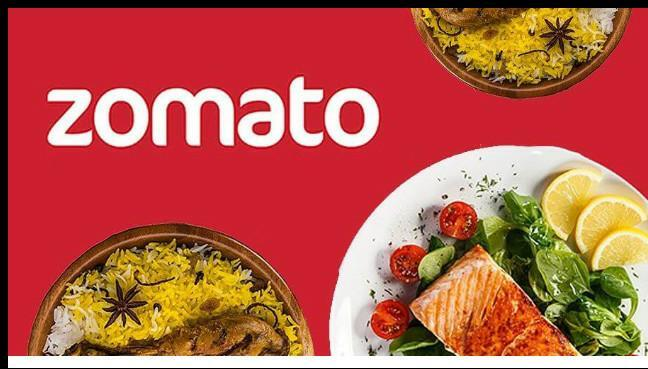

# **Project Summary -**

# **"Predicting the future is not MAGIC, it's ARTIFICIAL INTELLIGENCE."** - Dave Waters

The data science problem involves solving problem analytically and using critical thinking. One of the mostly used learning in ML is Unsupervised Learning. Unsupervised learning models are utilized for three main tasks—clustering, association, and dimensionality reduction. 

Here we have to perform clustering exercise and then do the sentimental analysis to exract reviews from customers.

This problem contain two dataframes -

* Zomato restaurant data which contains all information about the restaurants that are available on zomato,Cuisines they serve, per person cost of dining.
* User review collection df which contains the ratings,reviews given by users to different restaurants.

In today’s digital world, food apps like Zomato are widely used because it not only serves food to the door but also provides a platform for people to share their opinion about the restaurants and cafes they have visited. 

So first Define what actually the problem is?

Yeah ! the project focuses on analysing the Zomato restaurant data for each city in India and grouping them into clusters. Also analyze the reviews given for the particular restaurant by the reviewers to find out if they have positive sentiment or negative sentiment towards the dish/ restaurant.

THEN, it is very important for us to have basic understanding of the dataset we are working on. Hence I used some methods like .head(), .info(), etc to get familiar with my dataset.

After friendship with the dataset, it is a true friend's duty to correct or wrangle our friend. Hence Data Wrangling comes into picture. In this part some corrections are made to the dataset like converting cost to int values, replacing unusual value in rating with mean and etc.

So now we are atleast familiar with our data but it's not enough. We want to know deep insights from our dataset, hence comes the indespensable part of ML, i.e., EXPLORATORY DATA ANALYSIS. In EDA, I visualized some relationship in both the dataset and found some fruitful information.

There are some hypothesis regarding the dataset. Hence I performed Hypothesis testing and accept or reject it based on p-value and level of significance.

Okay, now me and data are best friends :).So I have to now prepare my friend for modelling, Hence I did some feature engineering. In feature engineering, I performed several tasks like handling null values, handling outliers, transformation, scaling, feature extraction, feature selection etc.

So, the time is here for modelling. First I performed the clustering on hotel dataset but before clustering I did dimensionality reduction using Principal Component Analysis and applied 3 algorithms. The models implemented are :

* KMeans clustering
* Agglomerative Hierarchical clustering
* DBSCAN

And found that data can be divided into 6 clusters. Using Sillhoutte score, checked the score of KMeans and Hierarchichal clustering.

Next is Sentiment Analysis for review dataset. For sentiment analysis, first I performed Textual data preprocessing. This involves steps like Punctuation Mark Removal, Stop Word Removal, Lemmatization, handling emojis, converting to lower case, tokenization. For tokenization, I used tf-idf vectorizer.
Models performed for sentiment analysis are

* Logistic Regression
* DecisionTree
* Random Forest
* XGBoost Classifier
* K Nearest Neighbour

And inferred that logistic regression is performing best among all other models considering AUC_ROC score. Also did hyperparameter tuning and concluded that Logistic regression can be deployed for final prediction of Sentiment Analysis.

# **Data Description**

##Zomato Restaurant names and Metadata

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost of dining

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines served by Restaurants

Timings : Restaurant Timings

##Zomato Restaurant reviews

Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review

# **Problem Statement**


**Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Loading Zomato Restaurant names and Metadata Dataset 
hotel=pd.read_csv('/content/drive/MyDrive/Capston Project/Unsupervised ML/Zomato Restaurant names and Metadata.csv')

#Loading Zomato Restaurant reviews Dataset
review=pd.read_csv('/content/drive/MyDrive/Capston Project/Unsupervised ML/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# hotel First Look
hotel.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [ ]:
# review First Look
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
hotel.shape

(105, 6)

In [ ]:
# Dataset Rows & Columns count
review.shape

(10000, 7)

Hotel contains 105 records and 6 features while review dataset contains 10000 records and 7 features.

### Dataset Information

In [ ]:
# metadata Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Cost must be int type but it contains comma(,) , hence its datatype is object here.
Also Timings represent the time from when the restaurant opens till end time when restaurants shut down, ut it is given in the form of text, hence object datatype.

In [ ]:
# review Dataset Info
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


Here all the columns in both the dataset is 'object' type except 'pictures' (Since it contains Number of pictures posted by customers).

#### Duplicate Values

In [ ]:
#hotel Dataset Duplicate Value Count
print(len(hotel[hotel.duplicated()]))

0


There are no duplicate values in metadata df.

In [ ]:
#review Dataset Duplicate Value Count
print(len(review[review.duplicated()]))

36


There are some duplicate values in review dataset. Let's find out more about this.

In [ ]:
#Check what are dplicated values present in the dataset
review[review.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    NaN      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    NaN      NaN  NaN         0

Since all the duplicated rows are null values. Hence we can drop them.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count in hotel
hotel.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

<Axes: >

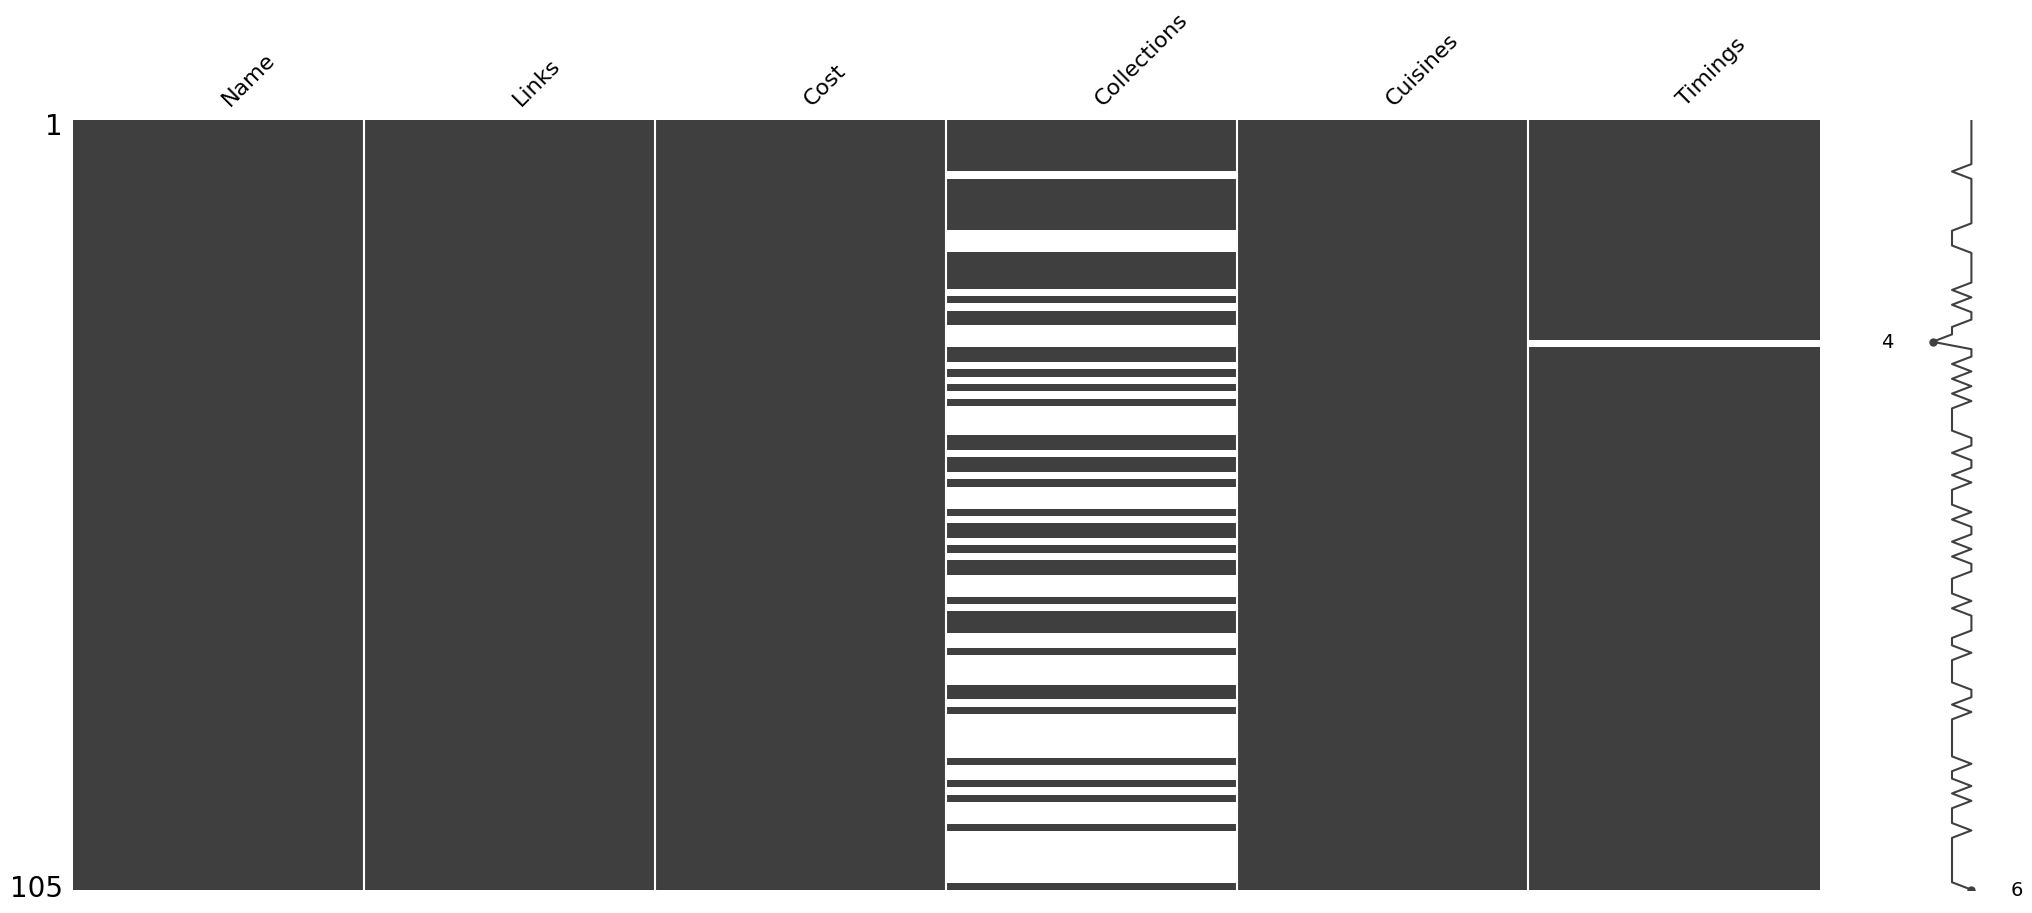

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(hotel)

In [ ]:
hotel[hotel['Timings'].isnull()]

Name                                              Links Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...  900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

There are some missing values in the column collections a, i.e., 54 and one in Timings column( this include one of the 54 records missing in collections).

In [ ]:
# Missing Values/Null Values Count in review
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

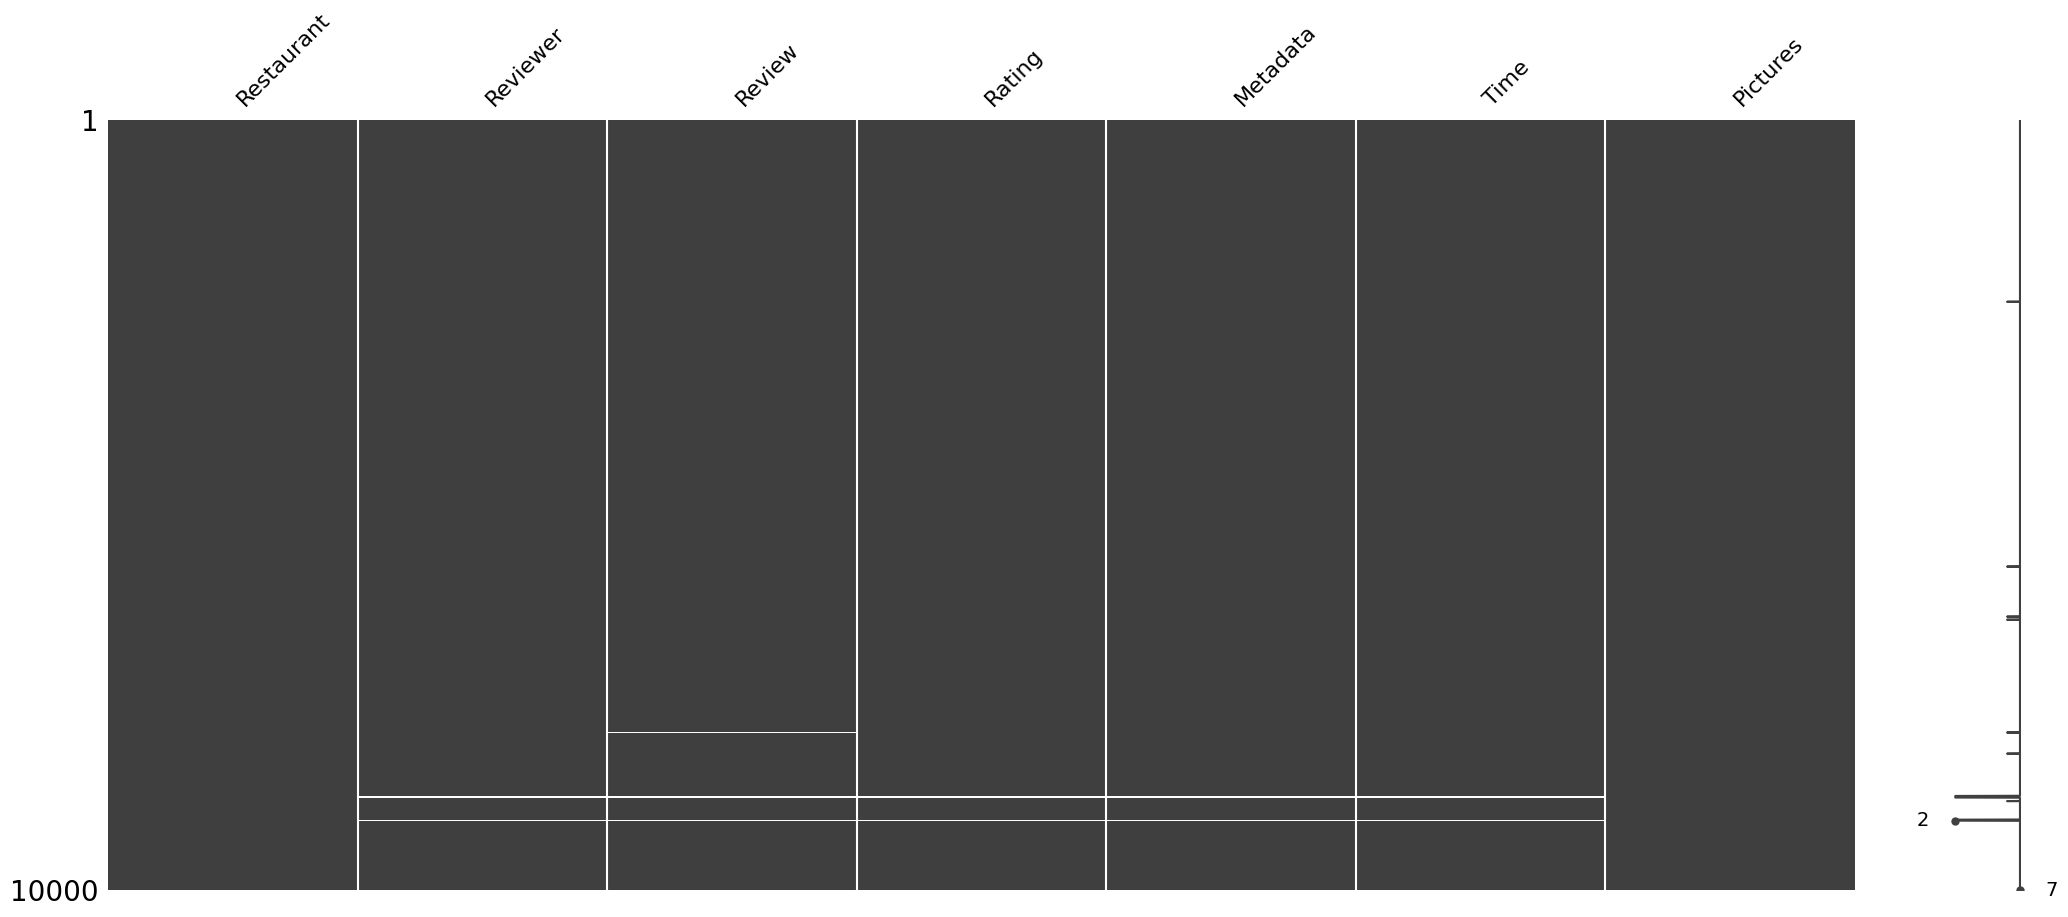

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(review)

In reviews dataset, most of the columns have missing values.

### What did you know about your dataset?

There are two datasets given:

1. Restaurant Names and metadata:
   * There are 105 records and 6 features in metadata.
   * There are missing or null values in Colllections and timings.
   * There are no duplicated values.
   * Cost must be int type but it contains comma(,) , hence its datatype is object here.
   * Timings represent the time from when the restaurant opens till end time when restaurants shut down, but it is given in the form of text, hence object datatype.

2. Reviews dataset:
   * There are 10000 records(or reviews) given with 7 features.
   * Except Name of Restaurants and Number of picture posted, There are null values.
   * There are some of the duplicated values for restaurnts which can be dropped(Since it contains null values for all the columns).
   * Rating must be integer but it contais value 'like', hence it is object datatype.


## ***2. Understanding Your Variables***

In [ ]:
# hotel dataset Columns
hotel.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# review Dataset Columns
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
hotel.describe(include='all').T

count unique                                                top  \
Name          105    105                                    Beyond Flavours   
Links         105    105  https://www.zomato.com/hyderabad/beyond-flavou...   
Cost          105     29                                                500   
Collections    51     42        Food Hygiene Rated Restaurants in Hyderabad   
Cuisines      105     92                              North Indian, Chinese   
Timings       104     77                                     11 AM to 11 PM   

            freq  
Name           1  
Links          1  
Cost          13  
Collections    4  
Cuisines       4  
Timings        6

Here none of the columns are seemed to be categorical.

In [ ]:
#describe review dataset
review.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

* From description of review dataset, we can infer that there are 100 Restaurants for which customers have given their review.
* Some of the customers have provided review to more than one restaurant.
* Rating can be considered as categorical variable.

### Variables Description 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable in hotel.
for col in hotel.columns:
  print("Column:",col,"\n",hotel[col].nunique())
  print('--'*70)

Column: Name 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Links 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cost 
 29
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Collections 
 42
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cuisines 
 92
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Timings 
 77
--------------------------------------------------------------------------------------------------------------------------------------------


There are total of 105 restaurant information available along with their websites.

In [ ]:
# Check Unique Values for each variable in review.
for col in review.columns:
  print("Column:",col,"\n",review[col].nunique())
  print('--'*70)

Column: Restaurant 
 100
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Reviewer 
 7446
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Review 
 9364
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Rating 
 10
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Metadata 
 2477
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Time 
 9782
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Pictures 
 

* There are total 100 restaurants whose reviews are given.
* Ttotal of 7446 reviewers have given their review on restaurants.
* Metadata contains number of followers and reviews on restaurants.
* Pictures posted by customers has 36 unique values.
* Rating may vary from 0 to 5. Let's check for it's unique values.

In [ ]:
# Check Unique Values for rating variable.

'''
We can check for unique value of Ratings given by customers
'''

print("Column:",'Rating',"\n",review['Rating'].unique())  

Column: Rating 
 ['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]


The ratings are given by customer as 1,1.5,2,2.5,...5  and 'like' while there are some missing values. 
* We can replace the missing value with median of that particular restaurant.
* Also We know that 'like' is not a rating and replacing it with rating 4 (Because rating 4 can be considered as people like the taste)

## 3. ***Data Wrangling***

### Data Wrangling Code

###1. Review dataset

In [ ]:
# Dropping the duplicate values in reviews df
review.drop_duplicates(keep=False,inplace=True)

In [ ]:
# Replace Rating 'Like' with rating 4
review['Rating']=review['Rating'].str.replace("Like",'4').astype('float')

Now there are null values just in 'Review' column.

---
We can drop records which have null values in Review column.



In [ ]:
#splitting the metadata into Reviews and Followers
review['No_of_reviews'],review['Followers'] = review['Metadata'].str.split(',').str
review['No_of_reviews'] = pd.to_numeric(review['No_of_reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])
review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  No_of_reviews  \
0           1 Review , 2 Followers  5/25/2019 15:54         0              1   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0              3   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0              2   
3            1 Review , 1 Follower  5/24/2019 22:11         0              1   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0              3   
...                            ...              ...       ...            ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0             53   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0              2   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3             65   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0             13   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6            472   

      Followers  
0           2.0  
1           2.0  
2           3.0  
3           1.0  
4           2.0  
...         ...  
9995       54.0  
9996       53.0  
9997      423.0  
9998      144.0  
9999     1302.0  

[9962 rows x 9 columns]

In [ ]:
# Filling the null values of Followes with 0
review['Followers'].fillna(0,inplace=True)

In [ ]:
# Converting Time to date time and extracting Hour and year 
review['Time']=pd.to_datetime(review['Time'])
review['Year']=pd.DatetimeIndex(review['Time']).year
review['Hour'] = pd.DatetimeIndex(review['Time']).hour  

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9962 non-null   object        
 1   Reviewer       9962 non-null   object        
 2   Review         9955 non-null   object        
 3   Rating         9962 non-null   float64       
 4   Metadata       9962 non-null   object        
 5   Time           9962 non-null   datetime64[ns]
 6   Pictures       9962 non-null   int64         
 7   No_of_reviews  9962 non-null   int64         
 8   Followers      9962 non-null   float64       
 9   Year           9962 non-null   int64         
 10  Hour           9962 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 933.9+ KB


###2. Hotel dataset

In [ ]:
# Renaming the hotel dataset column name
hotel.rename(columns={'Name':'Restaurant'},inplace=True)

In [ ]:
# checking values for cost
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# Removing ',' from Cost in hotel
hotel['Cost']=hotel['Cost'].str.replace(",","").astype("int64")

In [ ]:
# Get the function for number of cuisine in a hotel
def get_no_of_cuisine(cuisine):
  Cuisine_list=list(str(cuisine).split(','))
  return len(Cuisine_list)

# Create a new column with no of cuisine in hotel dataframe
hotel['No_of_cuisine']=hotel['Cuisines'].apply(get_no_of_cuisine)

In [ ]:
# Create a new column for average rating in hotel dataset
Average_rating = review.groupby(by='Restaurant',as_index='False')['Rating'].mean().reset_index()
Average_rating.rename(columns={'Rating':'Average_rating'},inplace = True)
Average_rating

Restaurant  Average_rating
0                       10 Downing Street            3.80
1                                13 Dhaba            3.48
2          3B's - Buddies, Bar & Barbecue            4.76
3               AB's - Absolute Barbecues            4.88
4                       Absolute Sizzlers            3.62
..                                    ...             ...
95             Urban Asia - Kitchen & Bar            3.65
96  Yum Yum Tree - The Arabian Food Court            3.56
97        Zega - Sheraton Hyderabad Hotel            4.45
98               Zing's Northeast Kitchen            3.65
99                                eat.fit            3.20

[100 rows x 2 columns]

In [ ]:
# Let's merge the average rating with hotel dataset
hotel = hotel.merge(Average_rating,on = 'Restaurant')

In [ ]:
# Let's merge the two dataset
df = hotel.merge(review, on = 'Restaurant')
df.shape

(9962, 18)

### What all manipulations have you done and insights you found?

For the Review dataset:
* Dropped the duplicate rows (since it contained null values)
* Changed the Rating - Like to numeric value and changed it datatype ( Since it represents the ordinal data)
* Extracted No_of_review and followers from Metadata column and filled the null values of followes with 0.
* Cahnged the time datatype to datetime and extracted Year and Hour from it.

For the Hotel dataset:
* Rename the Column 'Name' to 'Restaurant' for the sake of simplicity.
* Removed special character(,) from Cost and changed its datatype to integer.
* Get the number of cuisines.
* Merged the average rating in hotel dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: ylabel='Cost'>

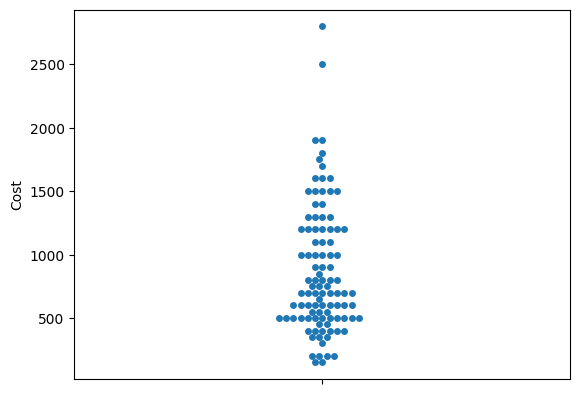

In [ ]:
# Let's now plot the swarmplot to see the variation in price 
sns.swarmplot(hotel['Cost'])

##### 1. Why did you pick the specific chart?

To find the cost of restaurants.

##### 2. What is/are the insight(s) found from the chart?

It is clearly visible that average cost per person in restaurants varies from below 500 to more than 2500. But there are too few restaurants whose price is more than 2000. Let's find out more about Restaurant prices.

#### Chart - 2

In [ ]:
#Find out the costliest restaurants
costly_res=hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=False).head(10).reset_index(drop=True)
costly_res

Restaurant    Cost
0               Collage - Hyatt Hyderabad Gachibowli  2800.0
1                   Feast - Sheraton Hyderabad Hotel  2500.0
2                                  10 Downing Street  1900.0
3  Jonathan's Kitchen - Holiday Inn Express & Suites  1900.0
4            Cascade - Radisson Hyderabad Hitec City  1800.0
5                    Zega - Sheraton Hyderabad Hotel  1750.0
6              Mazzo - Marriott Executive Apartments  1700.0
7                                             B-Dubs  1600.0
8                                       Arena Eleven  1600.0
9                                    Barbeque Nation  1600.0

In [ ]:
#Find out the cheapest restaurants
cheapest_res = hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=True).head(10).reset_index(drop=True)
cheapest_res

Restaurant   Cost
0                           Amul  150.0
1            Mohammedia Shawarma  150.0
2             Hunger Maggi Point  200.0
3                      KS Bakers  200.0
4                  Momos Delight  200.0
5                 Asian Meal Box  200.0
6       Shah Ghouse Spl Shawarma  300.0
7                    Cream Stone  350.0
8  The Old Madras Baking Company  350.0
9                       Tempteys  350.0

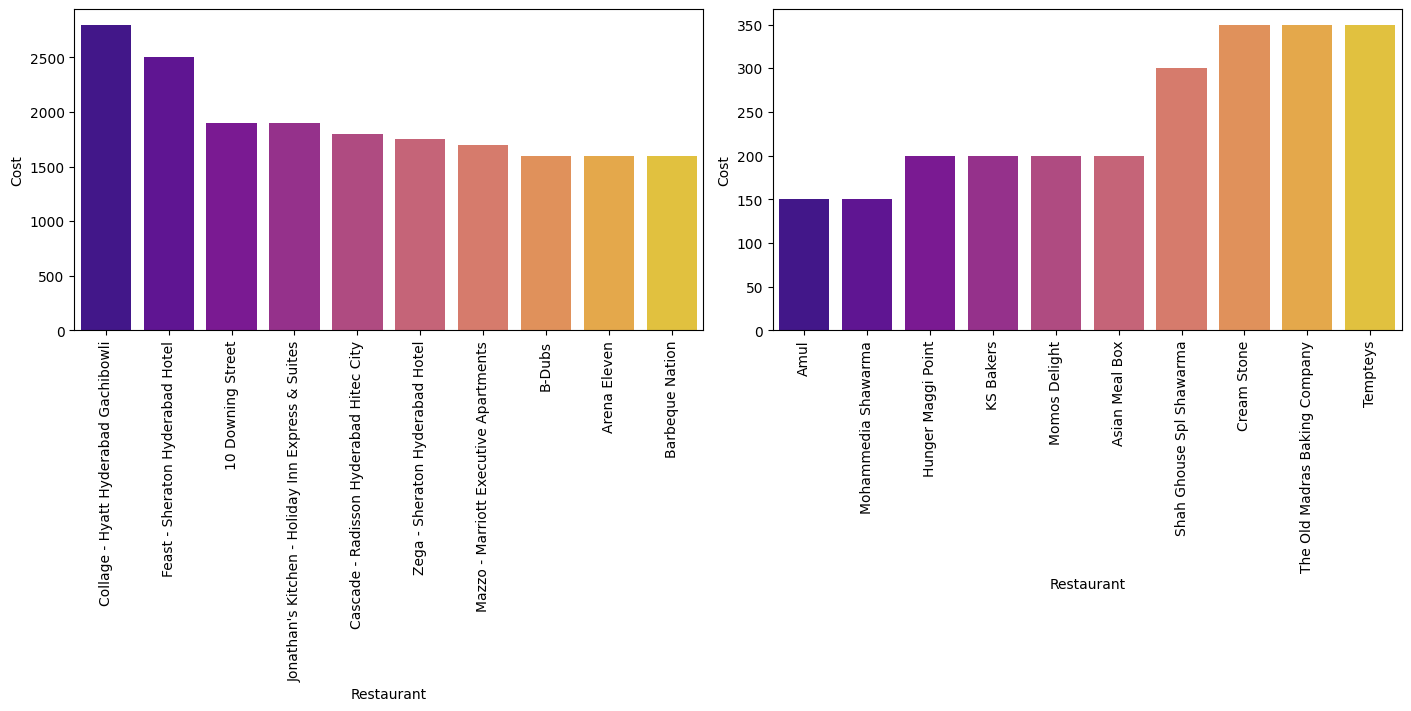

In [ ]:
#visualisation of most expensive and cheapest restaurant
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

#costliest restaurant
a=sns.barplot(x = 'Restaurant',y = 'Cost',data = costly_res,ax = axes[0],palette = 'plasma')
a.set_xticklabels(labels=costly_res['Restaurant'].to_list(),rotation=90)

#cheapest restaurant
b=sns.barplot(x = 'Restaurant',y = 'Cost',data = cheapest_res,ax = axes[1],palette = 'plasma')
b.set_xticklabels(labels=cheapest_res['Restaurant'].to_list(),rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To visualize which are the expensive restaurants and which are the cheap restaurants on Zomato.

##### 2. What is/are the insight(s) found from the chart?

Expensive Restaurants : Here "Collage - Hyatt Hyderabad Gachibowli" is the most expensive restaurant whose price is rupees 2800 which is followed by "Feast - Sheraton Hyderabad Hotel" whose price is rupees 2500. Other expensive restaurants can be seen from the graph and table.

Cheap Restaurants : Here "Mohammedia Shawarma" and "Amul" is the cheapest restaurant where we can get the dish with the minimum price of rupees 150 , which is followed by "Sweet Basket", "KS Bakers", "Momos Delight etc whose price is rupees 200 . 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this insight we get to know about the restaurants which has dishes containing lower prices. So a middle waged person can afford it easily. Hence this can be benefitial for that particular restaurant as well as Zomato as more people will order food from Zomato.

Also we get to know about the most expensive restaurant, which led to negative growth of that restaurants as fear of losing money if they do not get the taste they want by customers. 

#### Chart - 3

(-0.5, 1999.5, 1999.5, -0.5)

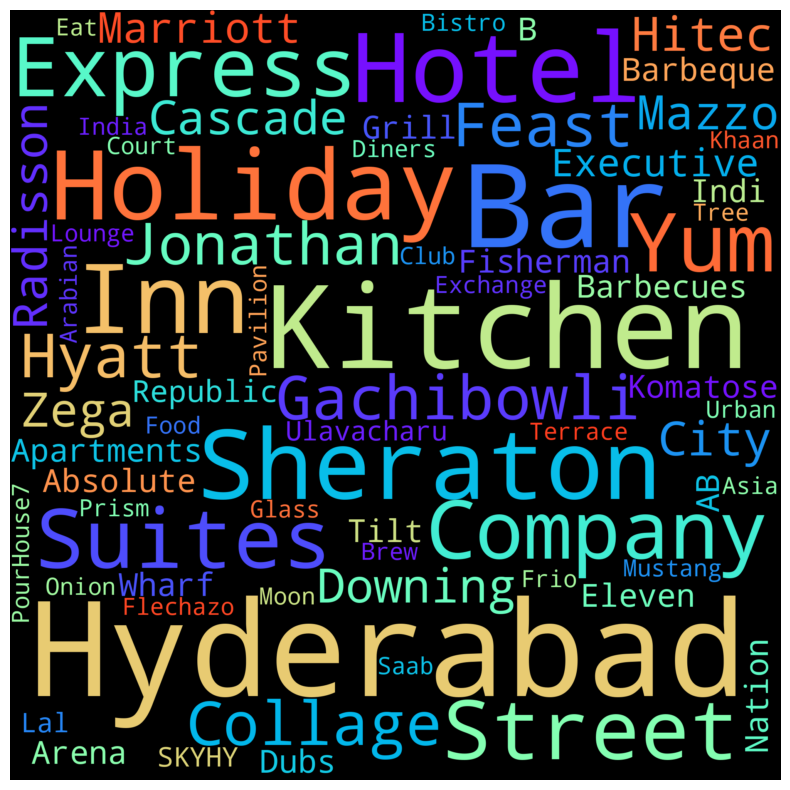

In [ ]:
#CREATING WORDCLOUD FOR EXPENSIVE RESTAURANT
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=False).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

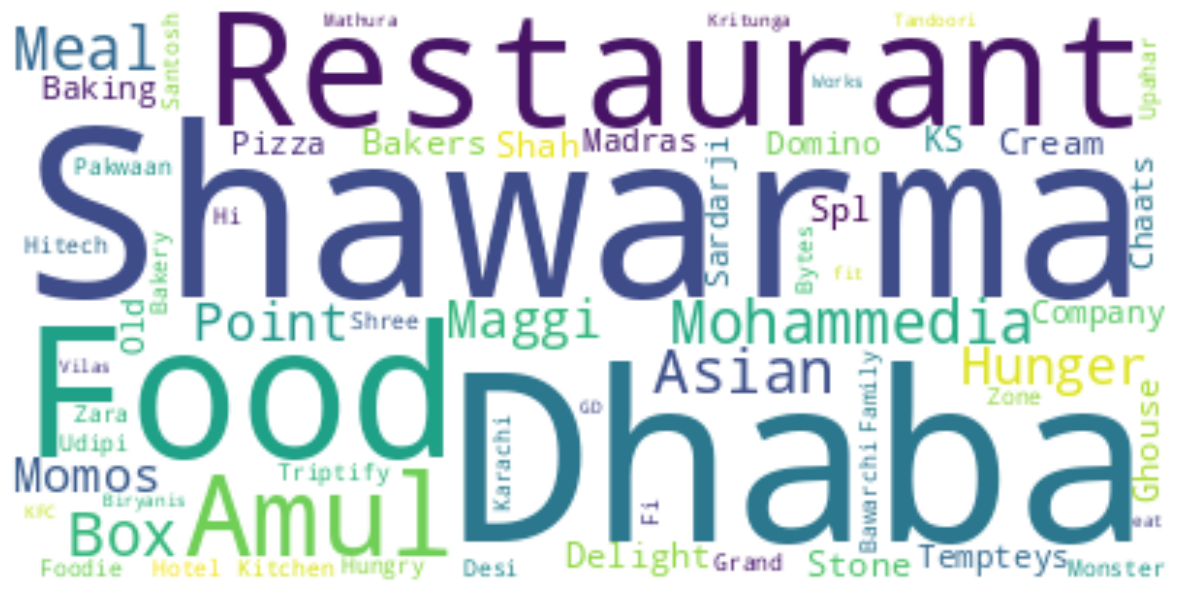

In [ ]:
#CREATING WORDCLOUD FOR CHEAPEST RESTAURANT
plt.figure(figsize=(15,8))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=True).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")

##### 1. Why did you pick the specific chart?

I used Wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, HYDERABAD, HOTEL, BAR etc seems frequently repeating for expensive restaurant, while for cheap restaurants SHAWARMA, DHABA, RESTAURANTS seems frequently repeating. So it can be infer that Hotel and Bars of Hyderabad are expensive while Dhabas and Restaurants are cheaper.

#### Chart - 4

In [ ]:
#See the average rating and total number of review given to the restaurants

avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

Restaurant  Rating  Total_Review
0                       10 Downing Street    3.80           100
1                                13 Dhaba    3.48           100
2          3B's - Buddies, Bar & Barbecue    4.76           100
3               AB's - Absolute Barbecues    4.88           100
4                       Absolute Sizzlers    3.62           100
..                                    ...     ...           ...
95             Urban Asia - Kitchen & Bar    3.65           100
96  Yum Yum Tree - The Arabian Food Court    3.56           100
97        Zega - Sheraton Hyderabad Hotel    4.45           100
98               Zing's Northeast Kitchen    3.65           100
99                                eat.fit    3.20           100

[100 rows x 3 columns]

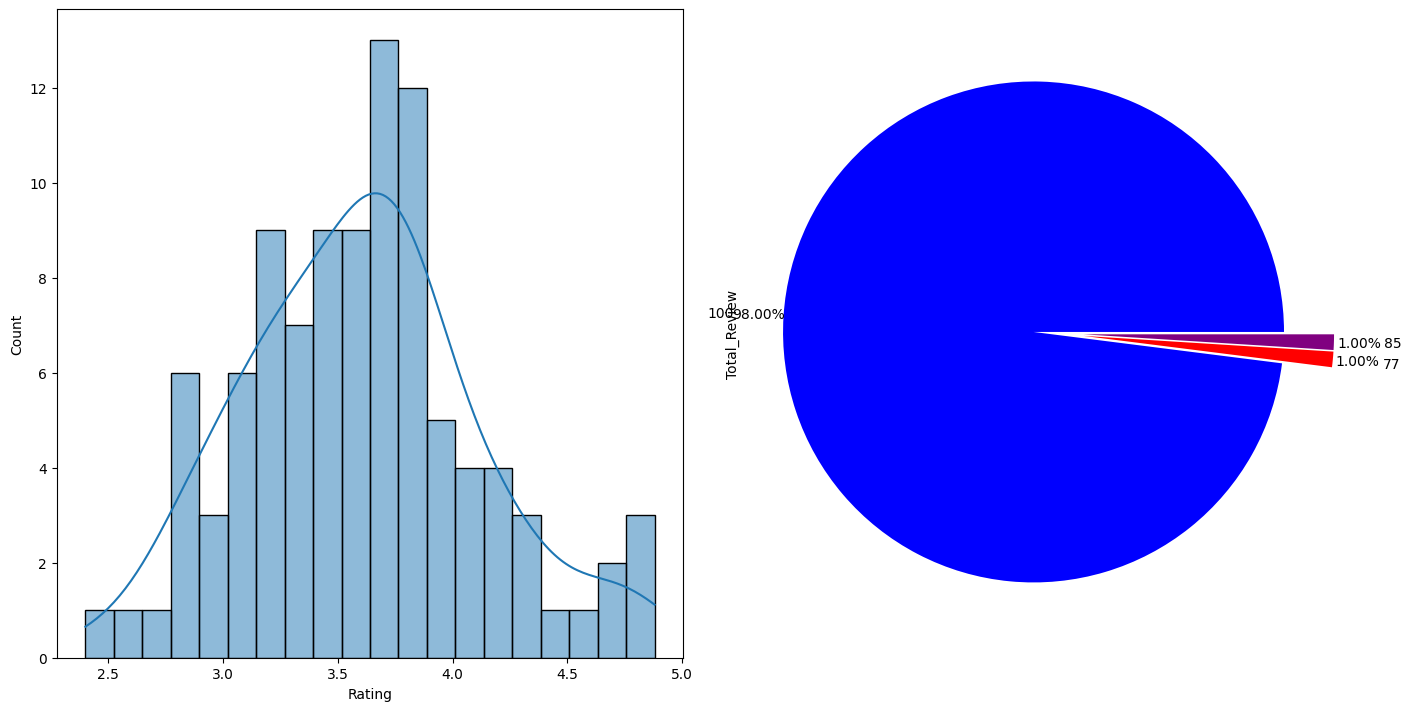

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Let's see te histogram of average rating
a=sns.histplot(data=avg_hotel_rating['Rating'],bins=20,kde=True,ax=axes[0])

# plot the pie chart of number of reveivers for restaurants
b=avg_hotel_rating['Total_Review'].value_counts().plot(kind='pie', shadow=False, autopct='%1.2f%%',
                                                       explode = (0.1, 0.1, 0.1),pctdistance=1.1,labeldistance=1.2,
                                                       colors=['Blue','red','purple'],ax=axes[1])
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of average rating , I used histplot and to see review distribution, I used pie chart.

##### 2. What is/are the insight(s) found from the chart?

average Ratings are are normally distributed for the restaurants.

100 reviews are given to all the restaurants except 2 restaurants whose reviews are 85 and 77 respectively.

#### Chart - 5

In [ ]:
#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [ ]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

Cuisines  count
0        American      2
1          Andhra      3
2         Arabian      1
3           Asian      9
4             BBQ      1
..            ...    ...
61  North Eastern      1
62   North Indian     60
63        Seafood      1
64   South Indian      2
65    Street Food      2

[66 rows x 2 columns]

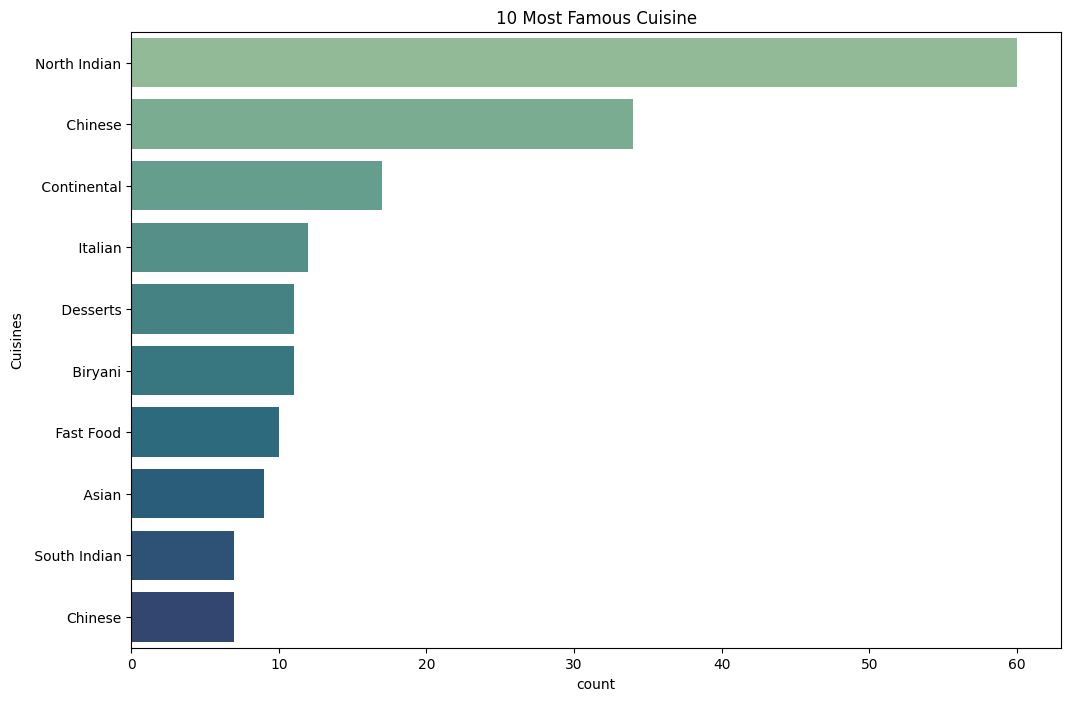

In [ ]:
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='count', y='Cuisines', data=cuisine_.sort_values(ascending=False, by='count')[:10],palette='crest')
plt.title('10 Most Famous Cuisine')
plt.show()

##### 1. Why did you pick the specific chart?

Since categorical features are best visualized through bar chart. Hence bar graph is used. 

##### 2. What is/are the insight(s) found from the chart?

It is clearly visible that North Indian is the most served cuisine in restaurants which is followed by Chinese and Continental.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It may be helpful for new enterpreneurs who wants to open new restaurants in their area so that they get know what people like mostly and keep that cuisine in their menu.

#### Chart - 6

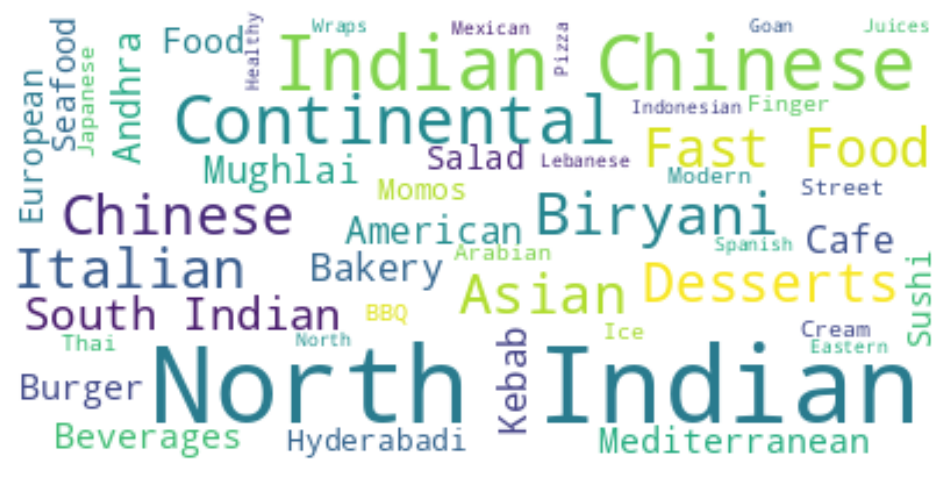

In [ ]:
#CREATING WORDCLOUD FOR CUISINES

plt.figure(figsize=(12,10))
df_word_cloud = cuisine_df['Cuisines']
text = " ".join(word for word in df_word_cloud)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

I used Wordcloud because it show all text and highlight the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, North Indian is the most frequently used which is followed by chinese and continental.

#### Chart - 7

(-0.5, 1399.5, 1399.5, -0.5)

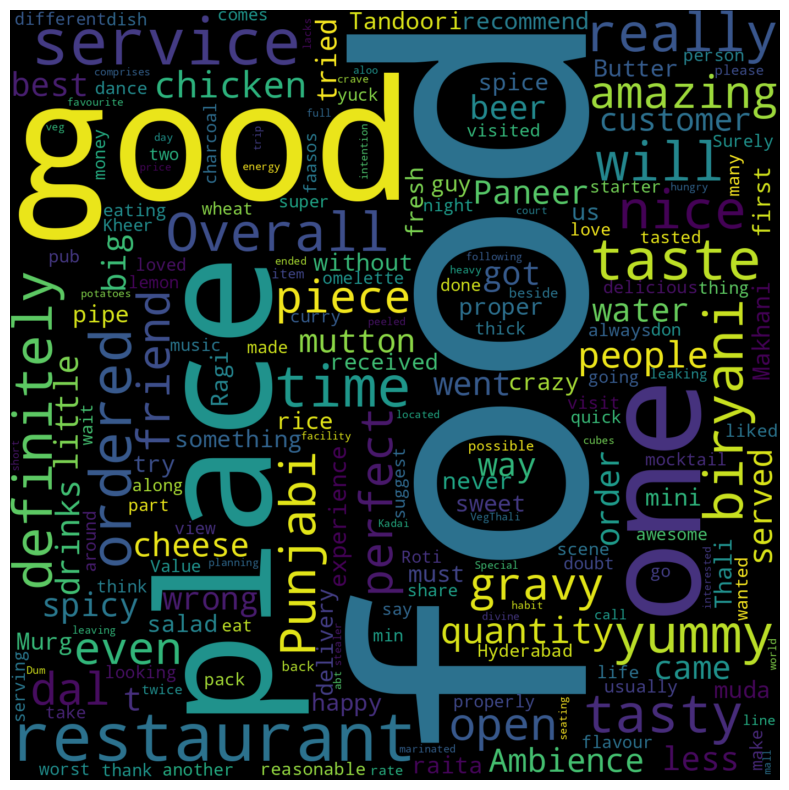

In [ ]:
# Creating word cloud for reviews
plt.figure(figsize=(15,10))
text = " ".join(name for name in review.sort_values('Review',ascending=False).Review[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

##### 1. Why did you pick the specific chart?

To see what word is frequently used by the reviewers.

##### 2. What is/are the insight(s) found from the chart?

Most of the time customers liked the food because good is repeating most in reviews. Also food is next most repeating word. 

#### Chart - 8

In [ ]:
# Check out for top collections
top_collections = hotel['Collections'].value_counts().reset_index()
top_collections.rename(columns={'index': 'Collection', 'Collections': 'Count'}, inplace=True)
top_collections

Collection  Count
0         Food Hygiene Rated Restaurants in Hyderabad      4
1                                       Great Buffets      2
2                                 Hyderabad's Hottest      2
3                                         New on Gold      2
4                                     Veggie Friendly      2
5                                  Trending This Week      2
6   Sunday Brunches, Great Breakfasts, Function Ve...      1
7                 Function Venues, Regional Favorites      1
8                                Pan-Asian Delicacies      1
9                    Veggie Friendly, Terrific Thalis      1
10              Great Buffets, Live Sports Screenings      1
11                               Sneak Peek Hyderabad      1
12  Food Hygiene Rated Restaurants in Hyderabad, C...      1
13                                    Best Milkshakes      1
14  Great Breakfasts, Late Night Restaurants, Best...      1
15  Happy Hours, Top Drinking Destinations, Corpor...      1
16  Sneak Peek Hyderabad, Best Bars & Pubs, Gigs a...      1
17               Happy Hours, Top-Rated, Gold Curated      1
18               Gigs and Events, Corporate Favorites      1
19  Food Hygiene Rated Restaurants in Hyderabad, G...      1
20                                      Best Bakeries      1
21                                 Brilliant Biryanis      1
22                  Great Buffets, Trending This Week      1
23    Mandi, Great Buffets, The ‘Must Visit’ Eateries      1
24                                      Fancy and Fun      1
25             Top-Rated, Gold Curated, Fancy and Fun      1
26                 Great Buffets, Hyderabad's Hottest      1
27                             Late Night Restaurants      1
28  Best Bars & Pubs, Food Hygiene Rated Restauran...      1
29  Sunday Brunches, Corporate Favorites, Great Bu...      1
30  Great Buffets, Live Sports Screenings, Best Ba...      1
31                                    Frozen Delights      1
32      Street Food, Veggie Friendly, Pocket Friendly      1
33                                   Barbecue & Grill      1
34  Corporate Favorites, Happy Hours, Live Sports ...      1
35  Barbecue & Grill, Great Buffets, Corporate Fav...      1
36                     Great Italian, Sunday Brunches      1
37            Live Sports Screenings, Gigs and Events      1
38  Rooftops, Live Sports Screenings, Best Bars & ...      1
39           Barbecue & Grill, Live Sports Screenings      1
40                                             Haleem      1
41                                    Sunday Brunches      1

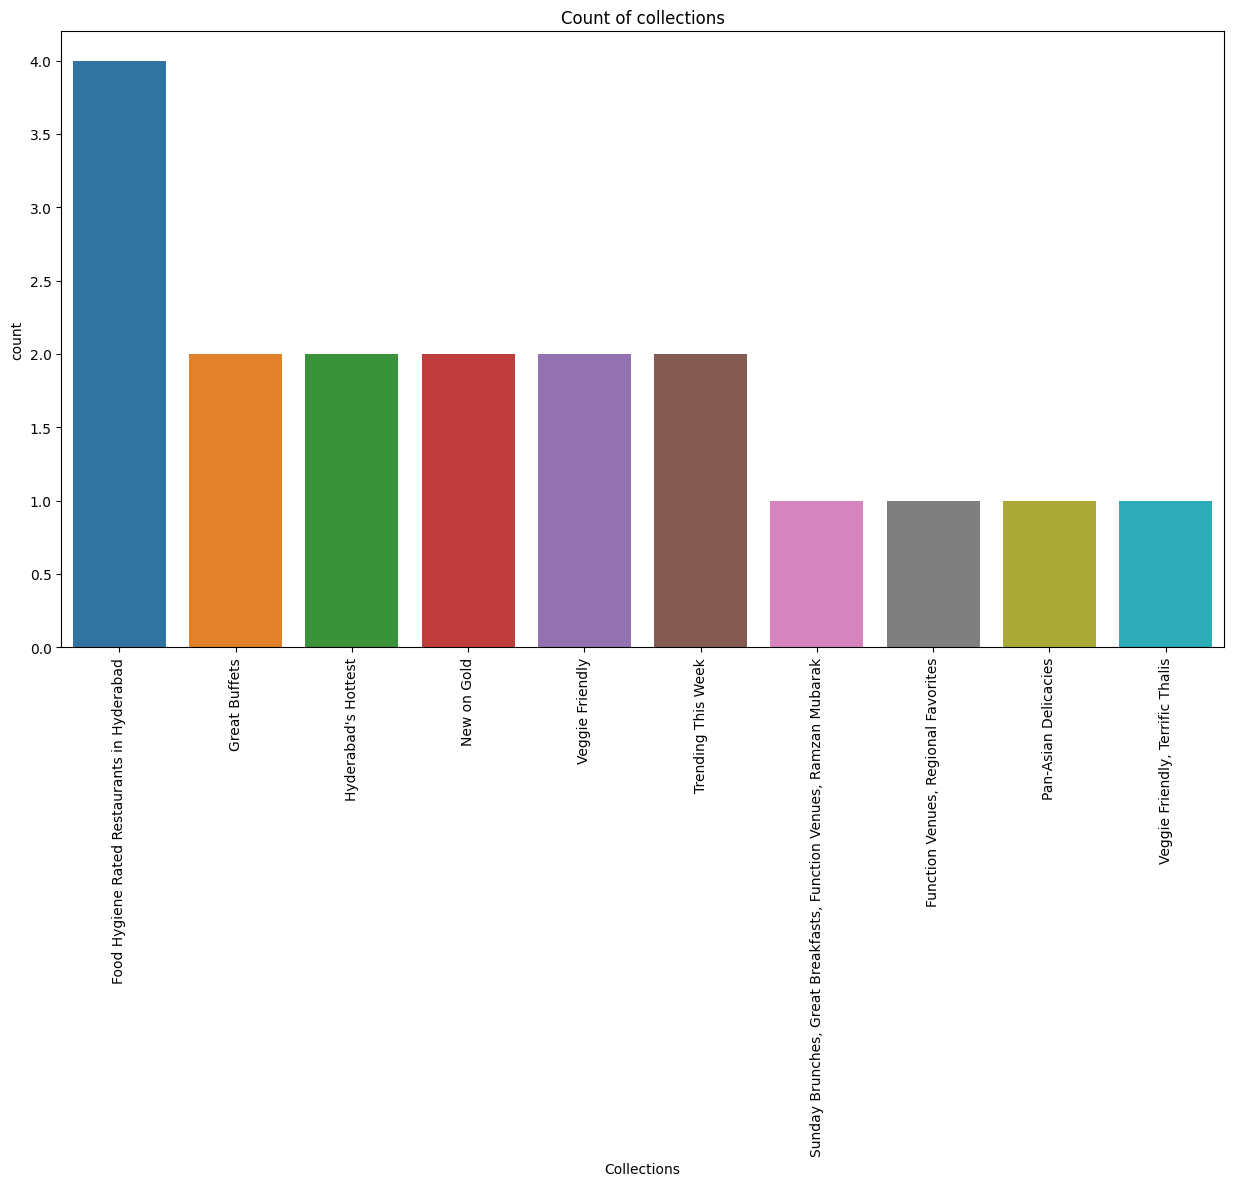

In [ ]:
#plot for collection count
plt.figure(figsize = (15,8))
sns.countplot(x='Collections',data=hotel,order=hotel.Collections.value_counts().head(10).index)
plt.title('Count of collections')
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

To see the count of each collections.

##### 2. What is/are the insight(s) found from the chart?

Here Food Hygiene Rated Restaurants in Hyderabad	has the maximum count of 4 which is followed by Great Buffets, Hyderabad Hottest etc.

#### Chart - 9

In [ ]:
#numerical columns for hotel dataset
num_cols_hotel = ['Cost', 'No_of_cuisine']

#numerical columns for review dataset
num_cols_review = ['Rating', 'Pictures', 'No_of_reviews', 'Followers']

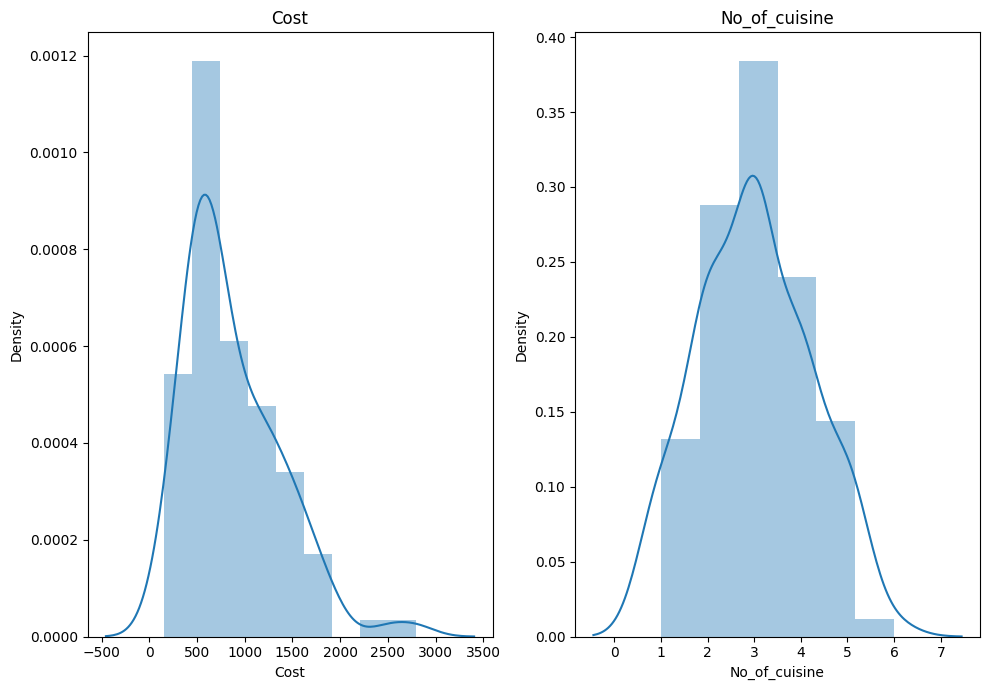

In [ ]:
# See the distribution of numerical features

#Distribution plot for hotel dataset
n=1
plt.figure(figsize=(10,7))
for col in num_cols_hotel:
   plt.subplot(1,2,n)
   n+=1
   sns.distplot(hotel[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

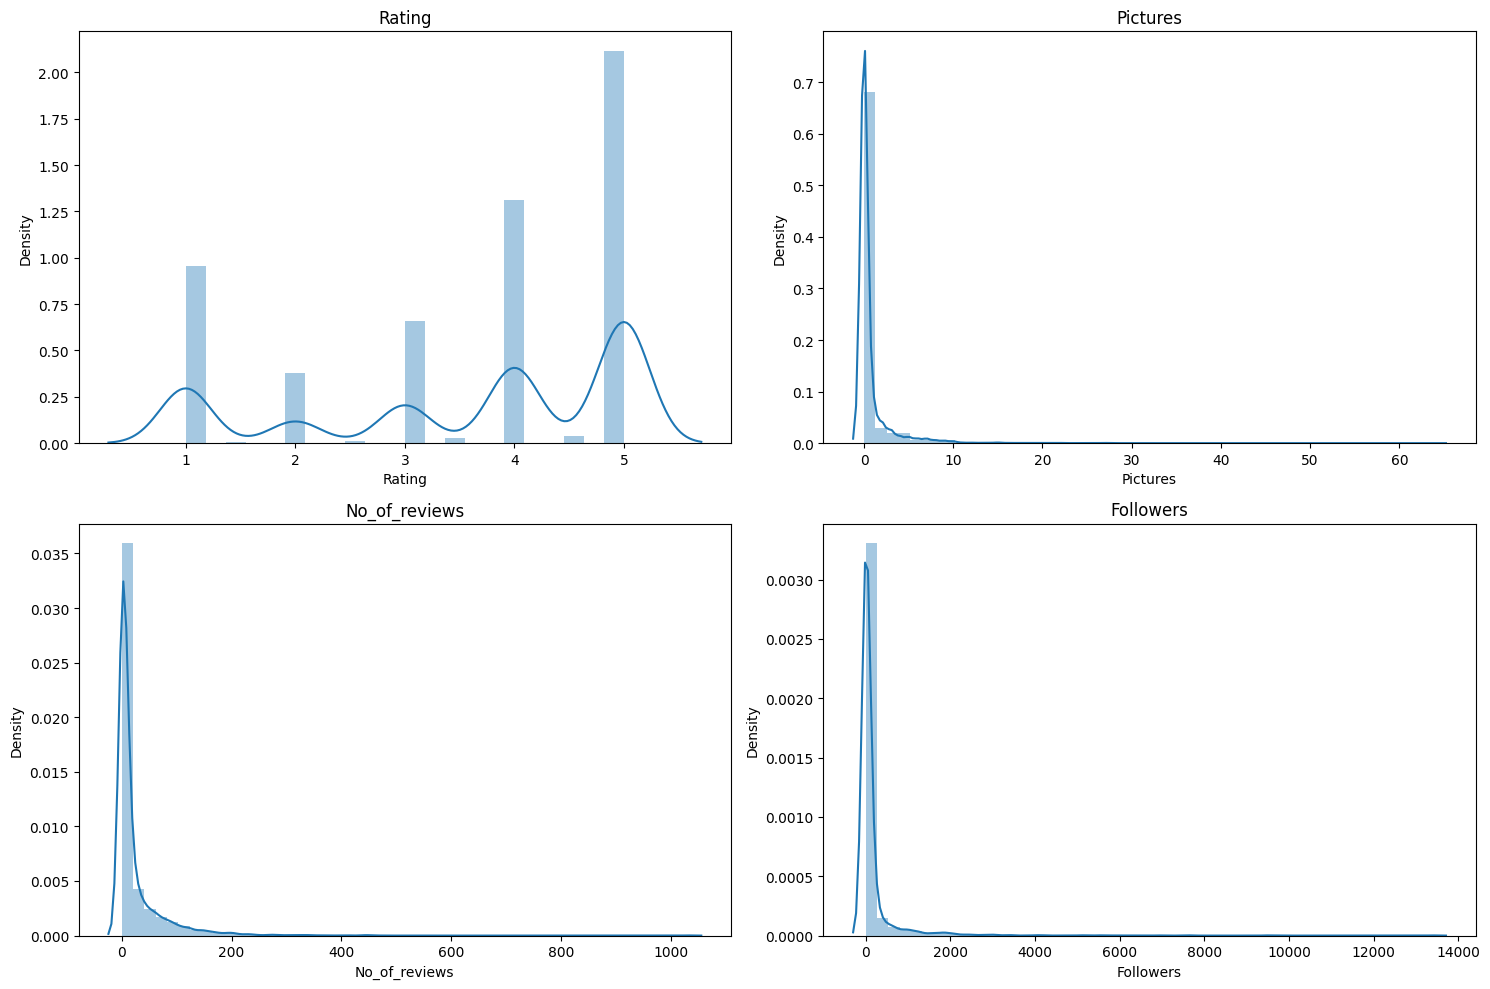

In [ ]:
  #Distribution plot
n=1
plt.figure(figsize=(15,10))
for col in num_cols_review:
   plt.subplot(2,2,n)
   n+=1
   sns.distplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of numerical columns.

##### 2. What is/are the insight(s) found from the chart?

Hotel Dataset: Cost is right skewed while Number of cuisine is normally distributed.

----
Review dataset : Pictures, No_of_reviews and followers are right skewed.


#### Chart - 10

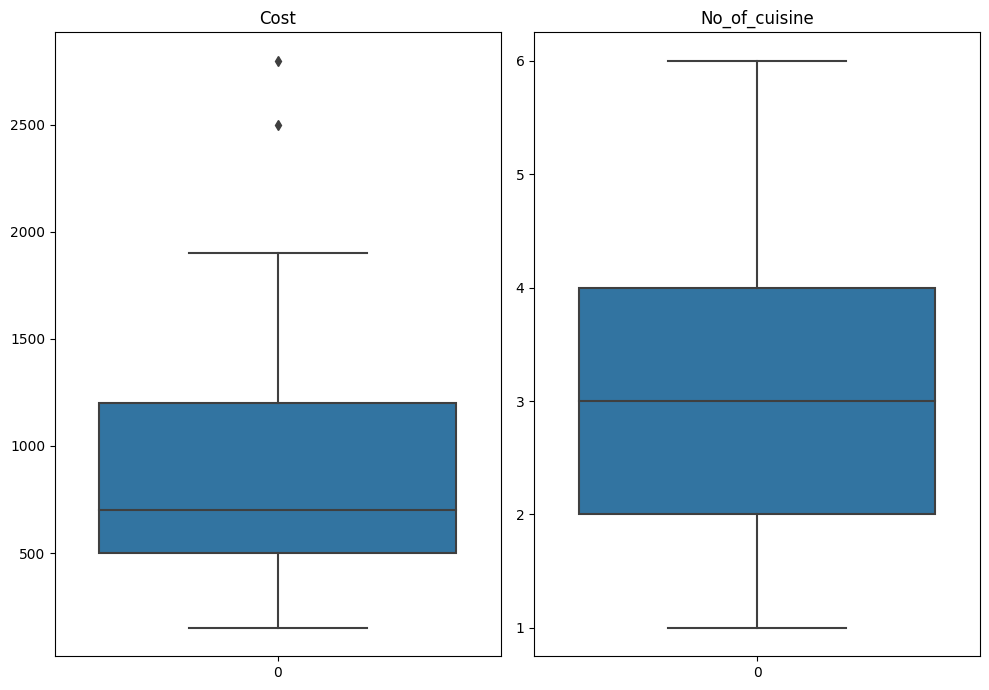

In [ ]:
# boxplot plot for hotel dataset
n=1
plt.figure(figsize = (10,7))
for col in num_cols_hotel:
   plt.subplot(1,2,n)
   n+=1
   sns.boxplot(hotel[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

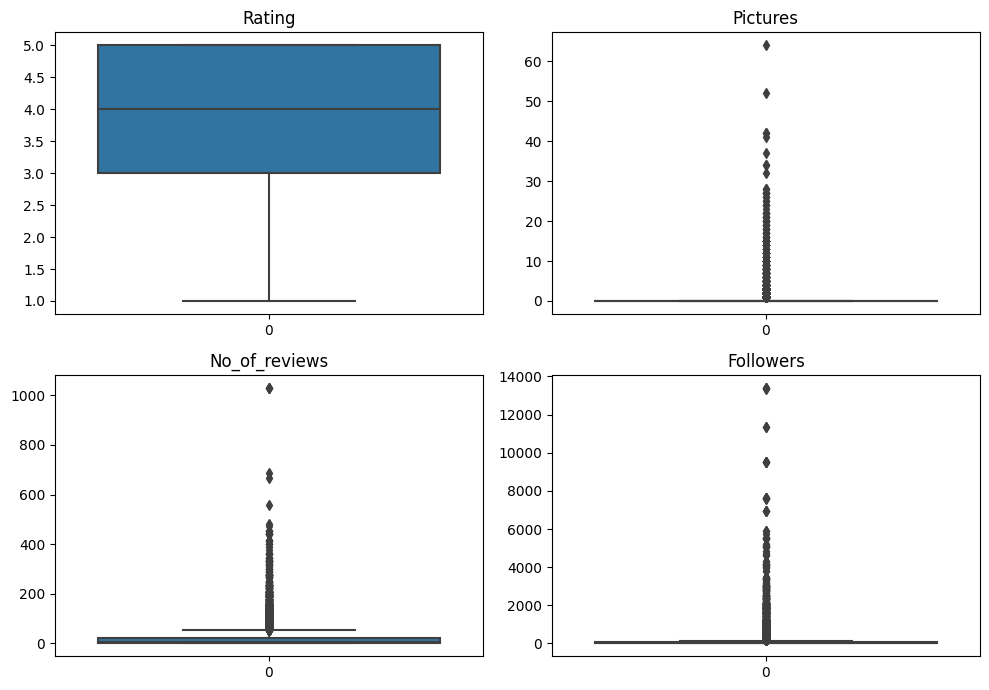

In [ ]:
#Box plot for review dataset
n=1
plt.figure(figsize = (10,7))
for col in num_cols_review:
   plt.subplot(2,2,n)
   n+=1
   sns.boxplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

##### 1. Why did you pick the specific chart?

To check for outliers, I have used Boxplot.

##### 2. What is/are the insight(s) found from the chart?

Hotel Dataset : Not much of the outliers is seen in Cost and Number of cuisines.

----
Review Dataset : Pictures, No_of_reviews and Followers seems to have outliers. 

#### Chart - 11

In [ ]:
#Get the count of hour in which customers have given review
hr_count=pd.DataFrame(review.groupby(by='Hour',as_index=False)['Hour'].count().reset_index(drop=False))
hr_count.rename(columns={'index':'Hour','Hour':'Count'},inplace=True)
hr_count

Hour  Count
0      0    509
1      1    313
2      2    167
3      3    102
4      4     55
5      5     39
6      6     44
7      7     78
8      8    134
9      9    171
10    10    229
11    11    308
12    12    460
13    13    580
14    14    776
15    15    645
16    16    549
17    17    480
18    18    438
19    19    522
20    20    714
21    21    877
22    22    968
23    23    804

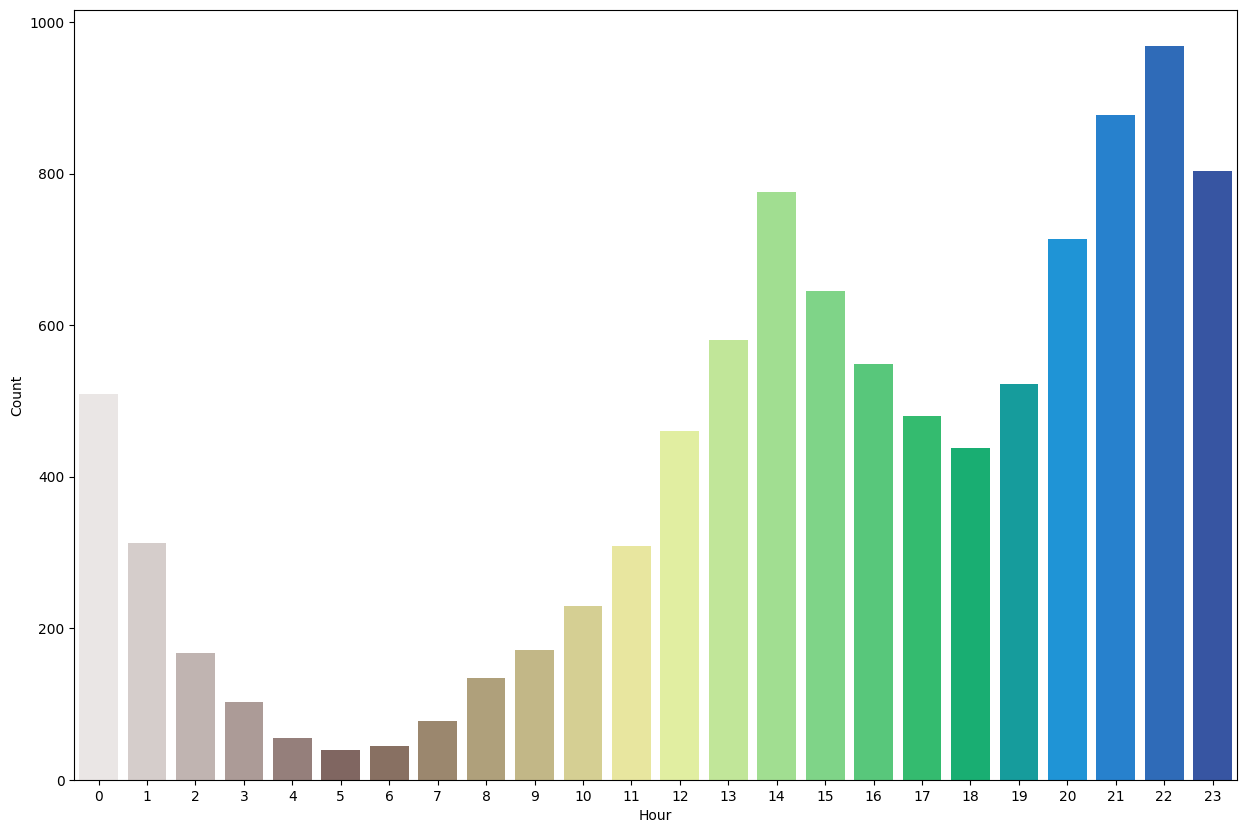

In [ ]:
#visualizing through bar plot
plt.figure(figsize=(15,10))
a=sns.barplot(x='Hour',y='Count',data=hr_count,palette='terrain_r')
a.set_xticks(range(len(hr_count)))

In [ ]:
# Get the count of years in Zomato data
year_count=pd.DataFrame(review['Year'].value_counts().sort_values(ascending=False).reset_index())
year_count.rename(columns={'index':'Year','Year':'Count'},inplace=True)
year_count

Year  Count
0  2018   4903
1  2019   4803
2  2017    213
3  2016     43

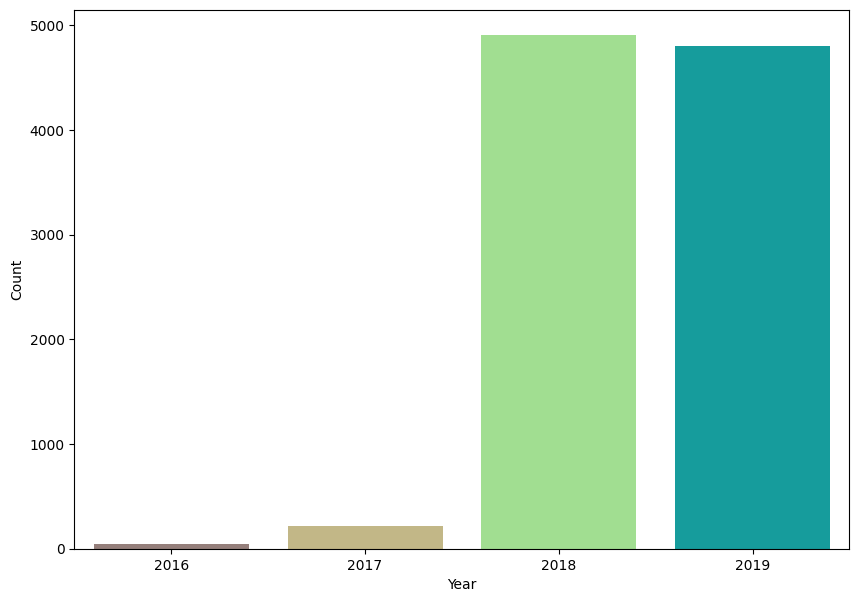

In [ ]:
#visualizing through line plot
plt.figure(figsize=(10,7))
a=sns.barplot(x='Year',y='Count',data=year_count,palette='terrain_r')
a.set_xticks(range(len(year_count)))

##### 1. Why did you pick the specific chart?

To see the count of review for restauants given in each year and each hour.

##### 2. What is/are the insight(s) found from the chart?

Hour : The frequency is higher during the night time from hour 19 to 22, i.e., from 7:00 pm to 11:00 pm. Possibly because people mostly  order food during these hours.

----
Year : The frequency is minimum in the year 2016 while its maximum in the year 2019. It is possible due to the fact that there is improvement in technology and people getting familiar with new applications and online system.

#### Chart - 12

In [ ]:
# No of reviews given to the restaurants
res_review=review[['Restaurant', 'No_of_reviews']].sort_values(by = 'No_of_reviews', ascending = False).head(20).reset_index(drop=True)
res_review

Restaurant  No_of_reviews
0                                   Labonel           1031
1      Collage - Hyatt Hyderabad Gachibowli           1031
2                               Pista House           1031
3                               Owm Nom Nom            685
4             The Old Madras Baking Company            665
5                              Aromas@11SIX            560
6                         Hyderabadi Daawat            482
7                          Chinese Pavilion            472
8   Cascade - Radisson Hyderabad Hitec City            452
9                                  Tempteys            452
10            The Old Madras Baking Company            452
11                 Shah Ghouse Spl Shawarma            443
12                                KS Bakers            443
13                              Pista House            443
14                          Diners Pavilion            443
15                                  T Grill            443
16                            Momos Delight            443
17  Cascade - Radisson Hyderabad Hitec City            417
18  Cascade - Radisson Hyderabad Hitec City            414
19                             Karachi Cafe            411

[Text(0, 0, '1031'),
 Text(0, 0, '1031'),
 Text(0, 0, '737'),
 Text(0, 0, '685'),
 Text(0, 0, '558.5'),
 Text(0, 0, '560'),
 Text(0, 0, '482'),
 Text(0, 0, '472'),
 Text(0, 0, '427.667'),
 Text(0, 0, '452'),
 Text(0, 0, '443'),
 Text(0, 0, '443'),
 Text(0, 0, '443'),
 Text(0, 0, '443'),
 Text(0, 0, '443'),
 Text(0, 0, '411')]

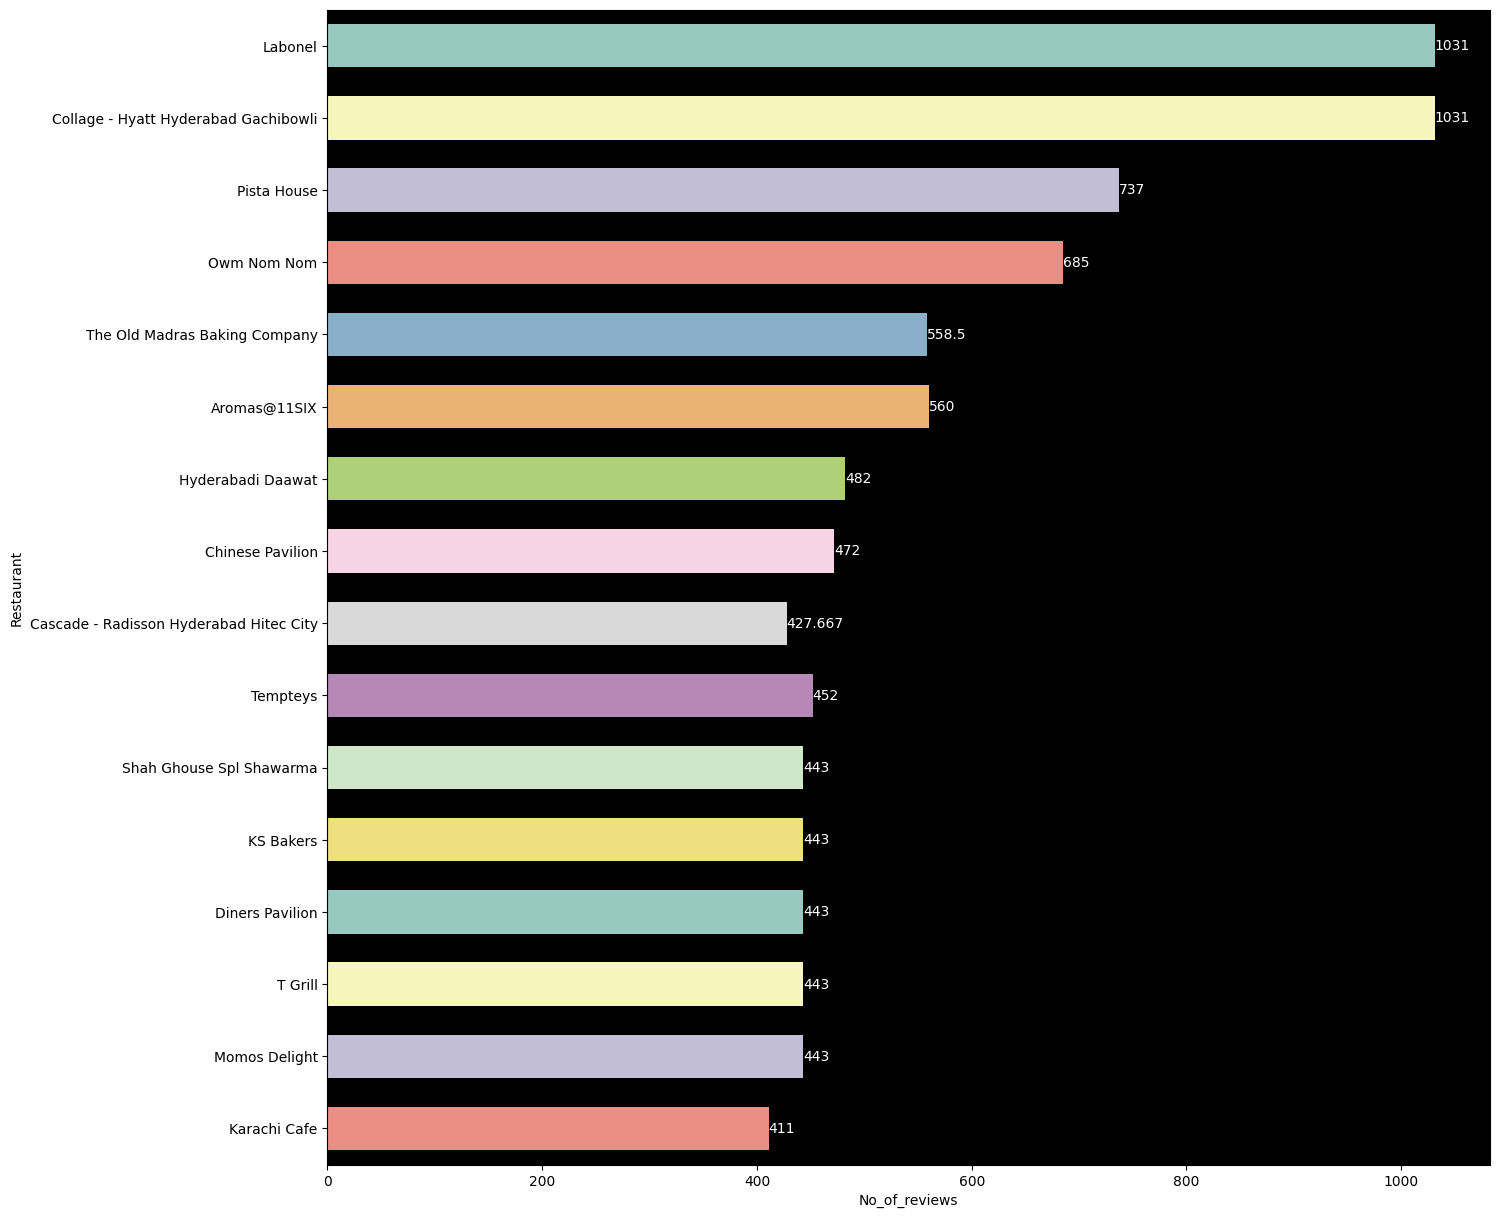

In [ ]:
# Chart - 11 visualization code
# No of reviews for each restaurant
plt.figure(figsize = (15,15))
ax = sns.barplot(x = 'No_of_reviews',y = 'Restaurant',data = res_review ,palette = 'Set3',errwidth = 0, width = 0.6)
ax.set_facecolor("black")
ax.bar_label(ax.containers[0], color = 'White')

##### 1. Why did you pick the specific chart?

To check which restaurants are given most number of reviews.

##### 2. What is/are the insight(s) found from the chart?

Here Labonel and Collage - Hyatt Hyderabad Gachibowli (which is also the most expensive) are given he maximun number of reviews with the count of 1031 (which is really a good figure).	

#### Chart - 13

In [ ]:
# TOTAL PICTURES POSTED FOR THE PARTICULAR RESTAURANT
pic_count=pd.DataFrame(review[['Restaurant', 'Pictures']]
                       .groupby(by='Restaurant',as_index=False)['Pictures'].sum()
                       .sort_values(by='Pictures',ascending=False).reset_index(drop=True))

# Top 10 restaurants with highest number of pictures posted
pic_count_top10=pic_count.head(10)
pic_count_top10

Restaurant  Pictures
0                                         PourHouse7       356
1                                       Arena Eleven       280
2                               Marsala Food Company       276
3                                  Hyderabadi Daawat       234
4                                American Wild Wings       218
5                                        Driven Cafe       212
6                                   Chinese Pavilion       201
7                         Urban Asia - Kitchen & Bar       178
8               Collage - Hyatt Hyderabad Gachibowli       173
9  Jonathan's Kitchen - Holiday Inn Express & Suites       163

In [ ]:
# Last five restaurants with lowest number of pictures posted
pic_count_bottom10=pic_count.tail(10)
pic_count_bottom10

Restaurant  Pictures
90                           Aromas@11SIX         5
91                       Hotel Zara Hi-Fi         5
92                               Delhi-39         4
93                    Mohammedia Shawarma         4
94                         Domino's Pizza         4
95                           Being Hungry         3
96                        Hyderabad Chefs         2
97                               Paradise         2
98  Shree Santosh Dhaba Family Restaurant         2
99              Hitech Bawarchi Food Zone         1

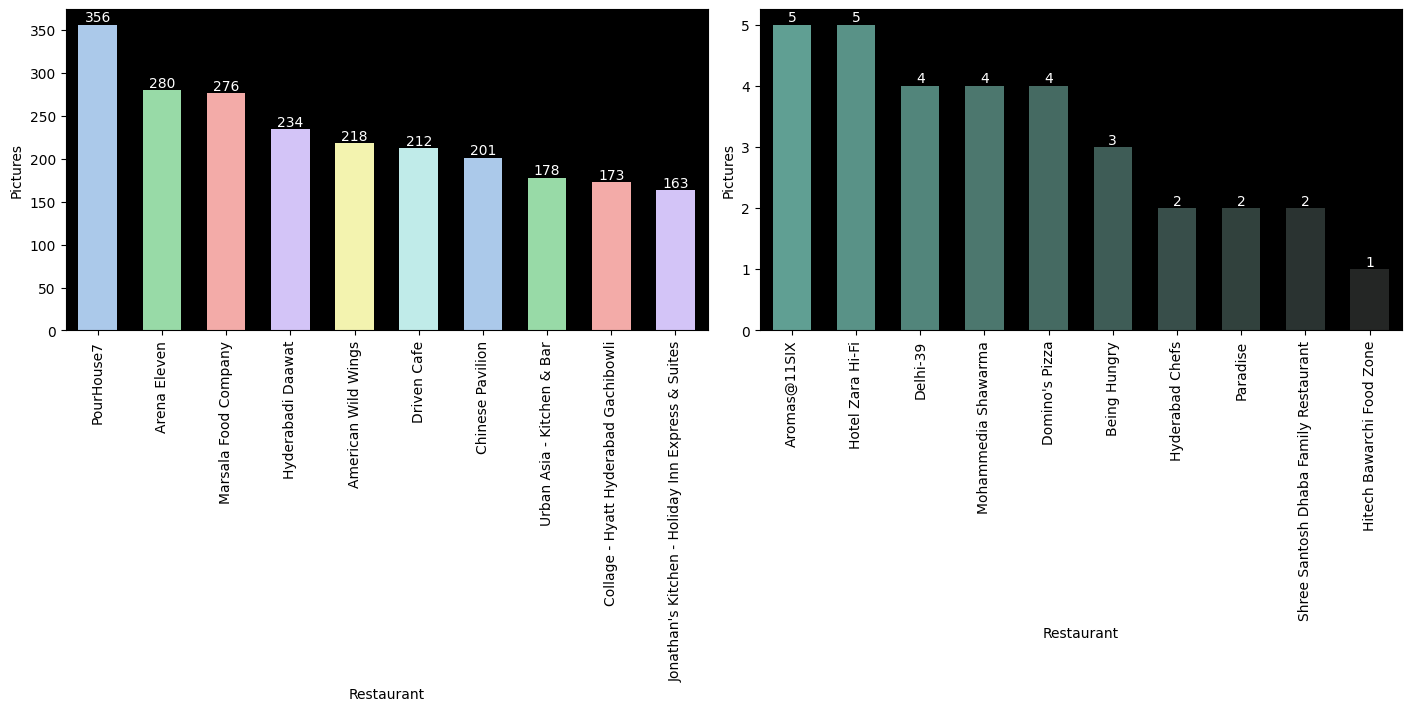

In [ ]:
# Visualizing it through bar graph
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of pictures posted
a = sns.barplot(x = 'Restaurant',y = 'Pictures',data = pic_count_top10 ,palette = "pastel6",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("black")
a.bar_label(a.containers[0], color= 'White')
a.set_xticklabels(labels=pic_count_top10['Restaurant'].to_list(),rotation=90)
a.set_facecolor("black")

# Visualization of bottom 10 restaurants with lowest number of pictures posted
b = sns.barplot(x = 'Restaurant',y = 'Pictures',data = pic_count_bottom10 ,palette = 'dark:#5A9_r',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("black")
b.bar_label(b.containers[0], color= 'White')
b.set_xticklabels(labels=pic_count_bottom10['Restaurant'].to_list(),rotation=90)
b.set_facecolor("black")

##### 1. Why did you pick the specific chart?

To see most and least number of picture posted for the restaurant.

##### 2. What is/are the insight(s) found from the chart?

Here PourHouse7	has the maximum number of picture posted by the reviewers which is 356 followed by Arena Eleven.

#### Chart - 14

In [ ]:
# TOTAL Followers of reviewers FOR THE PARTICULAR RESTAURANT
follower_count=pd.DataFrame(review[['Restaurant', 'Followers']]
                       .groupby(by='Restaurant',as_index=False)['Followers'].sum()
                       .sort_values(by='Followers',ascending=False).reset_index(drop=True))

# Restaurants with highest number of reviewer followers
follower_count_top10=follower_count.head(10)
follower_count_top10

Restaurant  Followers
0                              Pista House    51068.0
1  Komatose - Holiday Inn Express & Suites    46229.0
2                        Hyderabadi Daawat    45375.0
3                    The Tilt Bar Republic    42126.0
4                           Dunkin' Donuts    37667.0
5                         Chinese Pavilion    35426.0
6                                   Faasos    34640.0
7                                  T Grill    32222.0
8  Cascade - Radisson Hyderabad Hitec City    31644.0
9                          Barbeque Nation    30866.0

In [ ]:
# Restaurants with lowest number of reviewer followers
follower_count_bottom10=follower_count.tail(10)
follower_count_bottom10

Restaurant  Followers
90                               Flechazo     2748.0
91                    Kritunga Restaurant     2223.0
92                       Hotel Zara Hi-Fi     1818.0
93         3B's - Buddies, Bar & Barbecue     1676.0
94                 Royal Spicy Restaurant     1497.0
95                               Delhi-39     1222.0
96              AB's - Absolute Barbecues     1060.0
97                               Paradise      798.0
98                    Mohammedia Shawarma      791.0
99  Shree Santosh Dhaba Family Restaurant      562.0

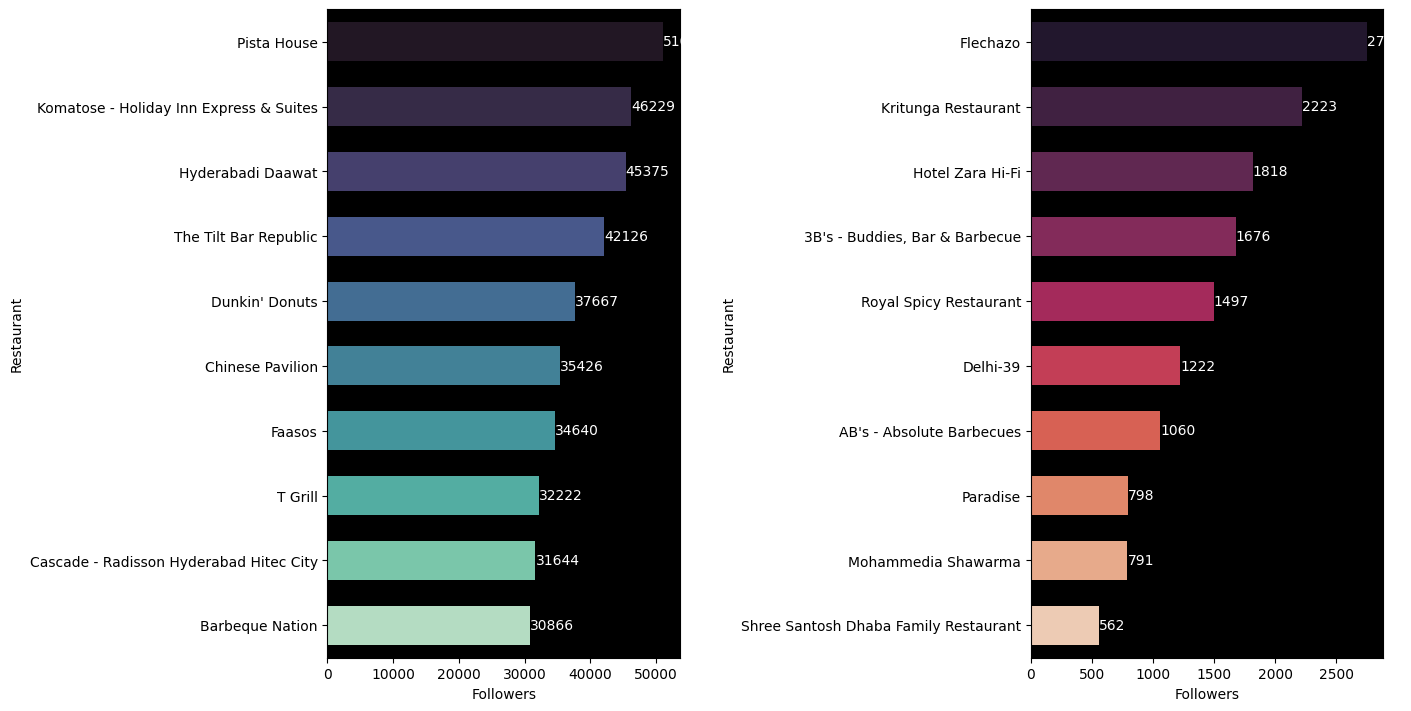

In [ ]:
# Visualizing it through bar graph
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Visualization of top 10 restaurants with highest number of followers
a = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_count_top10 ,palette = "mako",errwidth=0, width=0.6,ax=axes[0])
a.set_facecolor("black")
a.bar_label(a.containers[0], color= 'White')
a.set_yticklabels(labels=follower_count_top10['Restaurant'].to_list())
a.set_facecolor("black")

# Visualization of bottom 10 restaurants with lowest number of followers
b = sns.barplot(x = 'Followers',y = 'Restaurant',data = follower_count_bottom10 ,palette = 'rocket',errwidth=0, width=0.6,ax=axes[1])
b.set_facecolor("black")
b.bar_label(b.containers[0], color= 'White')
b.set_yticklabels(labels=follower_count_bottom10['Restaurant'].to_list())
b.set_facecolor("black")

##### 1. Why did you pick the specific chart?

To see the least and most follower of reviewer of the restaurants.

##### 2. What is/are the insight(s) found from the chart?

Here  Reviewer of restaurant "Pista House" has the most number of followers, while Reviewers of restaurant "Shree Santosh Dhaba Family Restaurant" has the least number of followers .

#### Chart - 15

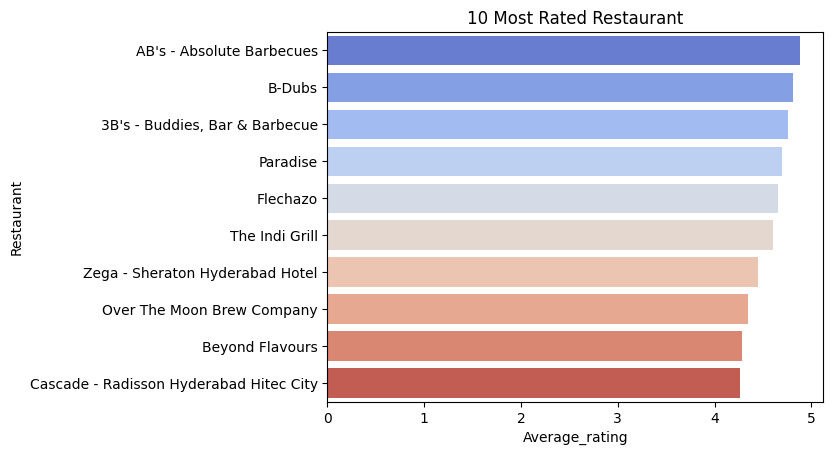

In [ ]:
# Top 10 average rating restaurants
sns.barplot(x='Average_rating', y='Restaurant', data=hotel.sort_values(ascending=False, by='Average_rating')[:10],palette ='coolwarm' )
plt.title('10 Most Rated Restaurant')

plt.show()

##### 1. Why did you pick the specific chart?

To see the top 10 restaurants having highest average rating.

##### 2. What is/are the insight(s) found from the chart?

Here AB's - Absolute Barbecues is the top average rated restaurant followed by  B-Dubs and 3B's - Buddies, Bar and Barbeque.

#### Chart - 16 - Correlation Heatmap

<Axes: >

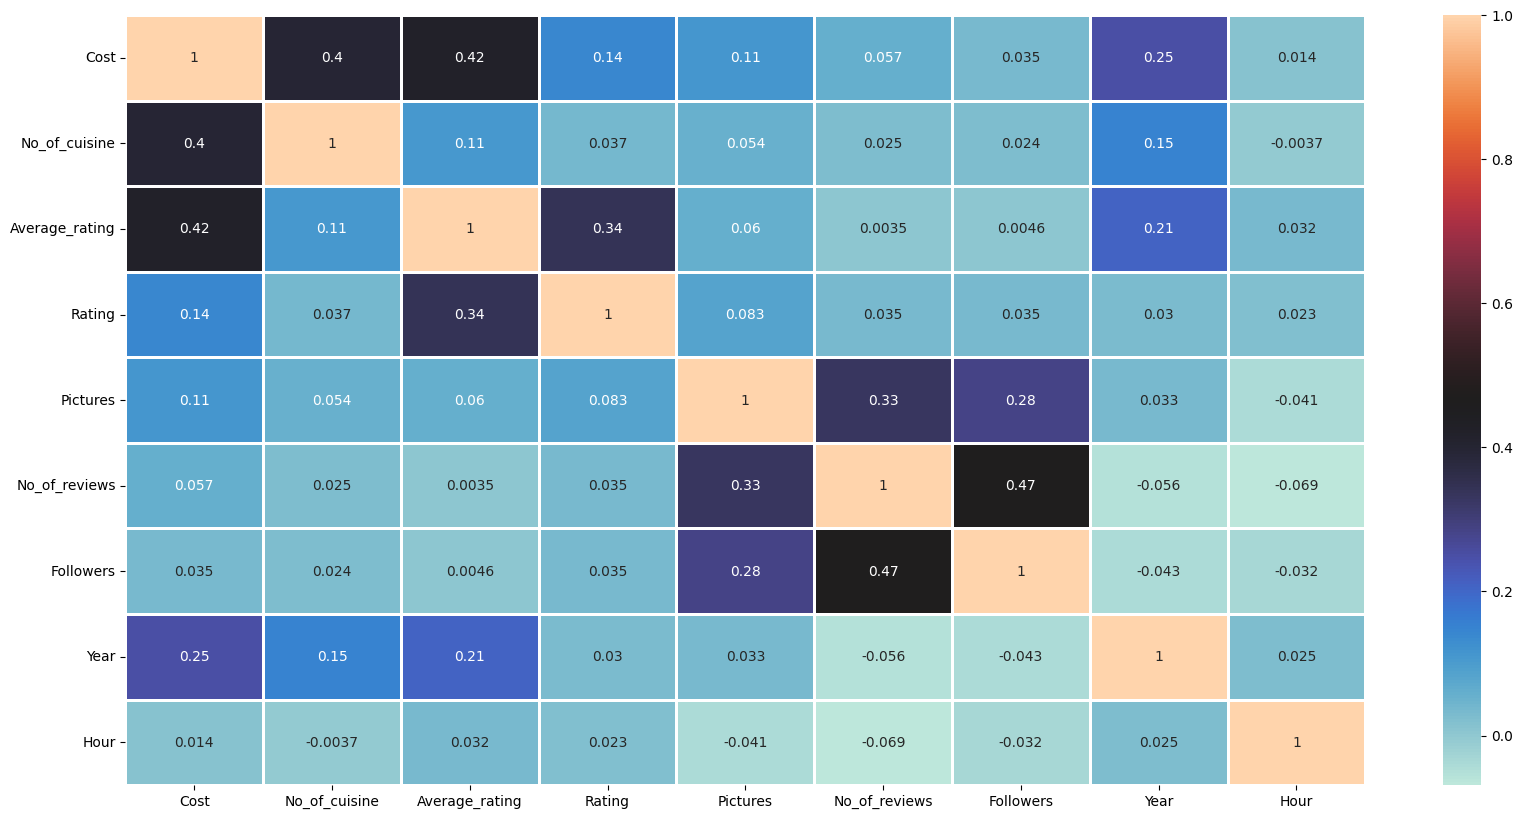

In [ ]:
# Correlation Heatmap visualization code

# checking heatmap/correlation matrix to see the how the colums are correlated with each other
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap = 'icefire', linewidths = 1)

##### 1. Why did you pick the specific chart?

To see the correlation among numerical features.

##### 2. What is/are the insight(s) found from the chart?

Inference:

* Number of reviews and followes has correlation of 0.47 which can be considered as moderate.
* Similarly cost and number f cuisines has moderate correlation of 0.4
* There is low correlation between:
  * Pictures and Followers
  * Pictures and No of reviews
  * Cost and year

   Since these correlations are low, No case of multicollinearity arises.
* Other features have very low correlation.


#### Chart - 17 - Pair Plot 

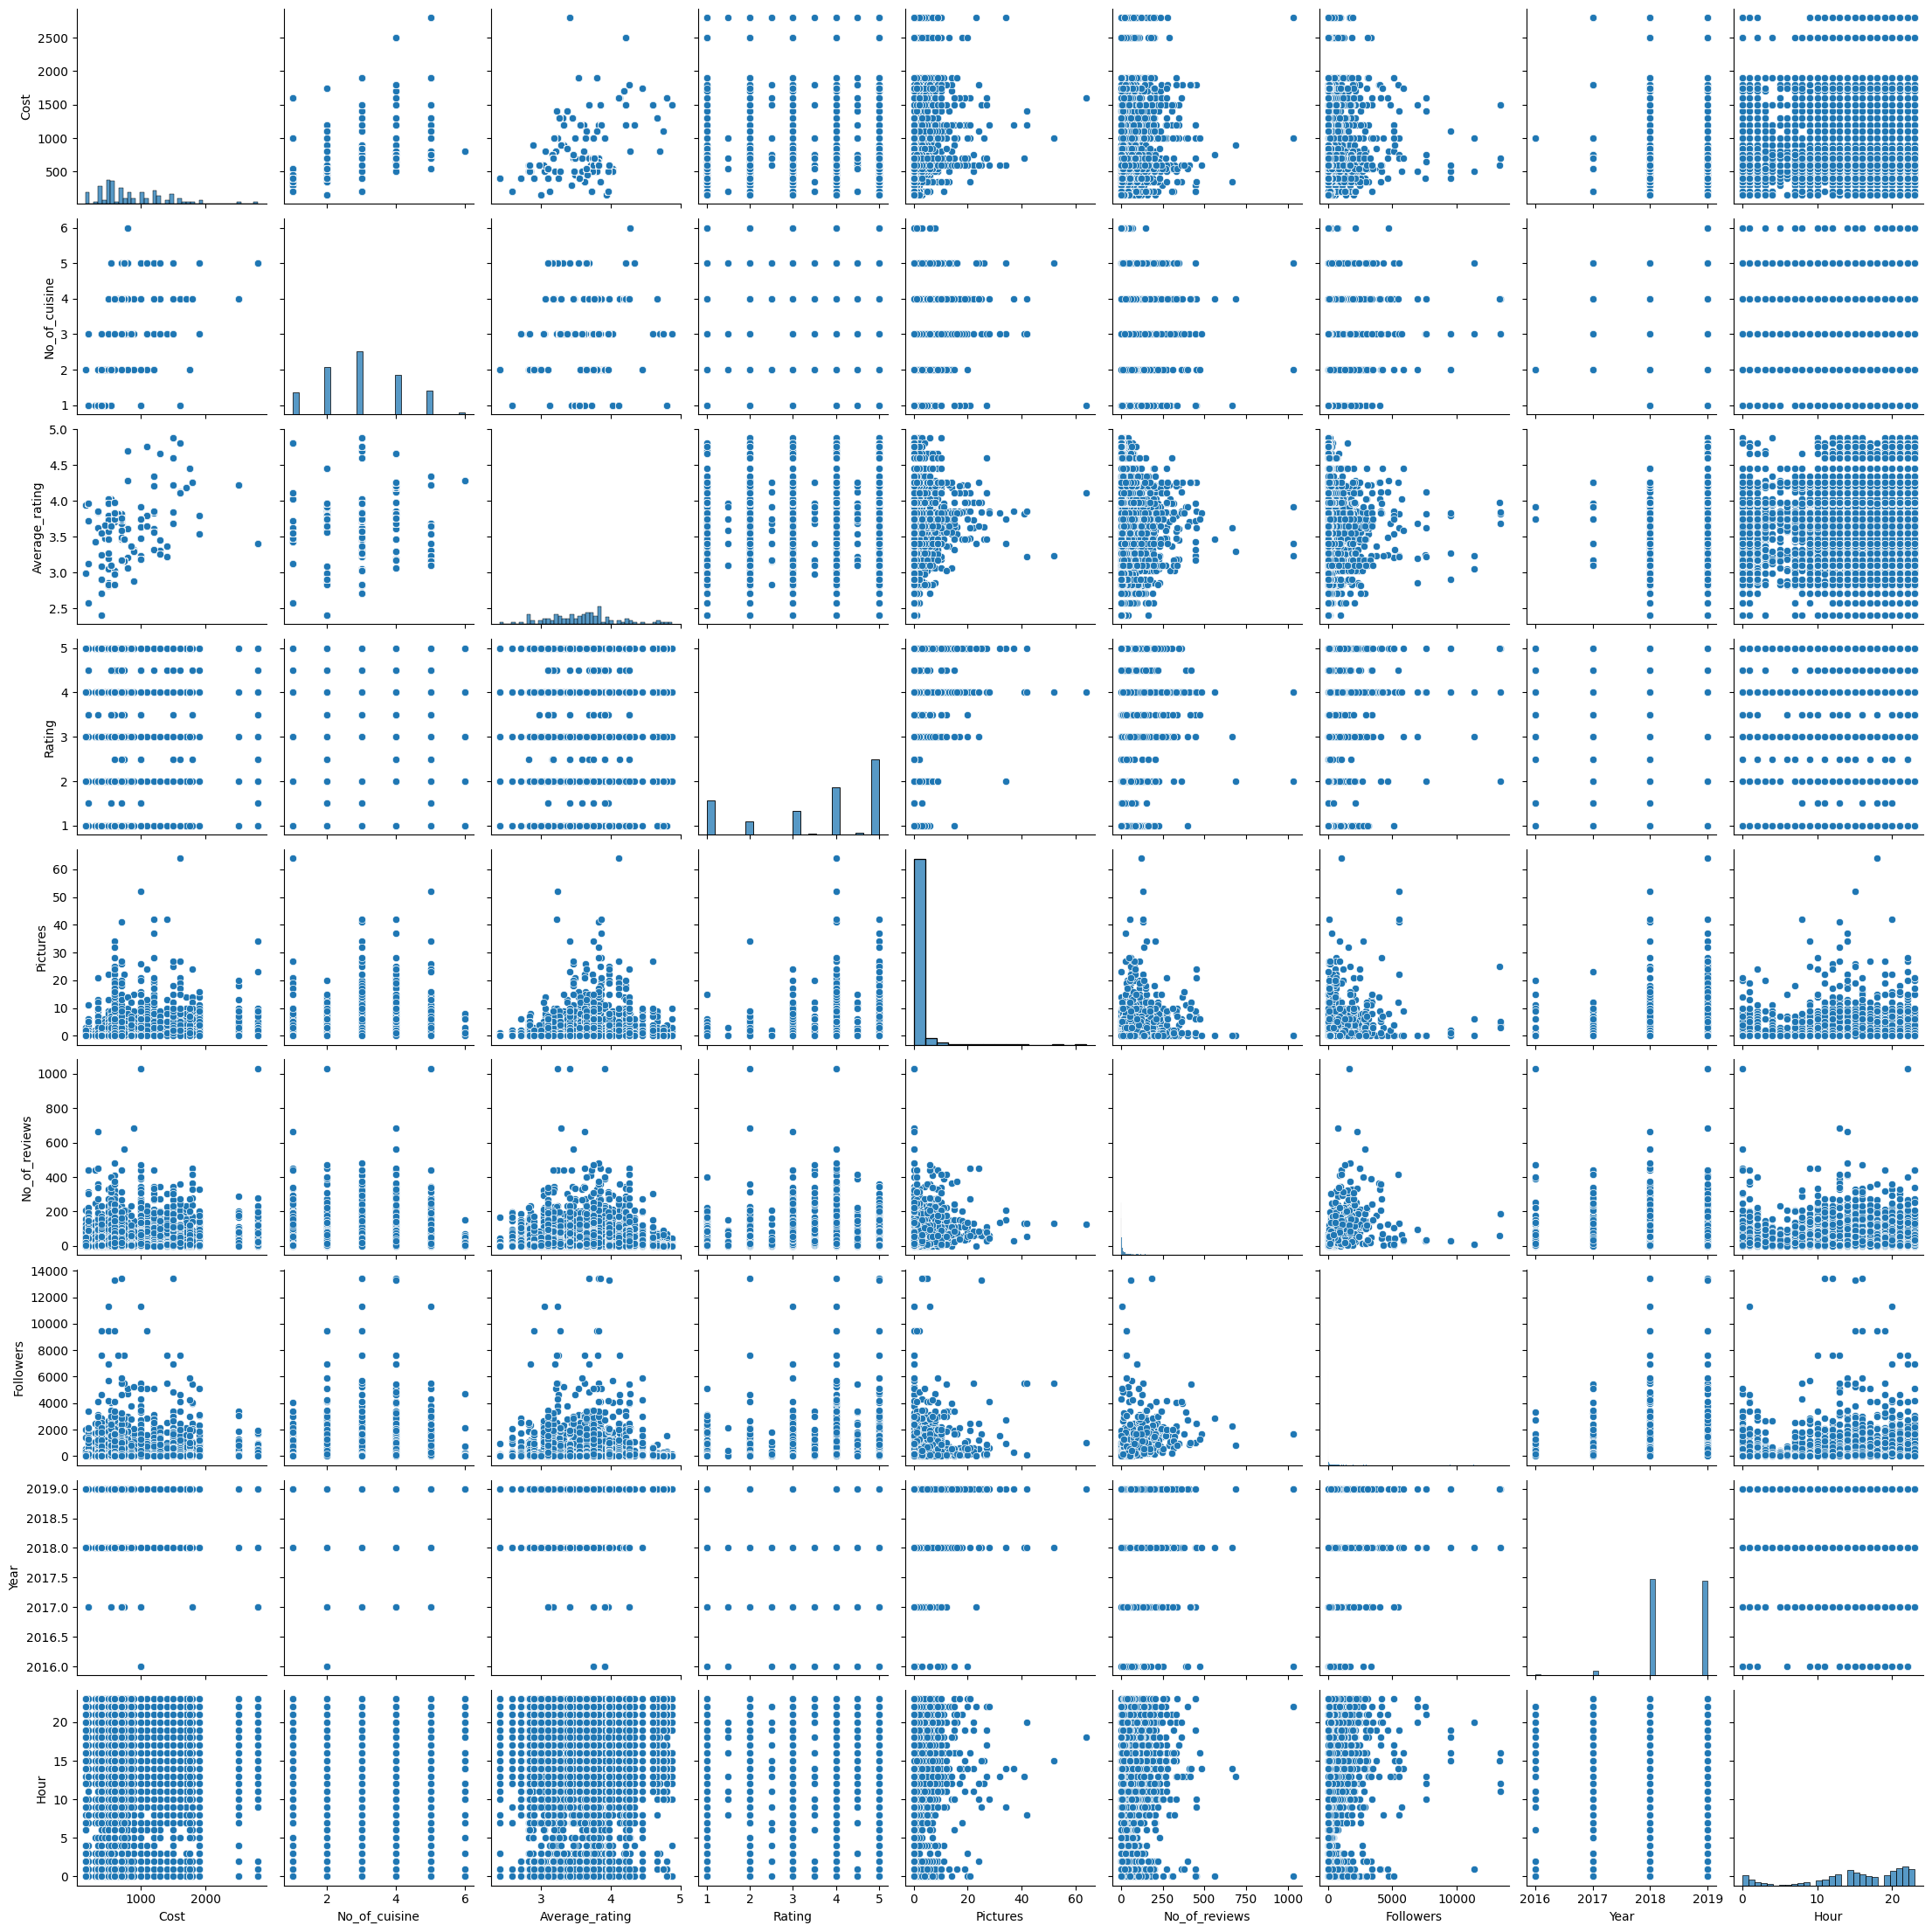

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that there is no significant correlation between the given features in the merged dataframe.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis 1 : *Average rating by the customer is 3.5*

Hypothesis 2 : *Restaurants which serves greater variety of cuisines are costly.*

Hypothesis 3 : *Cost is distributed normally.*

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Average rating by the customer is 3.5**


Null Hypothesis H0 : ℳ = 3.5 , Mean rating is 3.5

Alternative Hypothesis H1 : ℳ !=3.5 , Mean rating is not 3.5

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats 
from scipy.stats import ttest_1samp

In [ ]:
#let's take the sample mean and population mean
pop_mean = 3.5
sample = hotel['Average_rating']
t_stat, p_value = ttest_1samp(sample, pop_mean)
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  2.02243494717331
P-Value:  0.04582862553131105


In [ ]:
# set level of significance to 0.05 (which is generally used)
los = 0.05

In [ ]:
# criteria for null hypothesis to reject
if p_value <= los:
  print("Reject Null Hypothesis")
else :
  print(" Fail to reject Null hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I chose t test for one sample (two-tailed test) to check if the average rating given by reviewers is 3.5 or not.

##### Why did you choose the specific statistical test?

Since t test is used to test sample mean considering the population mean assuming that population parameters are unknown. The objective of this test is to compare the means of two related or unrelated sample groups. Hence considering the given data as sample and extraxting Average_rating as data and compared it with total average rating of 3.5 . 

**INFERENCE :**
Since p_value obatined is less than level of significance (0.05). Hence we reject the null hypothesis and conclude that avergae rating given by reviewers is not 3.5 

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 2 : Restaurants which serves greater variety of cuisines are costly.

Null Hypothesis H0 : There is no relation between number of cuisines and cost.

Alternative Hypothesis H1 : Restaurants which serve higher number of cuisines are more costly.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
  
# defining the table
sample = [hotel['No_of_cuisine'], hotel['Cost']]
stat, p_value, dof, expected = chi2_contingency(sample)
  
# interpret p_value-value
los = 0.05
print("p_value value is " + str(p_value))
if p_value <= los:
    print('Reject null hypothesis')
else:
    print('Failed to reject null hypothesis')

p_value value is 0.6347343028793265
Failed to reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have used the chi-square contingency test to check if cost and Number of cuisines have rlationship among them or not.

##### Why did you choose the specific statistical test?

The chi-square contingency test is used to test the independence of two events. It tells us  whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

**INFERENCE :**
Since p value obtained is 0.63 which is greater than level of significance, i.e., 0.05, hence we fail to reject the null hypothesis and coclude that there is no relation between number of cuisines and cost.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothesis 3 : Cost is distributed normally.

Null Hypothesis H0 : Cost has Gaussian distribution.

Alternative Hypothesis H1 : cost does not have Gaussian distribution.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
sample = hotel['Cost']
stat, p_value = shapiro(sample)
print('stat=%.3f, p_value=%.3f' % (stat, p_value))
if p_value > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.912, p_value=0.000
Probably not Gaussian


##### Which statistical test have you done to obtain P-Value?

Here I have used Shapiro - Wilk test to check if Distribution of cost for restaurants is distributed normally or not. 

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution. The test gives a p value; small values indicate sample is not normally distributed (can reject the null hypothesis that  population is normally distributed if values are under a certain threshold).
Also it assumes that Observations in each sample are independent and identically distributed (iid).

**INFERENCE :**
Since p value is 0.00 wjich is less than level of significance 0.05, hence we fail null hypothesis. And conclue that cost is not distributed normally.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Let's copy the original data and work on copied dataset
hotel_df=hotel.copy()
review_df=review.copy()

## Hotel dataset

In [ ]:
#Function to see the percent of missing value
def null_value_per(df):
  
  null_df=pd.DataFrame()
  null_count=df.isnull().sum()
  null_per = null_count/df.shape[0]*100
  null_df['Null_Count']=null_count
  null_df['Null_percent']=null_per

  return null_df

In [ ]:
# Check for null values in hotel_df

hotel_null_values = null_value_per(hotel_df)
hotel_null_values

Null_Count  Null_percent
Restaurant               0           0.0
Links                    0           0.0
Cost                     0           0.0
Collections             50          50.0
Cuisines                 0           0.0
Timings                  1           1.0
No_of_cuisine            0           0.0
Average_rating           0           0.0

* Timings contain 1 null value, so it can be imputed with mode of the column.
* Collections contain more than 50% null values. Hence it must be dropped.
* Also links is not useful for data analysis. Hence we will drop it.

Let's check for one missing value in Timings...

In [ ]:
# checking for one missing value in Timings
hotel_df[hotel_df['Timings'].isnull()]

Restaurant                                              Links  Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...   900   

   Collections                            Cuisines Timings  No_of_cuisine  \
30         NaN  Andhra, South Indian, North Indian     NaN              3   

    Average_rating  
30            3.32

In [ ]:
# Imputing timings missing value with mode of that column
from pandas._libs.hashtable import mode
hotel_df['Timings'].fillna(hotel_df.Timings.mode()[0],inplace = True)

In [ ]:
# Dropping the columns collection and Links
hotel_df.drop(columns = ['Collections'],axis = 1,inplace = True)

## Review dataset

In [ ]:
## Check for null values in review_df
review_null_values = null_value_per(review_df)
review_null_values

Null_Count  Null_percent
Restaurant              0      0.000000
Reviewer                0      0.000000
Review                  7      0.070267
Rating                  0      0.000000
Metadata                0      0.000000
Time                    0      0.000000
Pictures                0      0.000000
No_of_reviews           0      0.000000
Followers               0      0.000000
Year                    0      0.000000
Hour                    0      0.000000

In [ ]:
#filling null values in review_df  review column
review_df = review_df.fillna({"Review": "No Review"})

#### What all missing value imputation techniques have you used and why did you use those techniques?

For Hotel dataset:
* Imputed the one null value in Timings with mode of column because it is assumed that opening and closing time is similar for most of the restaurants.
* Since Collections contain more than 50% null values, hence this column has been dropped.

For review dataset:
* There are missing values in review, Hence filled it with 'No review'.

### 2. Handling Outliers

### Anamoly Detection

In [ ]:
#function to plot for outlier detection
def outlier_plots(df, features):
  """ function to plot the distribution plot and boxplots for the provided features
      parameters: Dataframe and the features for which we need the plots"""
  for i in range(0,len(features)):
    plt.figure(figsize = (20,10))
    plt.subplot(1,3,1)
    sns.distplot(df[features[i]])
    plt.subplot(1,3,2)
    plt.scatter(range(df.shape[0]), np.sort(df[features[i]].values))
    plt.subplot(1,3,3)
    sns.boxplot(df[features[i]])   

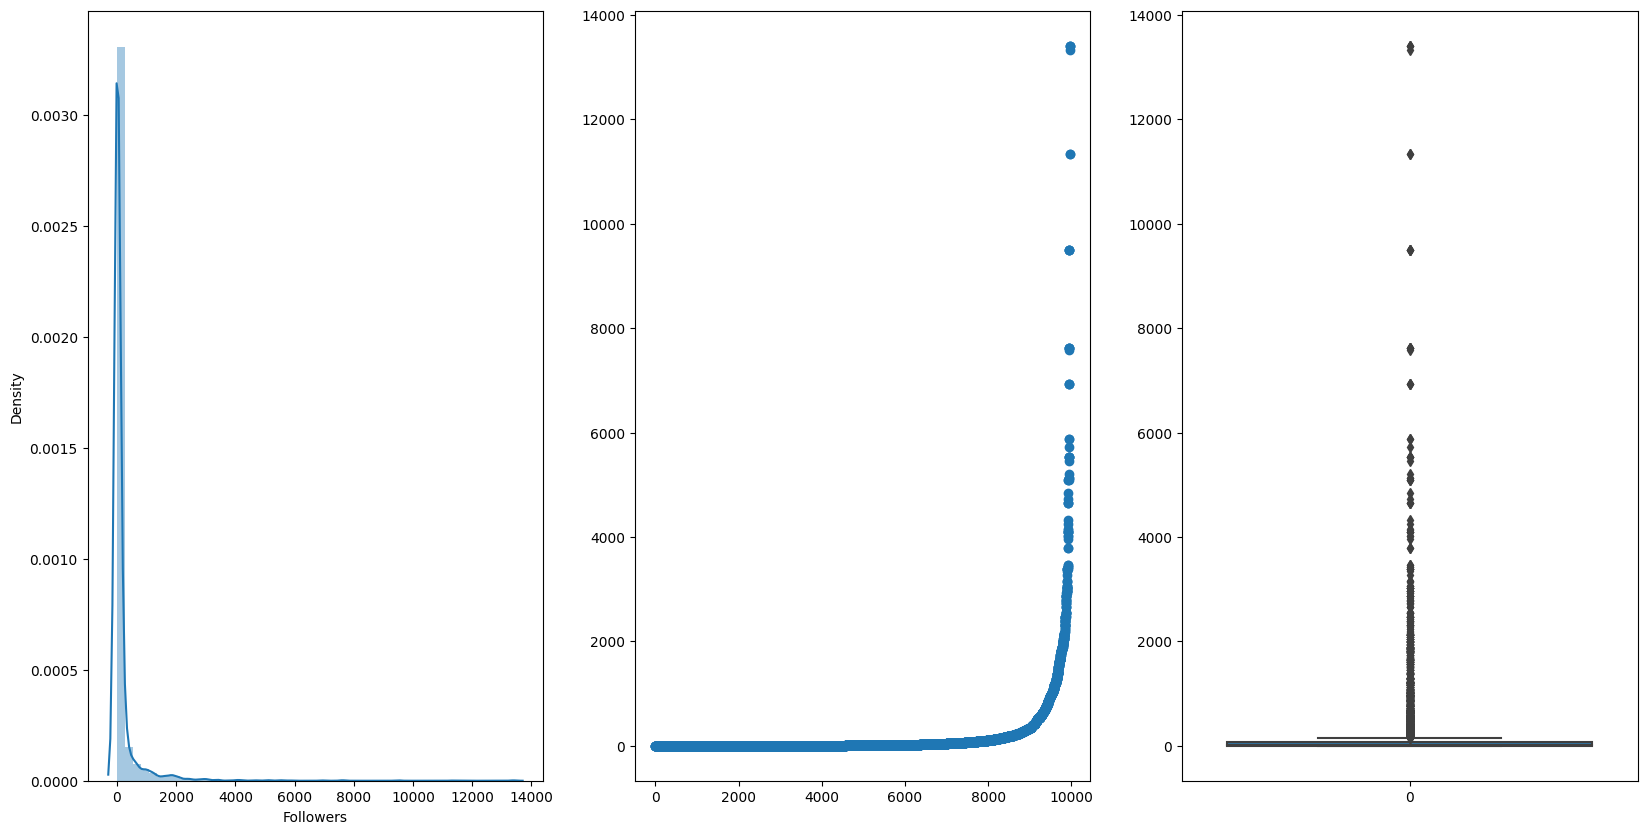

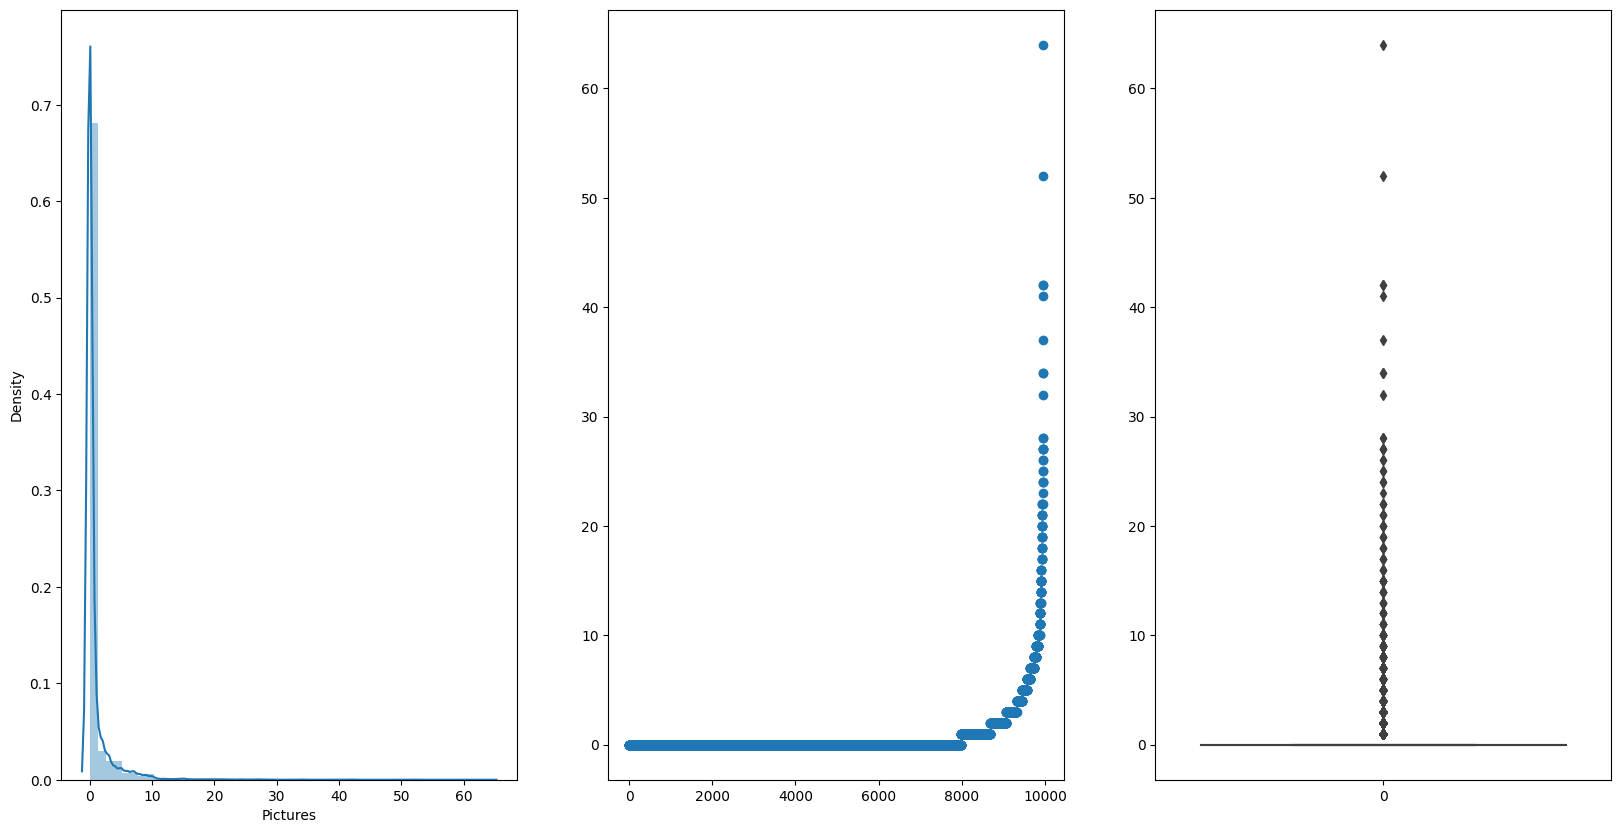

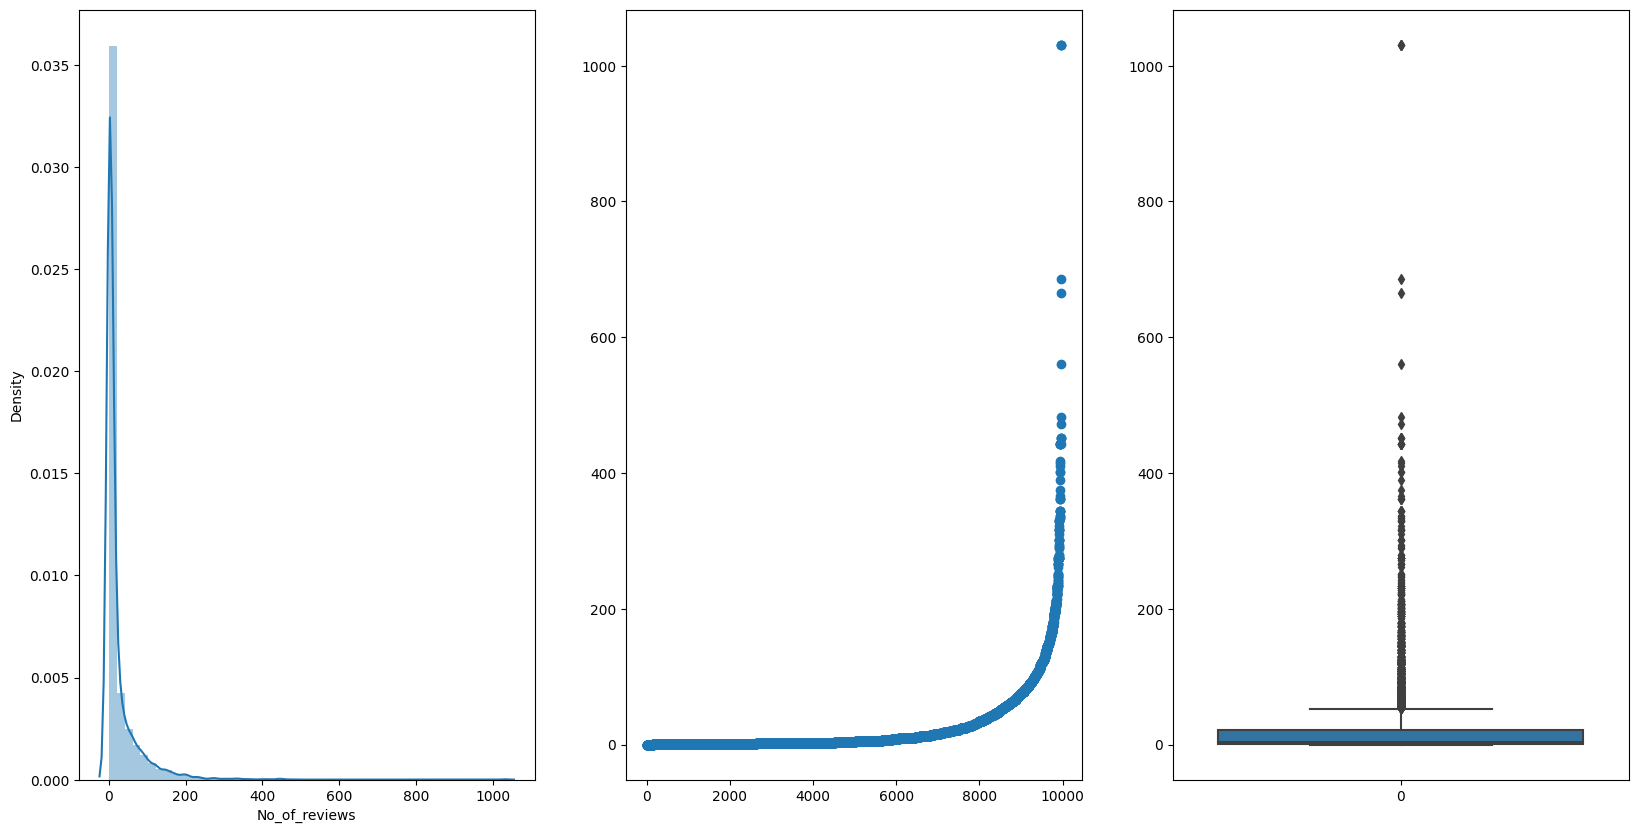

In [ ]:
# Getting outliers for review dataset
outlier_plots(review_df,['Followers','Pictures','No_of_reviews'])

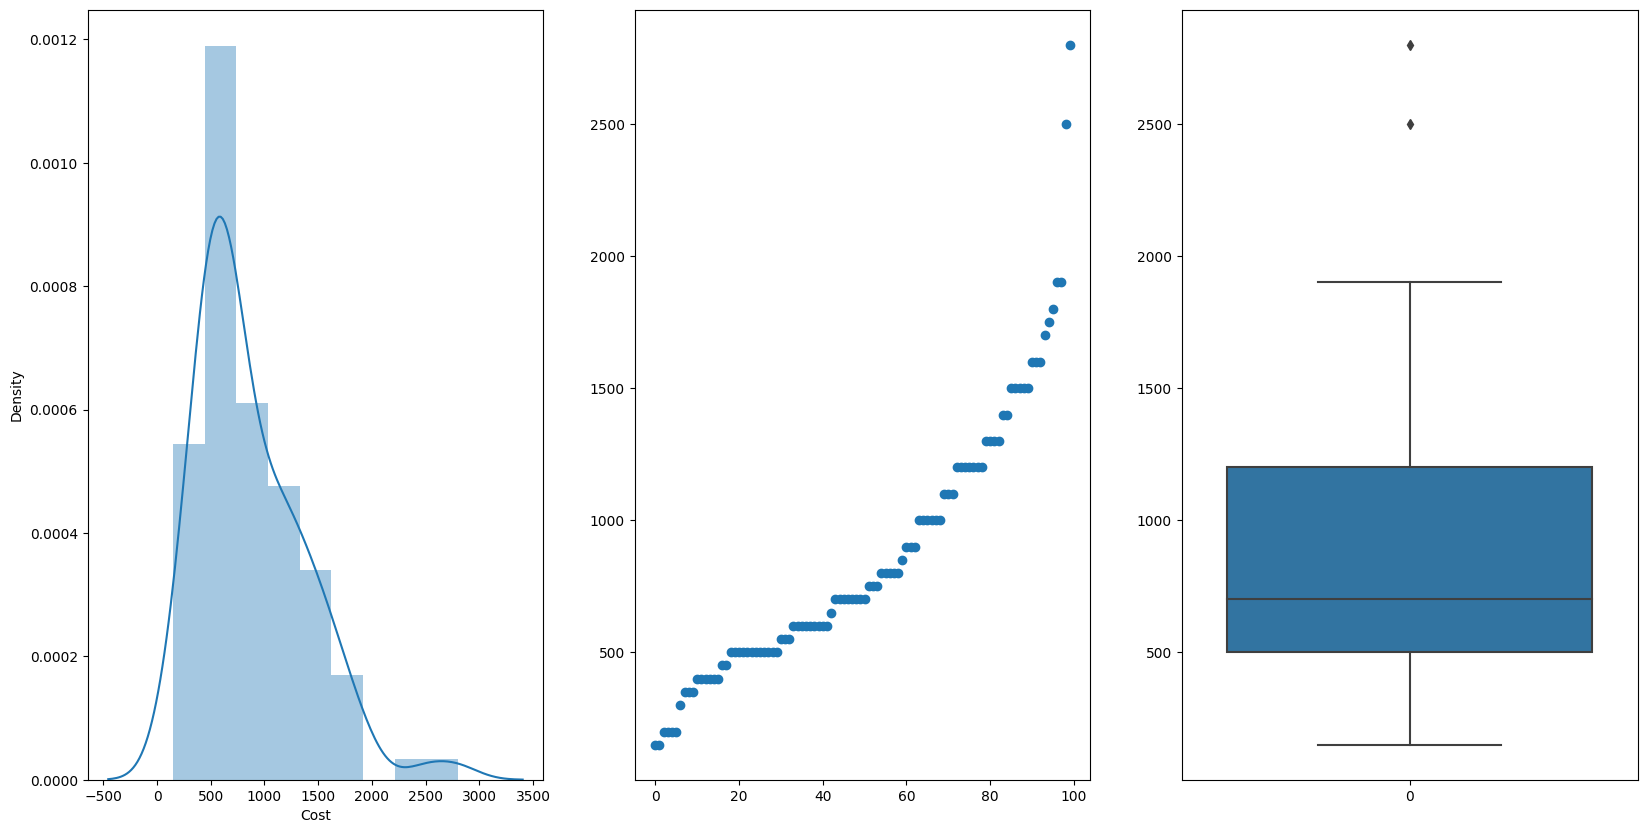

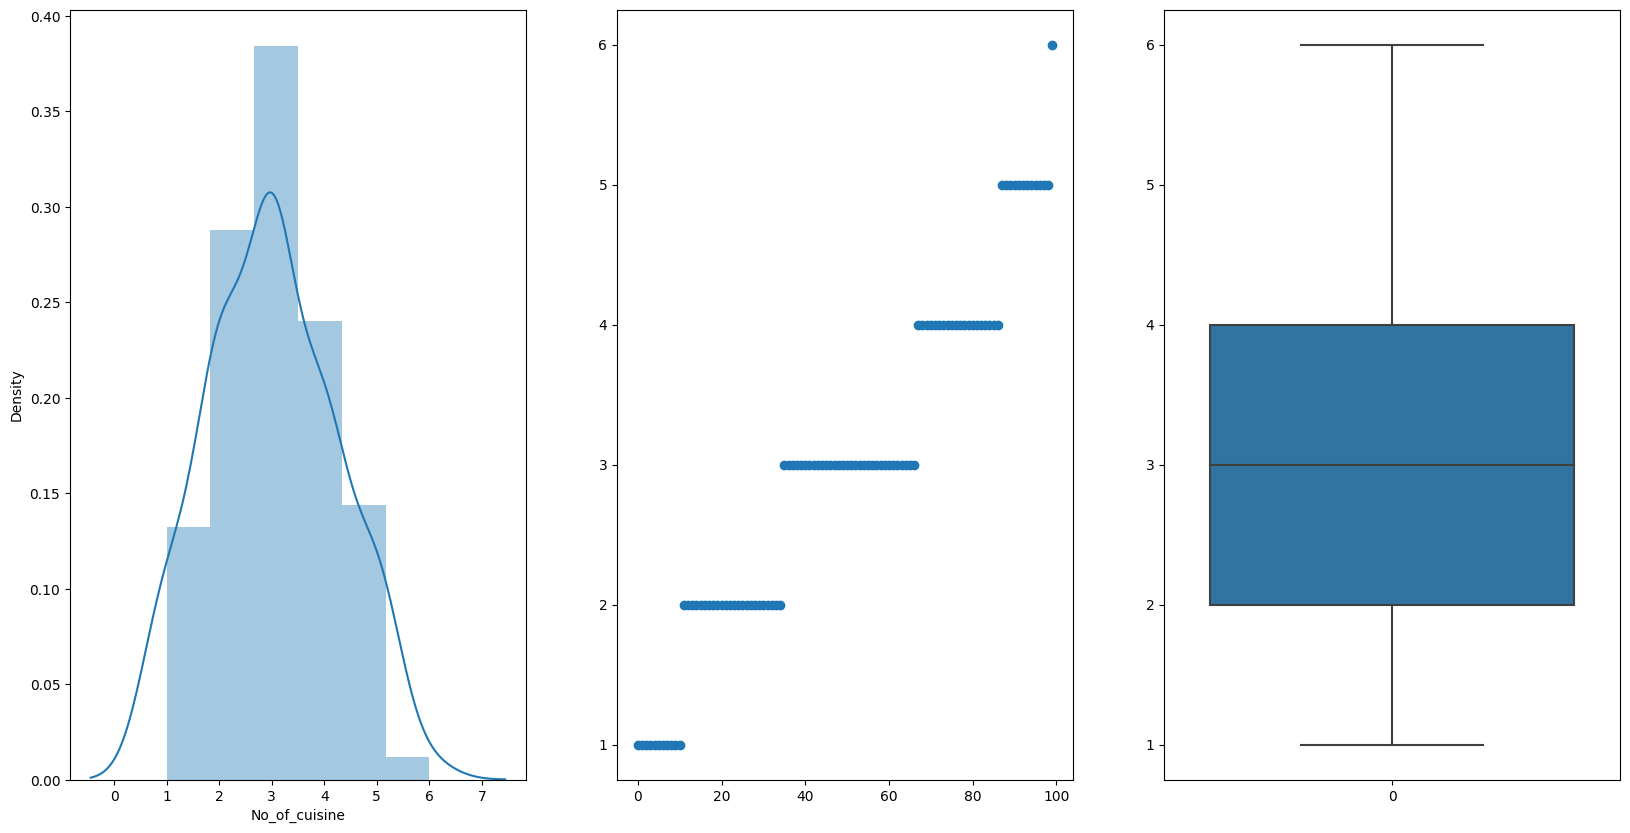

In [ ]:
# getting outliers for hotel dataset
outlier_plots(hotel_df,['Cost','No_of_cuisine'])

In [ ]:
#isolation forest for anamoly detection on cost
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(hotel_df['Cost'].values.reshape(-1, 1))

IsolationForest(contamination=0.01)

In [ ]:
# fitting and plotting of outliers
def visualize_outliers(df,features):
  '''Function for fitting and getting plot for outliers'''
  #isolation forest for anamoly detection on cost
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
  isolation_forest.fit(df[features].values.reshape(-1, 1))

  #chart to visualize outliers
  xx = np.linspace(df[features].min(), df[features].max(), len(df)).reshape(-1,1)
  anomaly_score = isolation_forest.decision_function(xx)
  outlier = isolation_forest.predict(xx)
  plt.figure(figsize=(10,4))
  plt.plot(xx, anomaly_score, label='anomaly score')
  plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
  where=outlier==-1, color='y',
  alpha=.4, label='outlier region')
  plt.legend()
  plt.ylabel('anomaly score')
  plt.xlabel(features)
  plt.show();

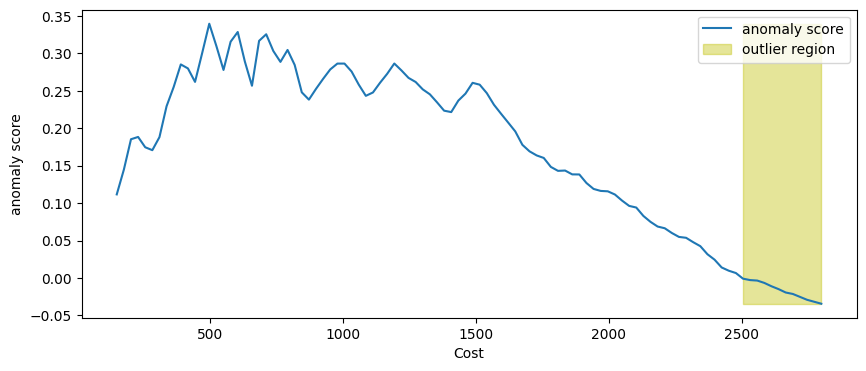

In [ ]:
#visualizing outlier for cost
visualize_outliers(hotel_df,'Cost')

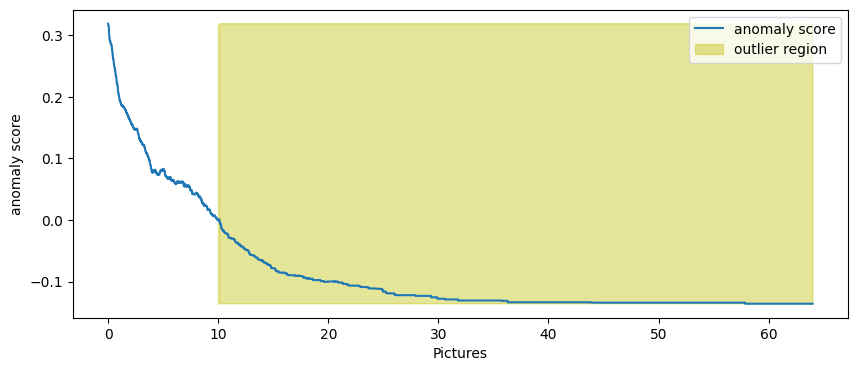

In [ ]:
#visualizing outlier for pictures
visualize_outliers(review_df,'Pictures')

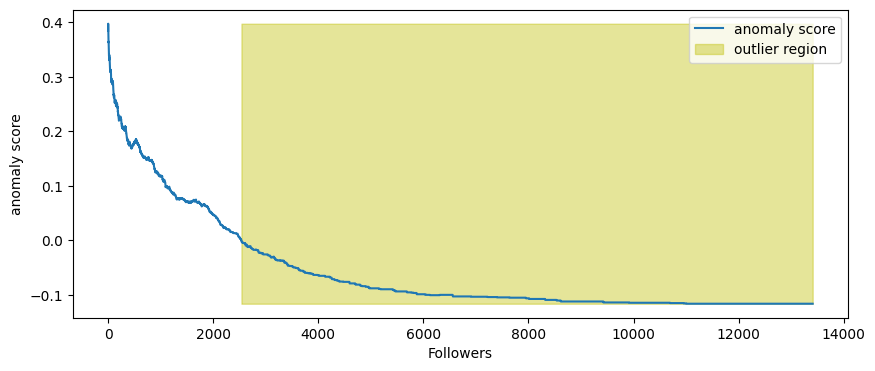

In [ ]:
#visualizing outlier for Followers
visualize_outliers(review_df,'Followers')

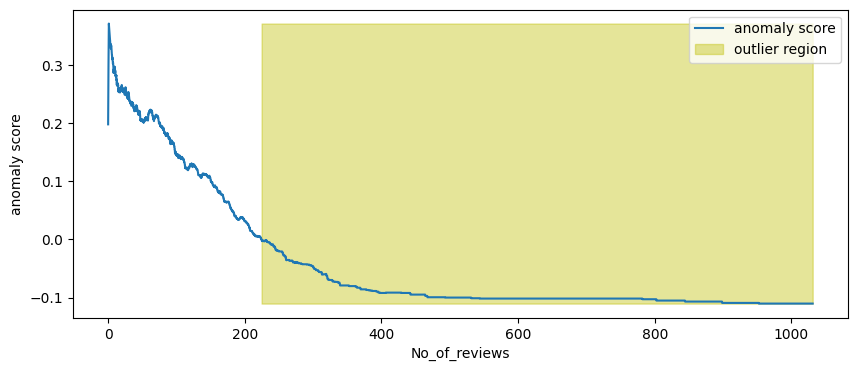

In [ ]:
#visualizing outlier for No_of_reviews
visualize_outliers(review_df,'No_of_reviews')

In [ ]:
# For Skew Symmetric features defining upper and lower boundry

def outlier_treatment_skew(df,feature):

  #inter quartile range
  IQR= df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_bound = df[feature].quantile(0.25) - 1.5*IQR
  upper_bound = df[feature].quantile(0.75) + 1.5*IQR
  # print(f'upper : {upper_bound} lower : {lower_bound}')
  return upper_bound,lower_bound 

In [ ]:
# Restricting the data to lower and upper boundary for features in the dataset
def replace_outliers(df,features):

  #lower limit capping
  df.loc[df[features]<= outlier_treatment_skew(df=df,
                                               feature=features)[1], features]=outlier_treatment_skew(df=df,feature=features)[1]

#upper limit capping
  df.loc[df[features]>= outlier_treatment_skew(df=df,
                                               feature=features)[0], features]=outlier_treatment_skew(df=df,feature=features)[0]

In [ ]:
# Replace the outlier value with its upper bound and lower bound
replace_outliers(hotel_df,'Cost')
replace_outliers(review_df,'Pictures')
replace_outliers(review_df,'No_of_reviews')
replace_outliers(review_df,'Followers')

##### What all outlier treatment techniques have you used and why did you use those techniques?

* For the detection of outliers , I have used isolation forest which is unsupervised technique to detect outliers. It assumes that points which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations while The points that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them.
* For the treatment of otliers, replaced upper outliers with upper bound and lower outliers with lower bound considering their maximum and minimum value cannot exceed this points.

### 3. Categorical Encoding

In [ ]:
hotel_df.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'No_of_cuisine',
       'Average_rating'],
      dtype='object')

In [ ]:
# create the new dataframe for clustering 
# And have encoding on cuisines
cluster_df = hotel_df.drop([ 'Timings'],axis=1)
cluster_df.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  No_of_cuisine  \
0  Chinese, Continental, Kebab, European, South I...              6   
1                     Biryani, North Indian, Chinese              3   
2       Asian, Mediterranean, North Indian, Desserts              4   
3  Biryani, North Indian, Chinese, Seafood, Bever...              5   
4  Asian, Continental, North Indian, Chinese, Med...              5   

   Average_rating  
0            4.28  
1            4.70  
2            4.66  
3            3.21  
4            4.34

In [ ]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Restaurant      100 non-null    object 
 1   Cost            100 non-null    int64  
 2   Cuisines        100 non-null    object 
 3   No_of_cuisine   100 non-null    int64  
 4   Average_rating  100 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.8+ KB


In [ ]:
# Encode your categorical columns
cluster_df['Cuisines'] = cluster_df['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_df = cluster_df.explode('Cuisines')

#removing extra trailing space from Cuisines after exploded
cluster_df['Cuisines'] = cluster_df['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for Cuisines
cluster_df = pd.get_dummies(cluster_df, columns=["Cuisines"], prefix=["Cuisines"])

In [ ]:
#grouping each restaurant as explode created unnecessary rows
cluster_df = cluster_df.groupby("Restaurant").sum().reset_index()

#### What all categorical encoding techniques have you used & why did you use those techniques?

For encoding of categorical feature which is 'Cuisines' , First I have splitted the cuisines into a list and then creted dummy variables for each of the cuisines and alloted to the restaurants. 

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# creating datafame for sentiment analysis
sentiment_df = review_df[['Review', 'Rating']]

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 13.1 MB/s eta 0:00:00


In [ ]:
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(str(x)))

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''This function is for removing punctuation'''
   # replacing the punctuations with no space, hence punctuation marks will be removed
  translator = text.translate(str.maketrans('', '', string.punctuation))
  # return the text stripped of punctuation marks
  return (translator)
     

In [ ]:

#Alternate ,method for removing punctuations
#import re
#def remove_p(text):
#  new=re.sub(r'[^\w\s]', '', text)
  

In [ ]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)

In [ ]:
sentiment_df.sample(3)

Review  Rating
7885  what do i saythis is the worst place available...     1.0
8496  great value for money spent natural ambience f...     4.0
2904  the maggie masala is put alot in the maggie co...     1.0

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#function to remove digits
def remove_digit(text):
  '''Function to remove digit from text'''
  char_str = '' .join((z for z in text if not z.isdigit()))
  return char_str

In [ ]:
#remove digit using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_digit)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# creating object for english stopwords 
sw = stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
# Installing and importing necessary libraries for removing emojis
!pip install emot
from emot.emo_unicode import UNICODE_EMOJI # For emojis
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 KB 2.3 MB/s eta 0:00:00


In [ ]:
# Function to transform the emojis to its respective text form, using UNICODE_EMOJI
def handle_emoji(text):
  for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
  return text

In [ ]:
sentiment_df['Review'] = sentiment_df['Review'].apply(handle_emoji)

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
# Not nedeed

#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [ ]:
sentiment_df.sample(3)

Review  Rating
1412  [good, delicious, food, ever, ate, hyderabad, ...     5.0
9735  [visited, zega, guests, abroad, couple, cockta...     5.0
4834        [requested, replace, sambar, chutney, done]     4.0

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  '''function for lemmatization'''
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

##### Which text normalization technique have you used and why?

I have used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# Not needed

#### 10. Text Vectorization

In [ ]:
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
X = sentiment_df['Review']
X= vectorizer.fit_transform(X)

In [ ]:
# collect the vocabulary items used in the vectorizer to see them
dictionary = vectorizer.vocabulary_.items()
dictionary

dict_items([('ambience', 498), ('good', 6295), ('food', 5597), ('quite', 12170), ('saturday', 13248), ('lunch', 8898), ('cost', 3363), ('effective', 4675), ('place', 11438), ('sate', 13227), ('brunch', 2101), ('one', 10501), ('also', 417), ('chill', 2699), ('friend', 5828), ('parent', 10991), ('waiter', 16634), ('soumen', 14224), ('da', 3698), ('really', 12387), ('courteous', 3413), ('helpful', 6897), ('pleasant', 11541), ('evening', 4922), ('service', 13507), ('prompt', 11928), ('experience', 5096), ('kudos', 8359), ('must', 9899), ('try', 15943), ('great', 6500), ('thnx', 15527), ('pradeep', 11714), ('subroto', 14771), ('personal', 11275), ('recommendation', 12442), ('penne', 11204), ('alfredo', 335), ('pasta', 11067), ('music', 9873), ('background', 1191), ('amazing', 454), ('arun', 872), ('guy', 6644), ('behavior', 1493), ('sincerety', 13869), ('course', 3404), ('would', 17017), ('like', 8651), ('visit', 16553), ('goodwe', 6405), ('ordered', 10600), ('kodi', 8301), ('drumstick', 45

##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

###(a). hotel_df

In [ ]:
hotel_df.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'No_of_cuisine',
       'Average_rating'],
      dtype='object')

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
hotel_df.drop('Links',axis=1,inplace=True)

In [ ]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'No_of_reviews', 'Followers', 'Year', 'Hour'],
      dtype='object')

In [ ]:
#dropping the metadata and Time column from review_df
review_df.drop(columns=['Metadata', 'Time'], axis = 1, inplace=True)

In [ ]:
# for sentiment analysis, creating dependant variable based on rating
#We will create 2 categories based on the rating by creating a python function
def sentiment(rating):
  if rating >=3.5:
    return 1 
    # positive sentiment
  else:
    return 0
    # negative sentiment

In [ ]:
# applying to sentiment dataset 
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(sentiment)
sentiment_df

Review  Rating  Sentiment
0     [ambience, good, food, quite, good, saturday, ...     5.0          1
1     [ambience, good, pleasant, evening, service, p...     5.0          1
2     [must, try, great, food, great, ambience, thnx...     5.0          1
3     [soumen, da, arun, great, guy, behavior, since...     5.0          1
4     [food, goodwe, ordered, kodi, drumstick, baske...     5.0          1
...                                                 ...     ...        ...
9995  [madhumathi, mahajan, well, start, nice, court...     3.0          0
9996  [place, never, disappointed, u, food, courteou...     4.5          1
9997  [bad, rating, mainly, chicken, bone, found, ve...     1.5          0
9998  [personally, love, prefer, chinese, food, coup...     4.0          1
9999  [checked, try, delicious, chinese, food, seen,...     3.5          1

[9962 rows x 3 columns]

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

# for sentiment analysis
print('for sentiment analysis : ',sentiment_df.columns)
print('""'*80)
# For clustering analysis
print('For clustering analysis :', cluster_df.columns)

for sentiment analysis :  Index(['Review', 'Rating'], dtype='object')
""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
For clustering analysis : Index(['Restaurant', 'Cost', 'No_of_cuisine', 'Average_rating',
       'Cuisines_American', 'Cuisines_Andhra', 'Cuisines_Arabian',
       'Cuisines_Asian', 'Cuisines_BBQ', 'Cuisines_Bakery',
       'Cuisines_Beverages', 'Cuisines_Biryani', 'Cuisines_Burger',
       'Cuisines_Cafe', 'Cuisines_Chinese', 'Cuisines_Continental',
       'Cuisines_Desserts', 'Cuisines_European', 'Cuisines_Fast Food',
       'Cuisines_Finger Food', 'Cuisines_Goan', 'Cuisines_Healthy Food',
       'Cuisines_Hyderabadi', 'Cuisines_Ice Cream', 'Cuisines_Indonesian',
       'Cuisines_Italian', 'Cuisines_Japanese', 'Cuisines_Juices',
       'Cuisines_Kebab', 'Cuisines_Lebanese', 'Cuisines_Mediterranean',
       'Cuisines_Mexican', 'Cuisines_Modern Indian', 'Cuis

##### What all feature selection methods have you used  and why?

Feature are selected based on market experiences and consumer consuption. Some of the features will be selectig using Dimensionality reduction technique.

##### Which all features you found important and why?

I have created two datasets for clustering and sentiment analysis. 
* For clustering : features include - 'Cost' , 'No_of_cuisines' , 'Average_rating', and all the cuisines count for each restaurant.
* For sentiment analysis : Features include - 'Review' and 'Sentiments' where sentiment is extracted from rating.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
#check if data needs to be transformed
def skewed_feature(df,features):
  symmetric_f = []
  skewed_f = []
  for i in features:
      if (df[i].skew() <= -1) | (df[i].skew() >= 1) :
        skewed_f.append(i)
      else:
        symmetric_f.append(i)
  return symmetric_f, skewed_f

In [ ]:
#finding symmetric and skew symmetric features IN CLUSTER DF
features = ['Cost', 'No_of_cuisine', 'Average_rating']
s,sk=skewed_feature(cluster_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['No_of_cuisine', 'Average_rating']
Skew symmetric features : ['Cost']


In [ ]:
#finding symmetric and skew symmetric features in Sentiment DF
features=['Rating', 'Sentiment']
s,sk=skewed_feature(sentiment_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Rating', 'Sentiment']
Skew symmetric features : []


Here cost is skewed symmetric. Hence we apply log transformation on Cost.

In [ ]:
# Transform Your data
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])

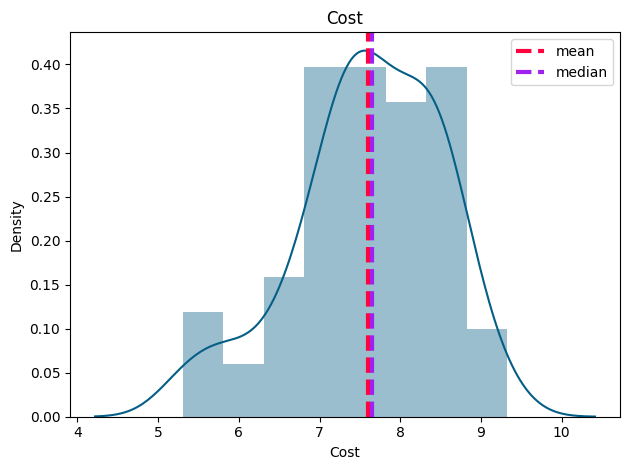

In [ ]:
# visualization of log transformation of cost 
sns.distplot(cluster_df['Cost'], color = '#055E85')
plt.axvline(cluster_df['Cost'].mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
plt.axvline(cluster_df['Cost'].median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'best')
plt.title('Cost');
plt.tight_layout();

In [ ]:
# Checking for skewness of cost again
features = ['Cost']
s,sk=skewed_feature(cluster_df,features)
print('Symmetric features :',s)
print('Skew symmetric features :',sk)

Symmetric features : ['Cost']
Skew symmetric features : []


So now there is no skewness in cost. Hence we can proceed further.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Min max scaler for only numeric columns

In [ ]:
scaled_df = cluster_df.copy()
scaled_df[["Cost","No_of_cuisine","Average_rating"]] = scaler.fit_transform(cluster_df[["Cost","No_of_cuisine","Average_rating"]])
scaled_df.set_index("Restaurant", inplace= True)

In [ ]:
# Applying minmax transformation to numeric data
numeric_cols = list(cluster_df.describe().columns)
scaled_df = pd.DataFrame(scaler.fit_transform(cluster_df[numeric_cols]))
scaled_df.columns = numeric_cols

In [ ]:
scaled_df

Cost  No_of_cuisine  Average_rating  Cuisines_American  \
0   0.831098       0.228571        0.381818                0.0   
1   0.200790       0.000000        0.038961                0.0   
2   0.695339       0.228571        0.506494                0.0   
3   0.772378       0.228571        0.522078                0.0   
4   0.600219       0.228571        0.358442                1.0   
..       ...            ...             ...                ...   
95  0.822225       0.685714        0.678355                0.0   
96  0.616247       0.085714        0.196537                0.0   
97  0.709954       0.085714        0.273593                0.0   
98  0.422536       0.085714        0.204329                0.0   
99  0.570969       0.428571        0.442424                0.0   

    Cuisines_Andhra  Cuisines_Arabian  Cuisines_Asian  Cuisines_BBQ  \
0               0.0               0.0             0.0           0.0   
1               0.0               0.0             0.0           0.0   
2               0.0               0.0             0.0           0.0   
3               0.0               0.0             0.0           0.0   
4               0.0               0.0             0.0           0.0   
..              ...               ...             ...           ...   
95              0.0               0.0             1.0           0.0   
96              0.0               0.0             0.0           0.0   
97              0.0               0.0             1.0           0.0   
98              0.0               0.0             0.0           0.0   
99              0.0               0.0             0.0           0.0   

    Cuisines_Bakery  Cuisines_Beverages  ...  Cuisines_North Indian  \
0               0.0                 0.0  ...                    1.0   
1               0.0                 0.0  ...                    1.0   
2               0.0                 0.0  ...                    1.0   
3               0.0                 0.0  ...                    1.0   
4               0.0                 0.0  ...                    0.0   
..              ...                 ...  ...                    ...   
95              0.0                 0.0  ...                    0.0   
96              0.0                 0.0  ...                    1.0   
97              0.0                 0.0  ...                    0.0   
98              0.0                 0.0  ...                    0.0   
99              0.0                 0.0  ...                    1.0   

    Cuisines_Pizza  Cuisines_Salad  Cuisines_Seafood  Cuisines_South Indian  \
0              0.0             0.0               0.0                    0.0   
1              0.0             0.0               0.0                    0.0   
2              0.0             0.0               0.0                    0.0   
3              0.0             0.0               0.0                    0.0   
4              0.0             0.0               0.0                    0.0   
..             ...             ...               ...                    ...   
95             0.0             0.0               0.0                    0.0   
96             0.0             0.0               0.0                    0.0   
97             0.0             0.0               0.0                    0.0   
98             0.0             0.0               0.0                    0.0   
99             0.0             0.0               0.0                    1.0   

    Cuisines_Spanish  Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  \
0                0.0                   0.0             0.0            0.0   
1                0.0                   0.0             0.0            0.0   
2                0.0                   0.0             0.0            0.0   
3                0.0                   0.0             0.0            0.0   
4                0.0                   0.0             0.0            0.0   
..               ...                   ...             ...            ...   
95               0.0 

##### Which method have you used to scale you data and why?

We have used MinMax Scaler to scale the data. The feature scaling is used to prevent the models from getting biased toward a specific range of values. Since the dummy variables created from cuisines contains the value 0 and 1 while other variables have different range of values. 

### 7. Dimesionality Reduction (For clustering)

In [ ]:
# Dimensionality Reduction (If needed)
#applying pca

features = scaled_df.columns

# create an instance of PCA
from sklearn.decomposition import PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df)

PCA()

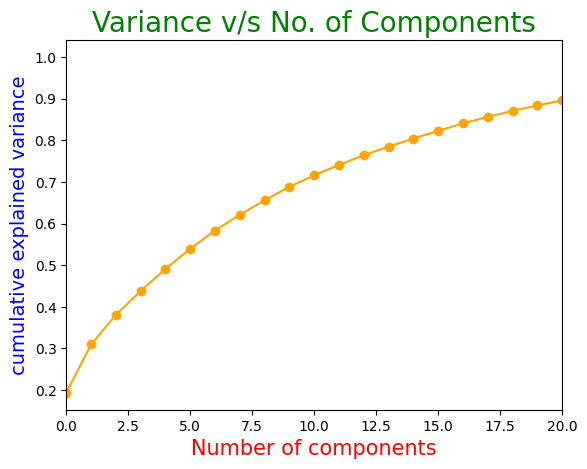

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('Number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 20])
plt.show()

In [ ]:
#using n_component as 4 
pca = PCA(n_components=4)

# fit PCA on features
pca.fit(scaled_df)

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 4 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df)

Explained variation per principal component: [0.19316988 0.11628744 0.07102057 0.05750685]
Cumulative variance explained by 4 principal components: 43.80%


In [ ]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 45)
transformed shape: (100, 4)


##### Do you think that dimensionality reduction is needed? Explain Why?

For clustering dataset, there are more than 30 variables, i.e., there are 47 variables and higher number of feaures makes computational cost of clustering algorithms also higher. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA as dimension reduction technique, because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique because it is able to identify patterns in the data that are responsible for the most variation.Principal component analysis (PCA) simplifies the complexity in high-dimensional data while retaining trends and patterns. It does this by transforming the data into fewer dimensions, which act as summaries of features.

### 8. Data Splitting (for sentimental analysis)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
#X = X_tfidf 
y = sentiment_df['Sentiment']

In [ ]:
y.value_counts()

1    6322
0    3640
Name: Sentiment, dtype: int64

In [ ]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# describes info about train and test set
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (7471, 17306)
y_train  (7471,)
X_test  (2491, 17306)
y_test  (2491,)


In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

##### What data splitting ratio have you used and why? 

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

<Axes: ylabel='Sentiment'>

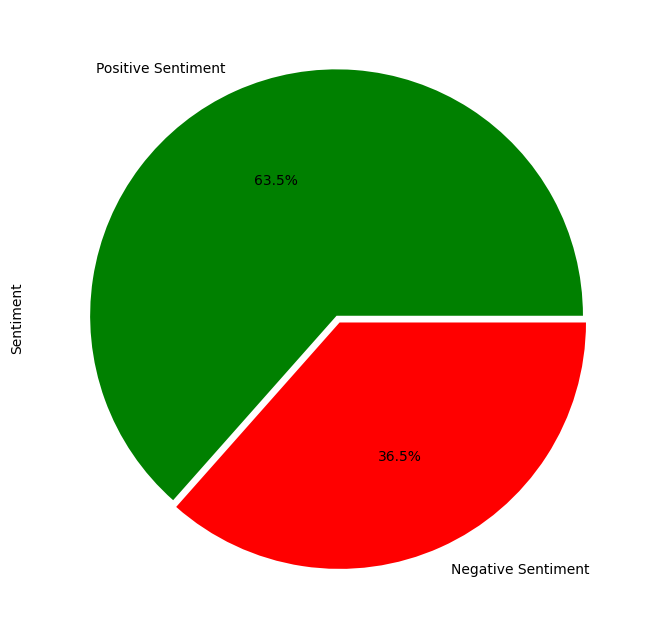

In [ ]:
# check if dataset is imbalanced or not
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                               autopct="%1.1f%%",
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['green','red'],
                               explode=[0.01,0.02])

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced but since it is lightly imbalanced, hence handling is not neccesaary. So we can proceed with same dataset.

In [ ]:
# Handling Imbalanced Dataset (If needed)
#not needed

## ***7. ML Model Implementation***

### ML Model - 1 : CLUSTERING


```
K Means clustering
```

In [ ]:
df_pca_copy = df_pca.copy()

In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans
# Fit the Algorithm
wcss_list= []  #Initializing the list for the values of WCSS  
wcss_dict = {}  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df_pca)  
    wcss_list.append(kmeans.inertia_) 
    wcss_dict[i] = kmeans.inertia_

In [ ]:
wcss_dict

{1: 106.53473871856798,
 2: 70.13837201432254,
 3: 51.248727046494785,
 4: 38.14032763716877,
 5: 28.502363607589764,
 6: 23.13226467512072,
 7: 19.646689911184794,
 8: 17.525993281958556,
 9: 15.299284565030149,
 10: 13.44888897004267}

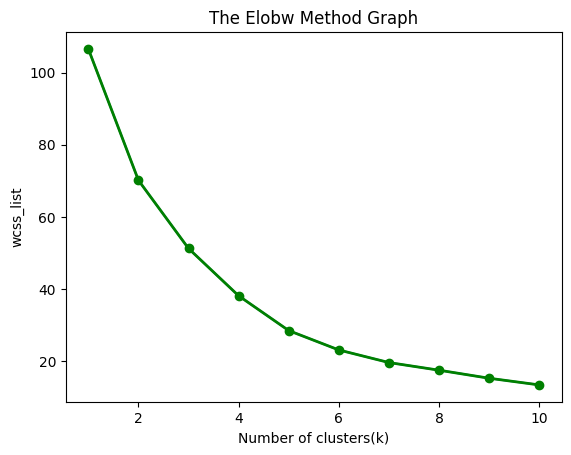

In [ ]:
# plot for sum of squared distance for each number of cluster
plt.plot(range(1, 11), wcss_list)
plt.plot(range(1,11),wcss_list, linewidth=2, color="green", marker ="o")  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

###Fitting the model with hyperparameter tuning

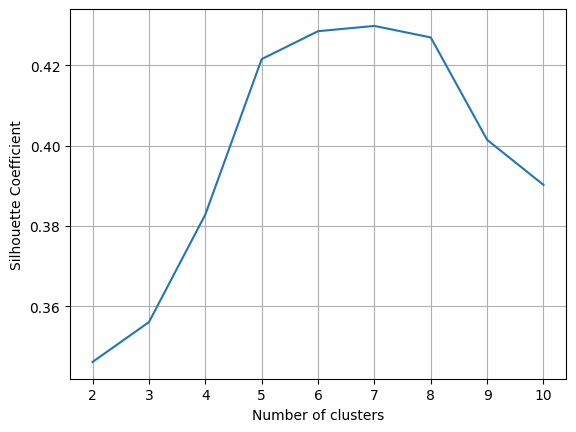

In [ ]:
# silhoutte score to find optimal number of scores
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid

silhouette_avg =[]
 # Calculate average silhouette score for each number of clusters (2 to 10)

for k in range(2,11):
  km = KMeans(n_clusters=k, random_state=3)
  km.fit(df_pca)
  silhouette_avg.append(silhouette_score(df_pca, km.labels_))
     
# plot the results
plt.plot(range(2,11), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Here it is clearly visible that Silhouette cofficient is minimum for k=4. Hence optimal number od clusters must be 4.

For n_clusters = 2 The average silhouette_score is : 0.34608767544205343
For n_clusters = 3 The average silhouette_score is : 0.3604051179159431
For n_clusters = 4 The average silhouette_score is : 0.3822126697574268
For n_clusters = 5 The average silhouette_score is : 0.4225794855616288
For n_clusters = 6 The average silhouette_score is : 0.43330836578845483


'  for i, c in enumerate(centers):\n      ax2.scatter(c[0], c[1], marker=\'\' %i, alpha=1,\n                    s=50, edgecolor=\'k\')\n\n    ax2.set_title("The visualization of the clustered data.")\n    ax2.set_xlabel("Feature space for the 1st feature")\n    ax2.set_ylabel("Feature space for the 2nd feature")\n    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "\n                  "with n_clusters = %d" % n_clusters),\n                 fontsize=14, fontweight=\'bold\')\n'

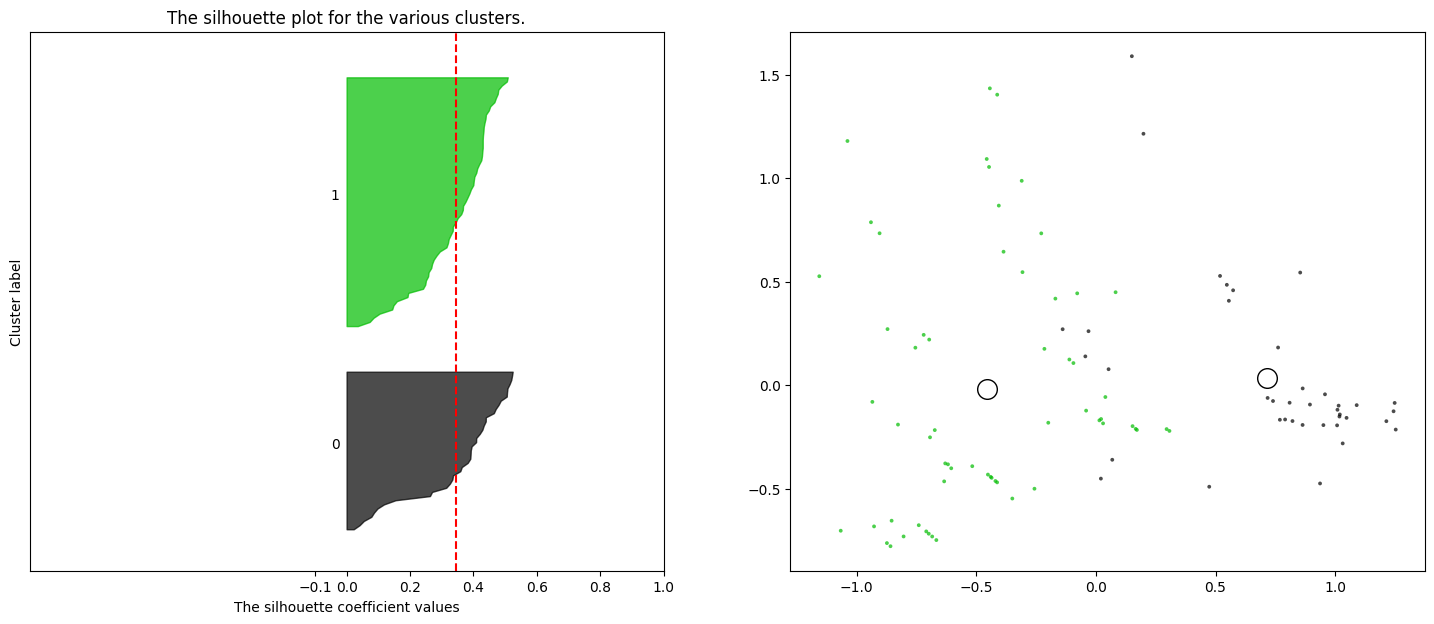

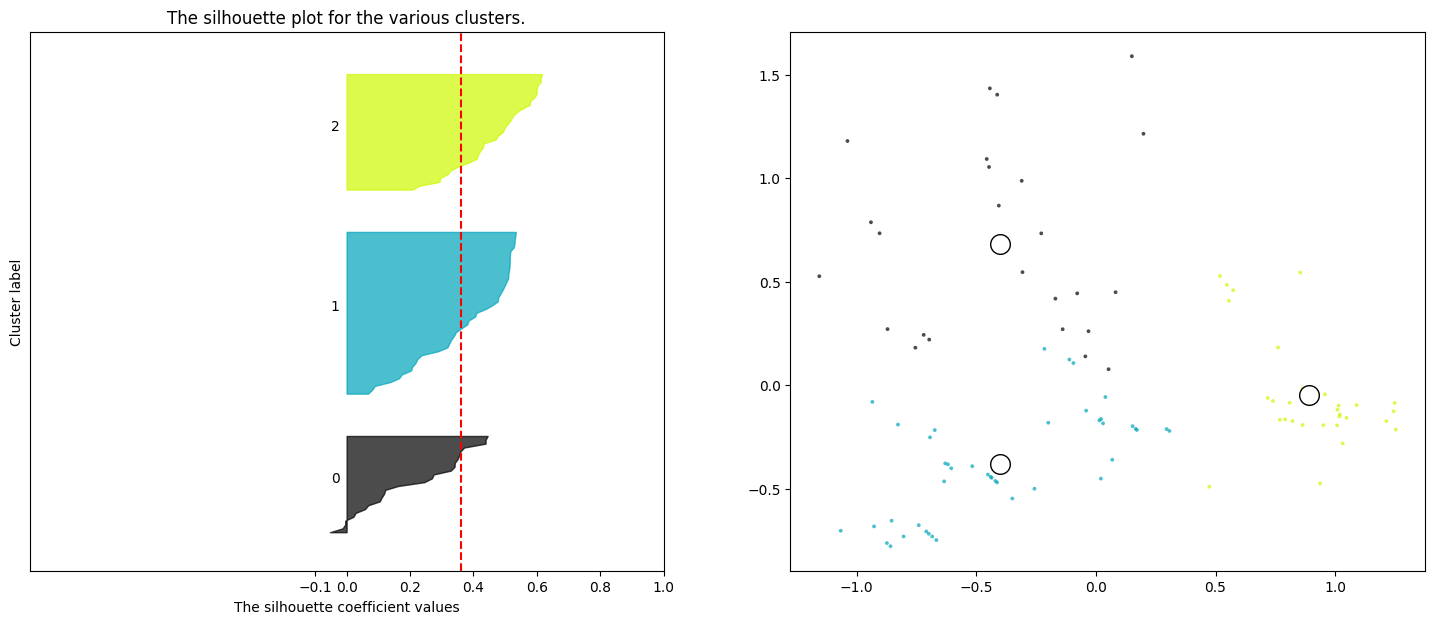

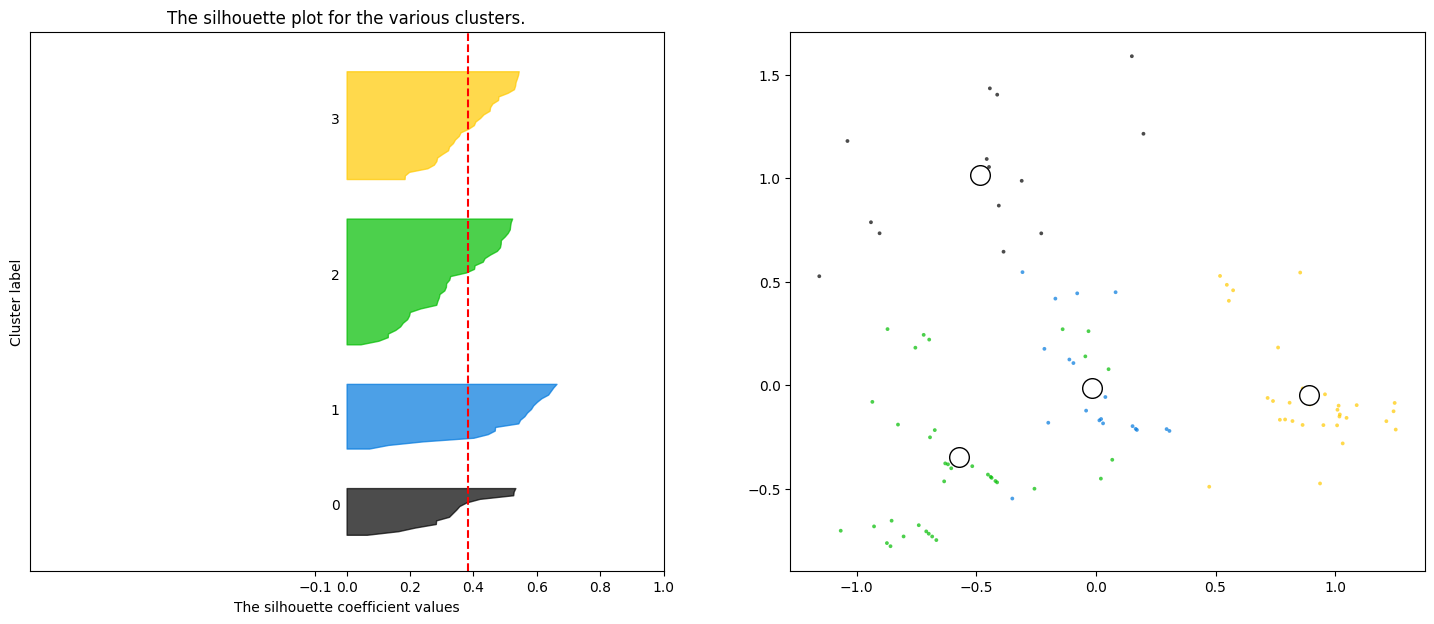

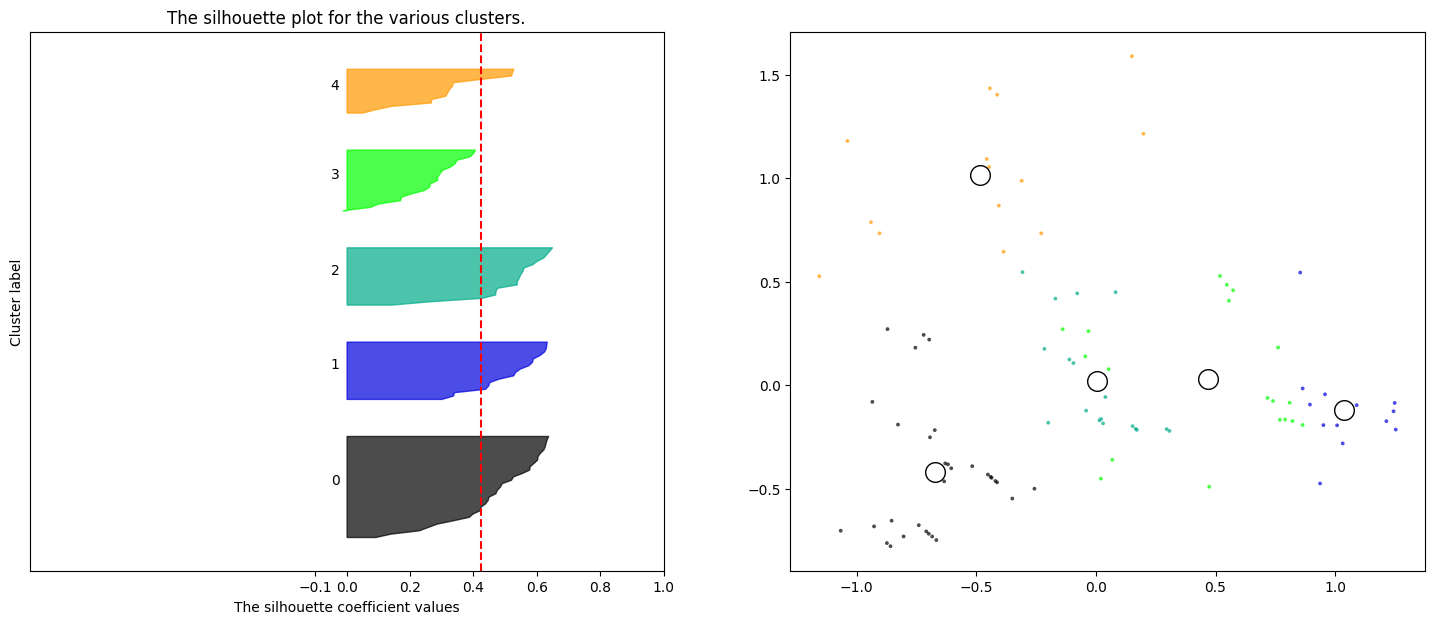

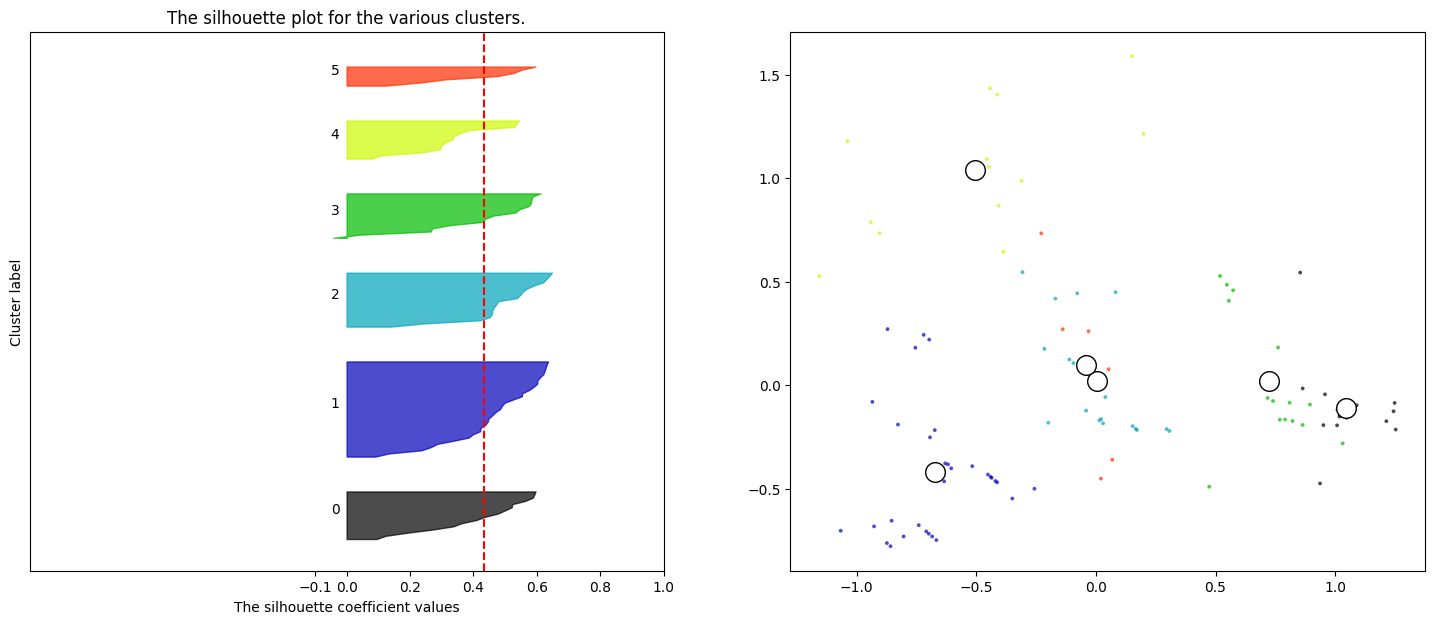

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
#visualizing Silhouette Score for individual clusters and the clusters made
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower =  y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

'''  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='' %i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
'''

In [ ]:
#fitting on 4 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 10)  
y_predict= kmeans.fit_predict(df_pca) 

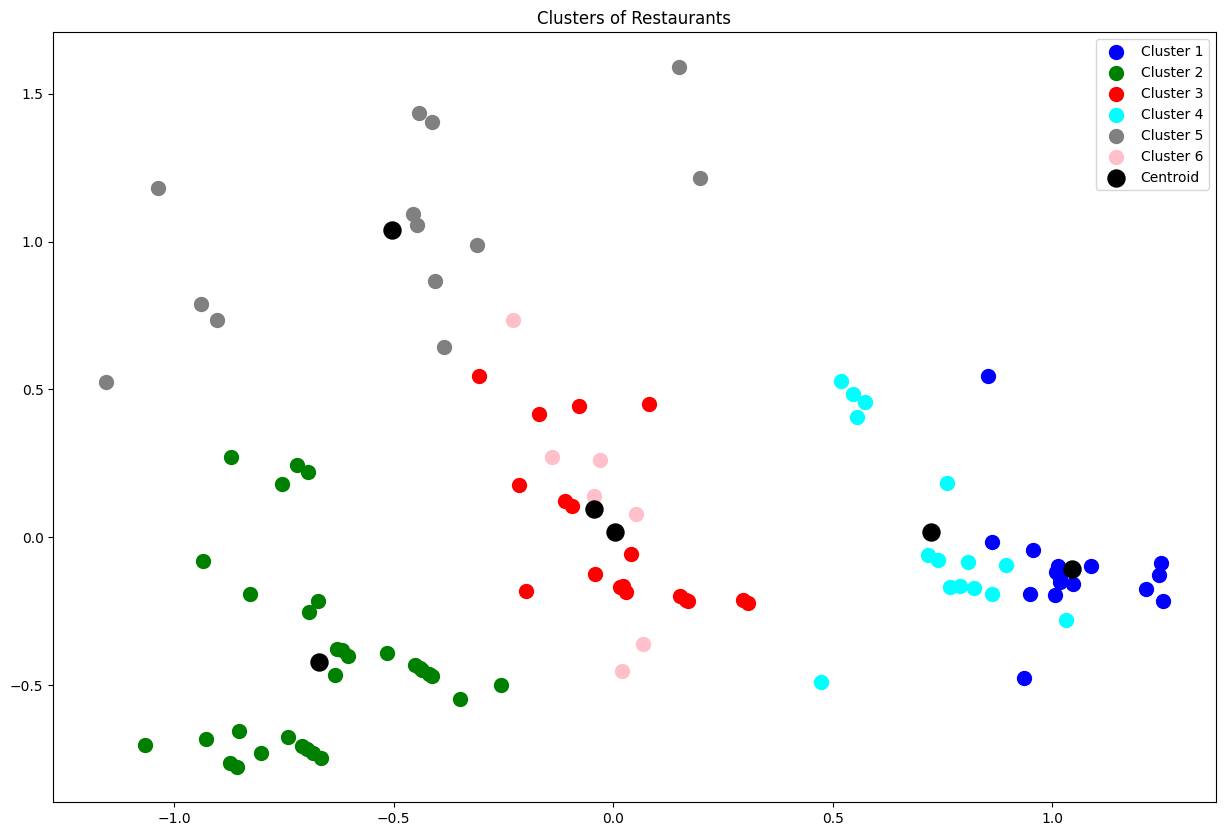

In [ ]:
#visulaizing the clusters  
plt.figure(figsize=(15,10))
plt.scatter(df_pca[y_predict == 0, 0], df_pca[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(df_pca[y_predict == 1, 0], df_pca[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(df_pca[y_predict== 2, 0], df_pca[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(df_pca[y_predict == 3, 0], df_pca[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(df_pca[y_predict == 4, 0], df_pca[y_predict == 4, 1], s = 100, c = 'grey', label = 'Cluster 5') #for first cluster  
plt.scatter(df_pca[y_predict == 5, 0], df_pca[y_predict == 5, 1], s = 100, c = 'pink', label = 'Cluster 6') #for second cluster  
'''plt.scatter(df_pca[y_predict== 6, 0], df_pca[y_predict == 6, 1], s = 100, c = 'magenta', label = 'Cluster 7') #for third cluster  
plt.scatter(df_pca[y_predict == 7, 0], df_pca[y_predict == 7, 1], s = 100, c = 'orange', label = 'Cluster 8') #for fourth cluster  

'''
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroid')   
plt.title('Clusters of Restaurants')  
plt.legend()  
plt.show() 

In [ ]:
# Assigning clusters to our data
new_df_cluster = cluster_df.copy()
cluster_df['clusters'] = y_predict
# checking how it is working
cluster_df.head()

Restaurant      Cost  No_of_cuisine  Average_rating  \
0               10 Downing Street  8.648397              9           11.40   
1                        13 Dhaba  6.111467              1            3.48   
2  3B's - Buddies, Bar & Barbecue  8.101981              9           14.28   
3       AB's - Absolute Barbecues  8.412055              9           14.64   
4               Absolute Sizzlers  7.719130              9           10.86   

   Cuisines_American  Cuisines_Andhra  Cuisines_Arabian  Cuisines_Asian  \
0                  0                0                 0               0   
1                  0                0                 0               0   
2                  0                0                 0               0   
3                  0                0                 0               0   
4                  1                0                 0               0   

   Cuisines_BBQ  Cuisines_Bakery  ...  Cuisines_Pizza  Cuisines_Salad  \
0             0                0  ...               0               0   
1             0                0  ...               0               0   
2             0                0  ...               0               0   
3             0                0  ...               0               0   
4             0                0  ...               0               0   

   Cuisines_Seafood  Cuisines_South Indian  Cuisines_Spanish  \
0                 0                      0                 0   
1                 0                      0                 0   
2                 0                      0                 0   
3                 0                      0                 0   
4                 0                      0                 0   

   Cuisines_Street Food  Cuisines_Sushi  Cuisines_Thai  Cuisines_Wraps  \
0                     0               0              0               0   
1                     0               0              0               0   
2                     0               0              0               0   
3                     0               0              0               0   
4                     0               0              0               0   

   clusters  
0         1  
1         2  
2         2  
3         2  
4         5  

[5 rows x 47 columns]

In [ ]:
# let's find the count of each of 4 clusters
cluster_df['clusters'].value_counts()

1    31
2    18
0    16
3    15
4    13
5     7
Name: clusters, dtype: int64

In [ ]:
#creating new df for checkign cuisine in each cluster
new_cluster_df = hotel_df.copy()
new_cluster_df['clusters'] = y_predict
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant  \
62  Shree Santosh Dhaba Family Restaurant   
4              Over The Moon Brew Company   
26                 Mustang Terrace Lounge   
74                                 Faasos   
50                          Gal Punjab Di   

                                                Links  Cost      Cuisines  \
62  https://www.zomato.com/hyderabad/shree-santosh...   500       Chinese   
4   https://www.zomato.com/hyderabad/over-the-moon...  1200  North Indian   
26  https://www.zomato.com/hyderabad/mustang-terra...  1300       Chinese   
74  https://www.zomato.com/hyderabad/faasos-gachib...   600      Desserts   
50  https://www.zomato.com/hyderabad/gal-punjab-di...   800  North Indian   

                                              Timings  No_of_cuisine  \
62                                  11 AM to 11:30 PM              3   
4   12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...              5   
26  12 Noon to 11:30 PM (Mon-Wed), 12 Noon to 1 AM...              5   
74                                       9 AM to 1 AM              3   
50                 11:55 AM to 4 PM, 7 PM to 11:15 PM              2   

    Average_rating  clusters  
62            2.83         2  
4             4.34         5  
26            3.31         1  
74            3.03         2  
50            3.61         0

In [ ]:
new_cluster_df.shape

(301, 8)

In [ ]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['clusters'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["clusters"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 1 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Seafood' 'Goan' 'Asian' 'Ice Cream' 'Desserts' 'American' 'Burger'
 'Fast Food' 'Mexican' 'Italian' 'Salad' 'Cafe' 'Spanish' 'Bakery' 'Wraps'
 'Biryani' 'Andhra' 'Modern Indian' 'Momos' 'Japanese' 'Sushi' 'Mughlai'
 'Hyderabadi' 'Beverages' 'North Eastern'] 

Cuisine List for Cluster : 2 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'Seafood' 'Beverages' 'Italian' 'Finger Food' 'Japanese' 'Salad' 'Sushi'
 'Arabian' 'Continental' 'Fast Food' 'BBQ' 'Modern Indian' 'Bakery'
 'Pizza' 'Hyderabadi' 'Mughlai'] 

Cuisine List for Cluster : 5 

['Asian' 'Continental' 'North Indian' 'Chinese' 'Mediterranean' 'European'
 'Mughlai' 'Biryani' 'Finger Food' 'Kebab' 'Italian' 'Salad'] 

Cuisine List for Cluster : 0 

['Healthy Food' 'North Indian' 'Continental' 'South Indian' 'Lebanese'
 'Ice Cream' 'Desserts' 'Fast Food' 'Andhra' 'Bakery' 'Mughlai' 'Juices'
 'Chinese

In [ ]:
import plotly.express as px

In [ ]:
# clusters with cost
fig = px.scatter(cluster_df, y="Cost", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

In [ ]:
# clusters on average rating
fig = px.scatter(cluster_df, y="Average_rating", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()

In [ ]:
# clusters with no of cuisines
fig = px.scatter(cluster_df, y="No_of_cuisine", x="clusters",color="clusters")
fig.update_traces(marker_size=10)
fig.show()
plt.show()
     

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Means Clustering is an Unsupervised Learning algorithm. It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters. he algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm. There are 2 methods to determine k:

1) ELBOW METHOD

This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

2) SILHOUETTE METHOD

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

#### 2. Explain the business impact of the ML model used.

K means clustering can be useful in customer segmentation based on demographic, psychographic and behavioural data as well as performance data to cluster your consumers for a particular product category. This can be eventually useful in making business strategies for different categories of customers and retain them for further growth of business.

### ML Model - 2 : Hierarchical clustering

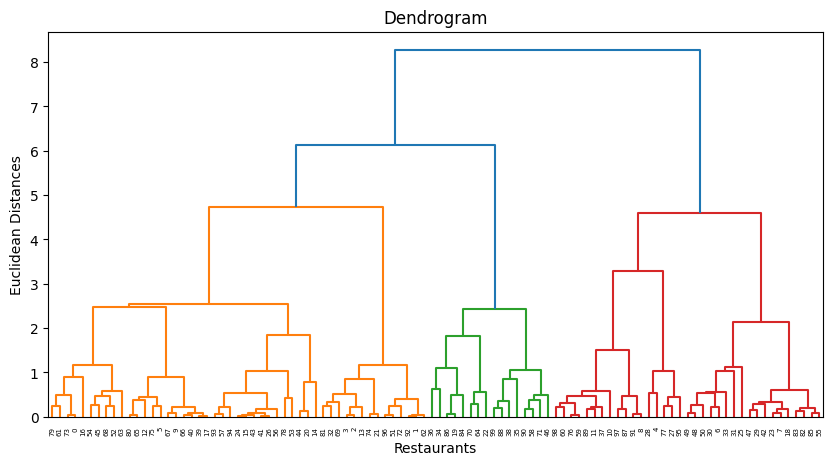

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

Finding silhoutte score using hyperparameter tuning

In [ ]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3324555622088408
For n_clusters = 3, silhouette score is 0.35169765147541265
For n_clusters = 4, silhouette score is 0.3389123230560483
For n_clusters = 5, silhouette score is 0.384472083630478
For n_clusters = 6, silhouette score is 0.40008042994916854
For n_clusters = 7, silhouette score is 0.3622992056780139
For n_clusters = 8, silhouette score is 0.39566846237952086


In [ ]:
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters=6,affinity="euclidean",linkage='ward')

#fit and predict on model
y_predict = model.fit_predict(df_pca)
 

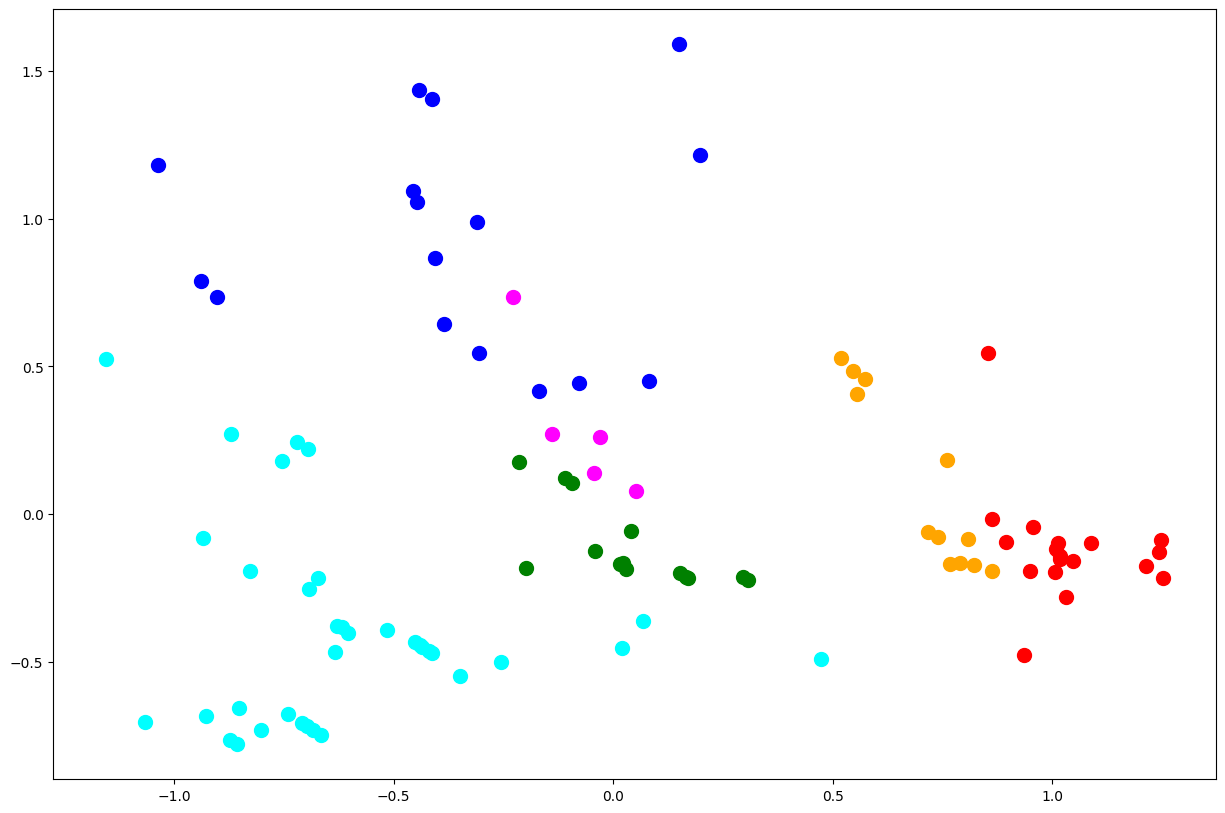

In [ ]:
# visualize the clusters
plt.figure(figsize=(15,10))
plt.scatter(df_pca[y_predict == 0,0], df_pca[y_predict == 0,1], s=100, c='cyan')
plt.scatter(df_pca[y_predict == 1,0], df_pca[y_predict == 1,1], s=100, c='red')
plt.scatter(df_pca[y_predict == 2,0], df_pca[y_predict == 2,1], s=100, c='blue')
plt.scatter(df_pca[y_predict == 3,0], df_pca[y_predict == 3,1], s=100, c='green')
plt.scatter(df_pca[y_predict == 4,0], df_pca[y_predict == 4,1], s=100, c='orange')
plt.scatter(df_pca[y_predict == 5,0], df_pca[y_predict == 5,1], s=100, c='magenta')


In [ ]:
cluster_df['cluster_hr'] = y_predict

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart

It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.

There are two main types of hierarchical clustering:

Agglomerative: Initially, each object is considered to be its own cluster. According to a particular procedure, the clusters are then merged step by step until a single cluster remains. At the end of the cluster merging process, a cluster containing all the elements will be formed.

Divisive: The Divisive method is the opposite of the Agglomerative method. Initially, all objects are considered in a single cluster. Then the division process is performed step by step until each object forms a different cluster. The cluster division or splitting procedure is carried out according to some principles that maximum distance between neighboring objects in the cluster.

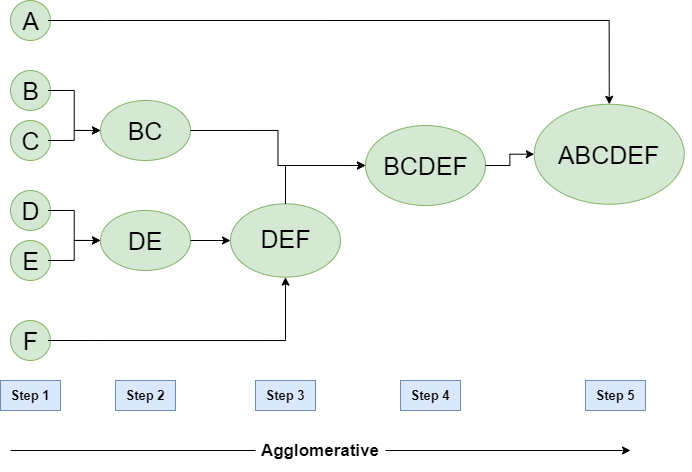

Dendrogram in Hierarchical clustering

The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

The working of the dendrogram can be explained using the below diagram:

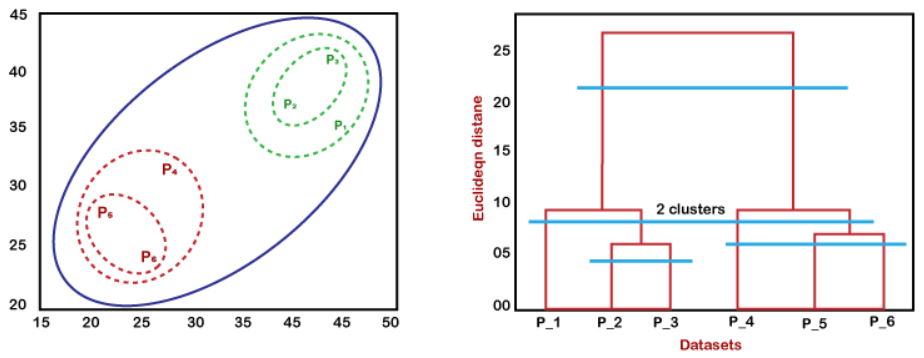

### 2. Explain the business impact of the ML model used.

Hierarchical Clustering can help an enterprise organize data into groups to identify similarities and, equally important, dissimilar groups and characteristics, so that the business can target pricing, products, services, marketing messages and more.Once the segments are identified, marketing messages and products can be customized for each segment. The better the segments chosen for targeting by a particular organization, the more successful the business will be in the market.

### ML Model - 3 : DBSCAN

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)

#fitting on model
model = dbscan.fit(df_pca)

#find out the labels
labels = model.labels_


In [ ]:
#calculating no of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

6

In [ ]:
#find the silhoutte score
from sklearn import metrics
print(metrics.silhouette_score(df_pca,labels))

0.3381395778678489


In [ ]:
# predict thr clusters or labels and append in cluster df
yhat = model.fit_predict(df_pca)
cluster_df["Label_DBscan"] = yhat
cluster_df['Label_DBscan'].unique()

array([ 0,  1,  4,  2, -1,  3,  5])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It groups ‘densely grouped’ data points into a single cluster. It can identify clusters in large spatial datasets by looking at the local density of the data points. The most exciting feature of DBSCAN clustering is that it is robust to outliers. It also does not require the number of clusters to be told beforehand, unlike K-Means, where we have to specify the number of centroids.

### ML Model - 4 : Sentimental Analysis

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

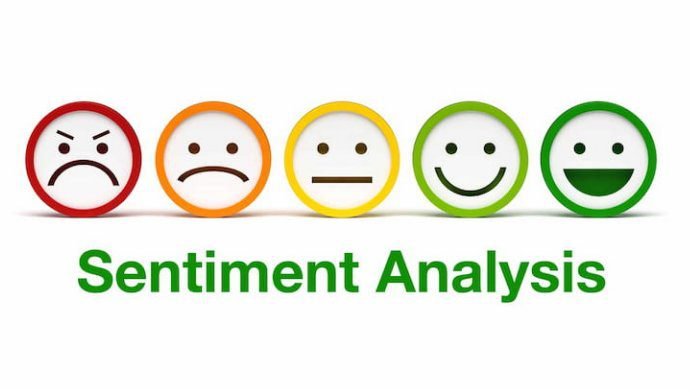

Since we get a lot of reviews from the customers, it would be necesary to determine the sentiments of these reviews. We would be consider to build a supervised machine learning model to achieve the objective of determining the sentiments.

In [ ]:
#Importing all the required libraries for sentiment analysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, roc_curve

In [ ]:
# List of models
models = [["LogisticRegression", LogisticRegression(fit_intercept = True, class_weight='balanced')], ["DecisionTree", DecisionTreeClassifier()],
          ["RandomForest",RandomForestClassifier()],["XGBoost", XGBClassifier()],
          ["KNN", KNeighborsClassifier()]]

In [ ]:
#function for fitting the model and calculating scores

def model_build(models,X_train,X_test,y_train,y_test):
  """
  This function builds the classification models using the traing and testing datas passed as arguments
  and returns the respective model metrics, confusion matrices and the roc curve values.
  Paramaters:
  X_train, X_test, y_train and y_test as pandas dataframe or numpy ndarray
  models: A list with model name and the model class. 
  """
  score_matrix = pd.DataFrame()
  # dictionary for roc curve
  roc_sc = {}

  for model_name,model in models:
    current_result = dict()
    
    model.fit(X_train,y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    ypredProb = model.predict_proba(X_test)
    
    # Model metrics 
    current_result["Model"] = model_name
    
    #Accuracy    
    current_result["Train Accuracy"] = accuracy_score(y_train,y_pred_train)
    current_result["Test Accuracy"] = accuracy_score(y_test,y_pred_test)
    
    #Precision
    current_result["Test Precision"] = precision_score(y_test,y_pred_test)
    
    # Recall
    current_result["Test Recall"] = recall_score(y_test, y_pred_test)
    
    #f1 score
    current_result["Test F1"] = f1_score(y_test, y_pred_test)
    
    #AUC_ROC curve
    current_result["Test ROC_AUC Score"] = roc_auc_score(y_test,y_pred_test)
    current_result = pd.DataFrame(current_result,index=[1])
    
    #appending in score_matrix
    score_matrix = score_matrix.append(current_result)

    # ROC roc_curve values
    fpr, tpr, threshold = roc_curve(y_test, ypredProb[:,1])
    
    roc_sc[model_name] = (fpr,tpr)

  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
  roc_sc["TPR = FPR"] = (p_fpr, p_tpr)
  return score_matrix , roc_sc

In [ ]:
# Obtaining results
model_results, Curve = model_build(models,X_train,X_test,y_train,y_test)

In [ ]:
model_results

Model  Train Accuracy  Test Accuracy  Test Precision  \
1  Logistic Regression        0.911281       0.850978        0.905405   
1         DecisionTree        0.992471       0.784747        0.812689   
1         RandomForest        0.992471       0.852484        0.844174   
1              XGBoost        0.941649       0.861014        0.881026   
1                  KNN        0.977036       0.651279        0.648677   

   Test Recall   Test F1  Test ROC_AUC Score  
1     0.852824  0.878329            0.850325  
1     0.856006  0.833785            0.759525  
1     0.939539  0.889307            0.821671  
1     0.901352  0.891074            0.846736  
1     0.975338  0.779155            0.536582

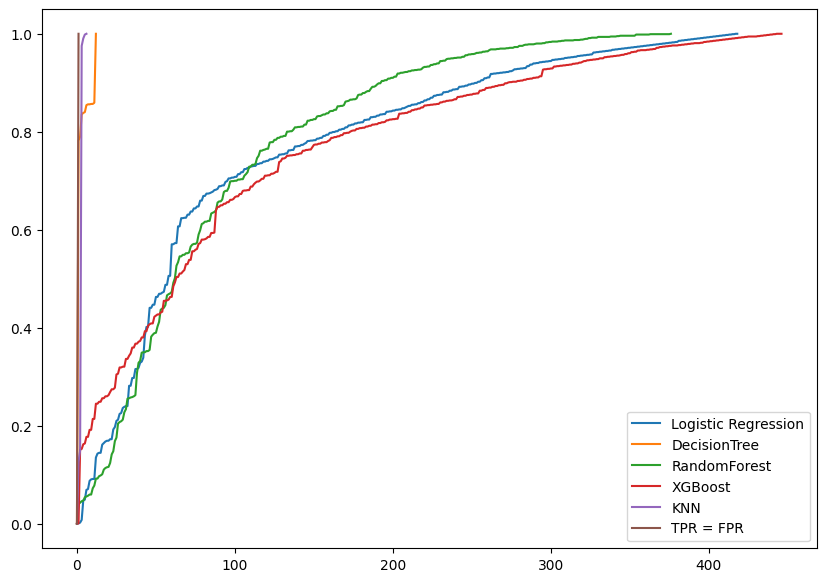

In [ ]:
# ROC_AUC curve
plt.figure(figsize = (10,7))
for model , value in Curve.items():
  sns.lineplot(value[1], label = model)

From the above model metrics and ROC-AUC cureve, we could consider that logistic regression is the best suitable model on this data, followed by XGBoost model and Random forest.


KNN is the worst performing model for this data.

We would perform hyperparameter tuning on logistic regression model to obtain a final model on this data

2. Hyperparameter tuning

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

A) Logistic Regression

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [100, 10, 1.0, 0.1, 0.01],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    }
]

In [ ]:
grid_lr = GridSearchCV( LogisticRegression(fit_intercept = True, class_weight='balanced'), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = grid_lr.fit(X_train,y_train)

# Get the results
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)
print(grid_lr.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
0.8620907226950708
LogisticRegression(C=10, class_weight='balanced')
{'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
final_model = LogisticRegression(random_state=42, solver='lbfgs', penalty= 'l2', C = 10 )
final_model.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [ ]:
# prediction report
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8287    0.7749    0.8009       724
           1     0.8761    0.9086    0.8921      1269

    accuracy                         0.8600      1993
   macro avg     0.8524    0.8417    0.8465      1993
weighted avg     0.8589    0.8600    0.8589      1993



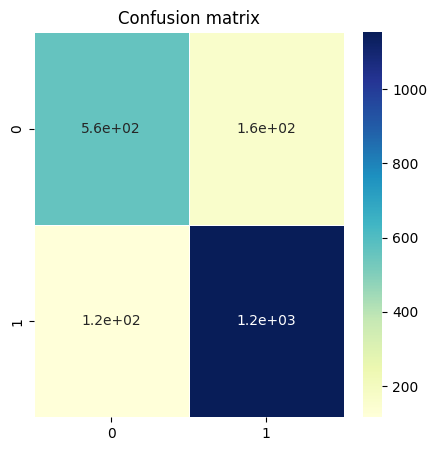

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix')
plt.show()
     

##### Which hyperparameter optimization technique have you used and why?

I have used Grid Search CV Hyperparameter optimization technique and tried to find the best values of C.I got best params 'C': 10. I have also used Cross validation with CV = 3.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After the hyperparameter tuning of Logistic Regression we observed the following improvements in the evaluation metrics.

Accuracy Before: 85.09% || Accuracy After: 86.00%

Precision Before: 90.54% || Precision After:85.89 %

Recall Before: 85.28% || Recall After: 86.00%

F1 Score Before: 87.84%|| F1 Score After: 85.89%

B) XGBoost

In [ ]:
''' from xgboost import XGBClassifier
xgb = XGBClassifier()
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

best_xgb = xgb_grid.fit(X_train,y_train)

# Get the results
print(best_xgb.best_score_)
print(best_xgb.best_estimator_)
print(best_xgb.best_params_) '''

Taking much time than expected. Hence dropping it.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For sentiment analysis, evaluation metrics used were precision, recall, F1-score, and accuracy.

> Precision measures the proportion of true positive predictions among all positive predictions. It is a good metric to use when the cost of false positives is high.

> Recall (also known as sensitivity or true positive rate) measures the proportion of true positive predictions among all actual positive instances. It is a good metric to use when the cost of false negatives is high.

> F1-score is the harmonic mean of precision and recall, and is a good overall measure of a classifier's performance.

> Accuracy is the proportion of correctly classified instances among all instances.

The specific evaluation metric to use will depend on the specific use case and the relative costs of false positives and false negatives. For a positive business impact, F1-score can be considered as it balances the precision and recall to give an overall performance measure.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen logistic regression model for my final prediction because auc_roc score for logistic regression is highest among other models.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# Save the File For Clustering 
import pickle
pickle.dump(kmeans, open('model_save','wb'))

In [ ]:
# Save the File For Sentiment Analysis
import pickle
pickle.dump(final_model, open('model_save1','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
model = pickle.load(open('/content/model_save','rb'))
model.fit_predict(df_pca[50:101])

array([3, 0, 1, 1, 1, 3, 1, 1, 2, 4, 4, 2, 0, 1, 2, 1, 1, 1, 1, 0, 2, 2,
       0, 2, 0, 1, 4, 5, 1, 1, 1, 0, 3, 3, 2, 3, 2, 4, 0, 4, 2, 4, 0, 1,
       1, 5, 0, 4, 4, 2], dtype=int32)

In [ ]:
# Load the File and predict unseen data
model = pickle.load(open('/content/model_save1','rb'))
model.predict(X_test[:50])

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

## Application Area of this project in industry :
* It is the general habit  of people to search for BEST, CHEAPEST & DECENT restaurant in their locality. Hence these companies take dataset from users and after modelling and gaining insights from the dataset, a custmer can easily have idea about their nearby restaurants.

* If reviews and ratings are given good by the other users , then it is preffered by the customers. Hence analysis is an important part here.

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

* # CONCLUSION FROM CLUSTERING :
By using KMeans clustering and Agglomerative Hierarchial Clustering and DBSCAN, I came up with 6 clusters given the dataset of Restaurans, cuisines, cost and rating. 
-----
* # CONCLUSION FROM SENTIMENT ANALYSIS
For sentiment analysis, I have used different supervised models like Logistic regression, Decision Trees, Random Forest, XGBoost, KNN and found area under curve of logistic regression as maximum. Hence I chose Logistic regression for my final prediction of Sentiment Analysis with the accuracy score of 86% and F1 Score of 85% after hyperparameter tuning.
-----
* # CONCLUSION FROM EDA

~Average cost per person in restaurants varies from below 500 to more than 2500. But there are too few restaurants whose price is more than 2000

~Expensive Restaurants : Here "Collage - Hyatt Hyderabad Gachibowli" is the most expensive restaurant whose price is rupees 2800 which is followed by "Feast - Sheraton Hyderabad Hotel" whose price is rupees 2500. Other expensive restaurants can be seen from the graph and table.

~ Cheap Restaurants : Here "Mohammedia Shawarma" and "Amul" is the cheapest restaurant where we can get the dish with the minimum price of rupees 150 , which is followed by "Sweet Basket", "KS Bakers", "Momos Delight etc whose price is rupees 200 .

~ North Indian is the most served cuisine in restaurants which is followed by Chinese and Continental.

~ AB's - Absolute Barbecues is the top average rated restaurant followed by B-Dubs and 3B's - Buddies, Bar and Barbeque.

~ Labonel and Collage - Hyatt Hyderabad Gachibowli (which is also the most expensive) are given he maximun number of reviews with the count of 1031 (which is really a good figure).

~ Hour : The frequency is higher during the night time from hour 19 to 22, i.e., from 7:00 pm to 11:00 pm. Possibly because people mostly order food during these hours.

~ Year : The frequency is minimum in the year 2016 while its maximum in the year 2019. It is possible due to the fact that there is improvement in technology and people getting familiar with new applications and online system.

~ The Clustering Model has helped in grouping restaurants based on the other attributes of the restaurants, which will ultimately aid the company in developing Targeted Revenue-Boosting measures.

~ The sentiment analysis model has helped the business in classifying the positive and negative reviewes of the customers. Now that the company is aware of the restaurant inadequacies described in the unfavourable reviews, they may work to improve their business position.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***